## building the model

In [1]:
# importing data manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# importing basic machine learning libraries
import keras as ks
import sklearn as sk
import tensorflow as tf

In [3]:
# importing ANN libraries
from keras import models
from keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from keras import regularizers
from sklearn.model_selection import KFold

In [4]:
# creating gaussian function for the RBF layer

def custom_gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))
get_custom_objects().update({'custom_gelu': Activation(custom_gelu)})

In [5]:
# creating the custom rmse for evaluation

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

## data manipulation

In [6]:
inputs = pd.read_csv('Cass1.csv',delimiter=',', header=None) #loading inputs from a different file 
print (inputs.shape)
targets = pd.read_csv('UTM1.csv',delimiter=',', header=None) # loading targets
print(targets.shape)


(48, 2)
(48, 2)


In [7]:
inputf = pd.read_csv('Cass_1.csv',delimiter=',', header=None) #loading inputs from a different file 
print (inputf.shape)
target = pd.read_csv('UTM_1.csv',delimiter=',', header=None) # loading targets
print(target.shape)


(17, 2)
(17, 2)


In [8]:
X_trainB = inputs
y_trainB = targets
X_testB = inputf
y_testB = target
y_trainB.shape

(48, 2)

### pre-processing


In [9]:
all_data = np.concatenate((inputs, targets),axis=1)
X = all_data[0:,:2]
y = all_data[0:,2:]

In [10]:
all_data.shape

(48, 4)

In [11]:
# fitting max - min scaler

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler() #scaler for the inputs
min_max_scaler.fit(X_trainB) #fitting the scaler

min_max_scaler_Target = preprocessing.MinMaxScaler() #scaler for targets
min_max_scaler_Target.fit(y_trainB)


MinMaxScaler()

In [12]:
# normalizing the training data

train_data_1 = min_max_scaler.transform(X_trainB)
train_targets_1 = min_max_scaler_Target.transform(y_trainB)
print (train_data_1.shape)
print (train_targets_1.shape)

(48, 2)
(48, 2)


In [13]:
# normalizing the testing data

test_data_1 = min_max_scaler.transform(X_testB)
test_targets_1 = min_max_scaler_Target.transform(y_testB)
print (test_data_1.shape)
print (test_targets_1.shape)

(17, 2)
(17, 2)


In [14]:
X_train = train_data_1
y_train = train_targets_1
X_test = test_data_1
y_test = test_targets_1

In [15]:
def linear(x):
    return x
get_custom_objects().update({'linear': Activation(linear)})

## Running the model

In [16]:
## Random seeding
np.random.seed(123)
tf.random.set_seed(123)


k = 3

num_val_samples = len(X_train) // k

num_epochs = 4200

all_scores =[]

labels =[]

prd = []
fold_val =[]
all_mse =[]

for i in range(k):
    print('processing fold #', i)
    ## validation data comes from training data for each loop
    val_data = X_train[i * num_val_samples : (i +1)*num_val_samples]
    val_targets = y_train[i * num_val_samples : (i+1) * num_val_samples]
    ## creating the folds
    partial_train_data = np.concatenate([X_train[:i*num_val_samples], X_train[(i + 1) *num_val_samples :]], axis=0)
    partial_train_targets = np.concatenate([y_train[:i*num_val_samples], y_train[(i + 1) *num_val_samples :]], axis=0)
    
    ## train on the already compiled model
    model = Sequential([
        Dense(56, activation=custom_gelu,kernel_regularizer=regularizers.l2(0.001), ),
        Dense(55, activation=custom_gelu, kernel_regularizer=regularizers.l2(0.001)),
        Dense(2)
        ])
# compiling the model 
    model.compile(
        loss=rmse,
        optimizer=Adam(lr=0.0001),
        metrics=[rmse]
        )
    rbfnn = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, validation_data=(X_test, y_test), verbose=1)
    ## evaluate the mse, mae in validation data
  
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    ## Predict the test targets
    preds = model.predict(X_test)
    ## evaluate on test datasets
  #  true_mse_mae = model.evaluate(test_data, test_targets)
    
    
    all_scores.append(val_mae)
    all_mse.append(val_mse)
    preds = model.predict(val_data)
    labels.append(val_targets)
    prd.append(preds)
    
    print (preds)


processing fold # 0
Epoch 1/4200
1/1 [==============================] - 0s 355ms/step - loss: 0.6292 - rmse: 0.5706 - val_loss: 0.6680 - val_rmse: 0.6094
Epoch 2/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.6278 - rmse: 0.5692 - val_loss: 0.6666 - val_rmse: 0.6080
Epoch 3/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.6265 - rmse: 0.5679 - val_loss: 0.6651 - val_rmse: 0.6066
Epoch 4/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.6251 - rmse: 0.5665 - val_loss: 0.6637 - val_rmse: 0.6051
Epoch 5/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.6237 - rmse: 0.5651 - val_loss: 0.6623 - val_rmse: 0.6037
Epoch 6/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.6224 - rmse: 0.5638 - val_loss: 0.6608 - val_rmse: 0.6022
Epoch 7/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.6210 - rmse: 0.5624 - val_loss: 0.6594 - val_rmse: 0.6008
Epoch 8/4200
1/1 [==============================

1/1 [==============================] - 0s 22ms/step - loss: 0.5449 - rmse: 0.4866 - val_loss: 0.5782 - val_rmse: 0.5198
Epoch 63/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.5435 - rmse: 0.4852 - val_loss: 0.5766 - val_rmse: 0.5183
Epoch 64/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.5420 - rmse: 0.4837 - val_loss: 0.5751 - val_rmse: 0.5168
Epoch 65/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.5406 - rmse: 0.4823 - val_loss: 0.5735 - val_rmse: 0.5152
Epoch 66/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.5391 - rmse: 0.4808 - val_loss: 0.5720 - val_rmse: 0.5137
Epoch 67/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.5377 - rmse: 0.4794 - val_loss: 0.5704 - val_rmse: 0.5121
Epoch 68/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.5362 - rmse: 0.4779 - val_loss: 0.5688 - val_rmse: 0.5105
Epoch 69/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.

1/1 [==============================] - 0s 22ms/step - loss: 0.4504 - rmse: 0.3919 - val_loss: 0.4758 - val_rmse: 0.4173
Epoch 124/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.4487 - rmse: 0.3902 - val_loss: 0.4740 - val_rmse: 0.4155
Epoch 125/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.4471 - rmse: 0.3886 - val_loss: 0.4722 - val_rmse: 0.4137
Epoch 126/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.4454 - rmse: 0.3869 - val_loss: 0.4703 - val_rmse: 0.4118
Epoch 127/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.4437 - rmse: 0.3852 - val_loss: 0.4685 - val_rmse: 0.4100
Epoch 128/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.4420 - rmse: 0.3835 - val_loss: 0.4666 - val_rmse: 0.4081
Epoch 129/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.4403 - rmse: 0.3817 - val_loss: 0.4648 - val_rmse: 0.4062
Epoch 130/4200
1/1 [==============================] - 0s 21ms/step - l

Epoch 184/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.3421 - rmse: 0.2829 - val_loss: 0.3564 - val_rmse: 0.2972
Epoch 185/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.3403 - rmse: 0.2811 - val_loss: 0.3543 - val_rmse: 0.2951
Epoch 186/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.3385 - rmse: 0.2793 - val_loss: 0.3523 - val_rmse: 0.2931
Epoch 187/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.3366 - rmse: 0.2774 - val_loss: 0.3503 - val_rmse: 0.2911
Epoch 188/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.3348 - rmse: 0.2756 - val_loss: 0.3482 - val_rmse: 0.2890
Epoch 189/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.3330 - rmse: 0.2738 - val_loss: 0.3462 - val_rmse: 0.2870
Epoch 190/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.3312 - rmse: 0.2720 - val_loss: 0.3442 - val_rmse: 0.2849
Epoch 191/4200
1/1 [==============================] - 0

Epoch 245/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.2456 - rmse: 0.1855 - val_loss: 0.2457 - val_rmse: 0.1856
Epoch 246/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.2445 - rmse: 0.1843 - val_loss: 0.2443 - val_rmse: 0.1842
Epoch 247/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.2433 - rmse: 0.1831 - val_loss: 0.2429 - val_rmse: 0.1828
Epoch 248/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.2422 - rmse: 0.1820 - val_loss: 0.2416 - val_rmse: 0.1814
Epoch 249/4200
1/1 [==============================] - 0s 34ms/step - loss: 0.2410 - rmse: 0.1808 - val_loss: 0.2402 - val_rmse: 0.1800
Epoch 250/4200
1/1 [==============================] - 0s 40ms/step - loss: 0.2399 - rmse: 0.1797 - val_loss: 0.2389 - val_rmse: 0.1787
Epoch 251/4200
1/1 [==============================] - 0s 36ms/step - loss: 0.2388 - rmse: 0.1786 - val_loss: 0.2376 - val_rmse: 0.1774
Epoch 252/4200
1/1 [==============================] - 0

1/1 [==============================] - 0s 30ms/step - loss: 0.1950 - rmse: 0.1344 - val_loss: 0.1866 - val_rmse: 0.1259
Epoch 306/4200
1/1 [==============================] - ETA: 0s - loss: 0.1943 - rmse: 0.13 - 0s 31ms/step - loss: 0.1943 - rmse: 0.1337 - val_loss: 0.1858 - val_rmse: 0.1252
Epoch 307/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.1936 - rmse: 0.1330 - val_loss: 0.1851 - val_rmse: 0.1244
Epoch 308/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.1929 - rmse: 0.1323 - val_loss: 0.1843 - val_rmse: 0.1237
Epoch 309/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.1923 - rmse: 0.1316 - val_loss: 0.1836 - val_rmse: 0.1229
Epoch 310/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1916 - rmse: 0.1309 - val_loss: 0.1828 - val_rmse: 0.1222
Epoch 311/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.1909 - rmse: 0.1303 - val_loss: 0.1821 - val_rmse: 0.1214
Epoch 312/4200
1/1 [============

1/1 [==============================] - 0s 23ms/step - loss: 0.1546 - rmse: 0.0938 - val_loss: 0.1427 - val_rmse: 0.0819
Epoch 366/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1540 - rmse: 0.0931 - val_loss: 0.1420 - val_rmse: 0.0812
Epoch 367/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.1533 - rmse: 0.0925 - val_loss: 0.1413 - val_rmse: 0.0805
Epoch 368/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.1527 - rmse: 0.0918 - val_loss: 0.1406 - val_rmse: 0.0797
Epoch 369/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.1520 - rmse: 0.0912 - val_loss: 0.1399 - val_rmse: 0.0790
Epoch 370/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.1514 - rmse: 0.0905 - val_loss: 0.1392 - val_rmse: 0.0783
Epoch 371/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.1507 - rmse: 0.0899 - val_loss: 0.1384 - val_rmse: 0.0776
Epoch 372/4200
1/1 [==============================] - 0s 21ms/step - l

Epoch 425/4200
1/1 [==============================] - 0s 32ms/step - loss: 0.1203 - rmse: 0.0592 - val_loss: 0.1044 - val_rmse: 0.0433
Epoch 426/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.1198 - rmse: 0.0588 - val_loss: 0.1039 - val_rmse: 0.0428
Epoch 427/4200
1/1 [==============================] - 0s 29ms/step - loss: 0.1194 - rmse: 0.0583 - val_loss: 0.1034 - val_rmse: 0.0423
Epoch 428/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.1190 - rmse: 0.0579 - val_loss: 0.1029 - val_rmse: 0.0419
Epoch 429/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.1185 - rmse: 0.0575 - val_loss: 0.1025 - val_rmse: 0.0414
Epoch 430/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.1181 - rmse: 0.0570 - val_loss: 0.1020 - val_rmse: 0.0409
Epoch 431/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.1177 - rmse: 0.0566 - val_loss: 0.1015 - val_rmse: 0.0405
Epoch 432/4200
1/1 [==============================] - 0

1/1 [==============================] - 0s 24ms/step - loss: 0.1011 - rmse: 0.0403 - val_loss: 0.0863 - val_rmse: 0.0256
Epoch 486/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.1009 - rmse: 0.0401 - val_loss: 0.0862 - val_rmse: 0.0254
Epoch 487/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.1006 - rmse: 0.0399 - val_loss: 0.0860 - val_rmse: 0.0252
Epoch 488/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.1003 - rmse: 0.0396 - val_loss: 0.0858 - val_rmse: 0.0251
Epoch 489/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.1001 - rmse: 0.0394 - val_loss: 0.0856 - val_rmse: 0.0249
Epoch 490/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0998 - rmse: 0.0391 - val_loss: 0.0854 - val_rmse: 0.0247
Epoch 491/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0996 - rmse: 0.0389 - val_loss: 0.0852 - val_rmse: 0.0245
Epoch 492/4200
1/1 [==============================] - 0s 24ms/step - l

1/1 [==============================] - 0s 26ms/step - loss: 0.0859 - rmse: 0.0259 - val_loss: 0.0758 - val_rmse: 0.0158
Epoch 546/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0856 - rmse: 0.0256 - val_loss: 0.0756 - val_rmse: 0.0157
Epoch 547/4200
1/1 [==============================] - 0s 32ms/step - loss: 0.0854 - rmse: 0.0254 - val_loss: 0.0755 - val_rmse: 0.0155
Epoch 548/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0851 - rmse: 0.0251 - val_loss: 0.0753 - val_rmse: 0.0153
Epoch 549/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0849 - rmse: 0.0249 - val_loss: 0.0751 - val_rmse: 0.0152
Epoch 550/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0846 - rmse: 0.0247 - val_loss: 0.0750 - val_rmse: 0.0150
Epoch 551/4200
1/1 [==============================] - 0s 31ms/step - loss: 0.0844 - rmse: 0.0244 - val_loss: 0.0748 - val_rmse: 0.0149
Epoch 552/4200
1/1 [==============================] - 0s 26ms/step - l

1/1 [==============================] - 0s 29ms/step - loss: 0.0723 - rmse: 0.0131 - val_loss: 0.0677 - val_rmse: 0.0085
Epoch 606/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0722 - rmse: 0.0130 - val_loss: 0.0676 - val_rmse: 0.0084
Epoch 607/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0720 - rmse: 0.0128 - val_loss: 0.0675 - val_rmse: 0.0084
Epoch 608/4200
1/1 [==============================] - 0s 32ms/step - loss: 0.0718 - rmse: 0.0127 - val_loss: 0.0675 - val_rmse: 0.0083
Epoch 609/4200
1/1 [==============================] - 0s 32ms/step - loss: 0.0717 - rmse: 0.0125 - val_loss: 0.0674 - val_rmse: 0.0082
Epoch 610/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0715 - rmse: 0.0124 - val_loss: 0.0673 - val_rmse: 0.0082
Epoch 611/4200
1/1 [==============================] - 0s 33ms/step - loss: 0.0714 - rmse: 0.0123 - val_loss: 0.0673 - val_rmse: 0.0081
Epoch 612/4200
1/1 [==============================] - 0s 32ms/step - l

1/1 [==============================] - 0s 33ms/step - loss: 0.0674 - rmse: 0.0092 - val_loss: 0.0657 - val_rmse: 0.0074
Epoch 666/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0674 - rmse: 0.0091 - val_loss: 0.0656 - val_rmse: 0.0074
Epoch 667/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0674 - rmse: 0.0091 - val_loss: 0.0656 - val_rmse: 0.0074
Epoch 668/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0673 - rmse: 0.0091 - val_loss: 0.0656 - val_rmse: 0.0074
Epoch 669/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0673 - rmse: 0.0091 - val_loss: 0.0656 - val_rmse: 0.0074
Epoch 670/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0673 - rmse: 0.0091 - val_loss: 0.0655 - val_rmse: 0.0074
Epoch 671/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0672 - rmse: 0.0091 - val_loss: 0.0655 - val_rmse: 0.0074
Epoch 672/4200
1/1 [==============================] - 0s 24ms/step - l

Epoch 726/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0654 - rmse: 0.0082 - val_loss: 0.0638 - val_rmse: 0.0067
Epoch 727/4200
1/1 [==============================] - 0s 29ms/step - loss: 0.0653 - rmse: 0.0082 - val_loss: 0.0638 - val_rmse: 0.0067
Epoch 728/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0653 - rmse: 0.0082 - val_loss: 0.0638 - val_rmse: 0.0067
Epoch 729/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0653 - rmse: 0.0082 - val_loss: 0.0638 - val_rmse: 0.0067
Epoch 730/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0652 - rmse: 0.0082 - val_loss: 0.0637 - val_rmse: 0.0067
Epoch 731/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0652 - rmse: 0.0081 - val_loss: 0.0637 - val_rmse: 0.0067
Epoch 732/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0652 - rmse: 0.0081 - val_loss: 0.0637 - val_rmse: 0.0066
Epoch 733/4200
1/1 [==============================] - 0

1/1 [==============================] - 0s 24ms/step - loss: 0.0634 - rmse: 0.0073 - val_loss: 0.0621 - val_rmse: 0.0060
Epoch 787/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0634 - rmse: 0.0073 - val_loss: 0.0620 - val_rmse: 0.0060
Epoch 788/4200
1/1 [==============================] - 0s 31ms/step - loss: 0.0633 - rmse: 0.0073 - val_loss: 0.0620 - val_rmse: 0.0060
Epoch 789/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0633 - rmse: 0.0073 - val_loss: 0.0620 - val_rmse: 0.0060
Epoch 790/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0633 - rmse: 0.0073 - val_loss: 0.0619 - val_rmse: 0.0060
Epoch 791/4200
1/1 [==============================] - 0s 33ms/step - loss: 0.0632 - rmse: 0.0073 - val_loss: 0.0619 - val_rmse: 0.0060
Epoch 792/4200
1/1 [==============================] - 0s 29ms/step - loss: 0.0632 - rmse: 0.0072 - val_loss: 0.0619 - val_rmse: 0.0059
Epoch 793/4200
1/1 [==============================] - 0s 33ms/step - l

Epoch 847/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0614 - rmse: 0.0065 - val_loss: 0.0603 - val_rmse: 0.0053
Epoch 848/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0614 - rmse: 0.0065 - val_loss: 0.0603 - val_rmse: 0.0053
Epoch 849/4200
1/1 [==============================] - ETA: 0s - loss: 0.0614 - rmse: 0.00 - 0s 24ms/step - loss: 0.0614 - rmse: 0.0064 - val_loss: 0.0602 - val_rmse: 0.0053
Epoch 850/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0613 - rmse: 0.0064 - val_loss: 0.0602 - val_rmse: 0.0053
Epoch 851/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0613 - rmse: 0.0064 - val_loss: 0.0602 - val_rmse: 0.0053
Epoch 852/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0613 - rmse: 0.0064 - val_loss: 0.0601 - val_rmse: 0.0053
Epoch 853/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0612 - rmse: 0.0064 - val_loss: 0.0601 - val_rmse: 0.0053
Epoch 854/4200
1/

1/1 [==============================] - 0s 31ms/step - loss: 0.0596 - rmse: 0.0056 - val_loss: 0.0586 - val_rmse: 0.0047
Epoch 908/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0595 - rmse: 0.0056 - val_loss: 0.0585 - val_rmse: 0.0047
Epoch 909/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0595 - rmse: 0.0056 - val_loss: 0.0585 - val_rmse: 0.0047
Epoch 910/4200
1/1 [==============================] - ETA: 0s - loss: 0.0595 - rmse: 0.00 - 0s 26ms/step - loss: 0.0595 - rmse: 0.0056 - val_loss: 0.0585 - val_rmse: 0.0046
Epoch 911/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0594 - rmse: 0.0056 - val_loss: 0.0585 - val_rmse: 0.0046
Epoch 912/4200
1/1 [==============================] - 0s 29ms/step - loss: 0.0594 - rmse: 0.0056 - val_loss: 0.0584 - val_rmse: 0.0046
Epoch 913/4200
1/1 [==============================] - 0s 29ms/step - loss: 0.0594 - rmse: 0.0055 - val_loss: 0.0584 - val_rmse: 0.0046
Epoch 914/4200
1/1 [============

1/1 [==============================] - 0s 28ms/step - loss: 0.0577 - rmse: 0.0048 - val_loss: 0.0569 - val_rmse: 0.0040
Epoch 968/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0576 - rmse: 0.0048 - val_loss: 0.0569 - val_rmse: 0.0040
Epoch 969/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0576 - rmse: 0.0048 - val_loss: 0.0568 - val_rmse: 0.0040
Epoch 970/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0576 - rmse: 0.0048 - val_loss: 0.0568 - val_rmse: 0.0040
Epoch 971/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0576 - rmse: 0.0047 - val_loss: 0.0568 - val_rmse: 0.0040
Epoch 972/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0575 - rmse: 0.0047 - val_loss: 0.0567 - val_rmse: 0.0040
Epoch 973/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0575 - rmse: 0.0047 - val_loss: 0.0567 - val_rmse: 0.0040
Epoch 974/4200
1/1 [==============================] - 0s 26ms/step - l

1/1 [==============================] - 0s 22ms/step - loss: 0.0558 - rmse: 0.0040 - val_loss: 0.0552 - val_rmse: 0.0034
Epoch 1028/4200
1/1 [==============================] - ETA: 0s - loss: 0.0558 - rmse: 0.00 - 0s 26ms/step - loss: 0.0558 - rmse: 0.0039 - val_loss: 0.0552 - val_rmse: 0.0034
Epoch 1029/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0557 - rmse: 0.0039 - val_loss: 0.0551 - val_rmse: 0.0033
Epoch 1030/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0557 - rmse: 0.0039 - val_loss: 0.0551 - val_rmse: 0.0033
Epoch 1031/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0557 - rmse: 0.0039 - val_loss: 0.0551 - val_rmse: 0.0033
Epoch 1032/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0557 - rmse: 0.0039 - val_loss: 0.0550 - val_rmse: 0.0033
Epoch 1033/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0556 - rmse: 0.0039 - val_loss: 0.0550 - val_rmse: 0.0033
Epoch 1034/4200
1/1 [=====

1/1 [==============================] - 0s 27ms/step - loss: 0.0539 - rmse: 0.0031 - val_loss: 0.0535 - val_rmse: 0.0027
Epoch 1088/4200
1/1 [==============================] - 0s 31ms/step - loss: 0.0539 - rmse: 0.0031 - val_loss: 0.0535 - val_rmse: 0.0027
Epoch 1089/4200
1/1 [==============================] - 0s 34ms/step - loss: 0.0539 - rmse: 0.0031 - val_loss: 0.0534 - val_rmse: 0.0027
Epoch 1090/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0538 - rmse: 0.0031 - val_loss: 0.0534 - val_rmse: 0.0026
Epoch 1091/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0538 - rmse: 0.0031 - val_loss: 0.0534 - val_rmse: 0.0026
Epoch 1092/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0538 - rmse: 0.0030 - val_loss: 0.0533 - val_rmse: 0.0026
Epoch 1093/4200
1/1 [==============================] - 0s 35ms/step - loss: 0.0537 - rmse: 0.0030 - val_loss: 0.0533 - val_rmse: 0.0026
Epoch 1094/4200
1/1 [==============================] - 0s 35ms/s

1/1 [==============================] - 0s 22ms/step - loss: 0.0521 - rmse: 0.0022 - val_loss: 0.0518 - val_rmse: 0.0020
Epoch 1148/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0520 - rmse: 0.0022 - val_loss: 0.0517 - val_rmse: 0.0020
Epoch 1149/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0520 - rmse: 0.0022 - val_loss: 0.0517 - val_rmse: 0.0019
Epoch 1150/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0520 - rmse: 0.0022 - val_loss: 0.0517 - val_rmse: 0.0019
Epoch 1151/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0519 - rmse: 0.0022 - val_loss: 0.0517 - val_rmse: 0.0019
Epoch 1152/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0519 - rmse: 0.0022 - val_loss: 0.0516 - val_rmse: 0.0019
Epoch 1153/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0519 - rmse: 0.0022 - val_loss: 0.0516 - val_rmse: 0.0019
Epoch 1154/4200
1/1 [==============================] - 0s 21ms/s

1/1 [==============================] - 0s 38ms/step - loss: 0.0502 - rmse: 0.0014 - val_loss: 0.0500 - val_rmse: 0.0012
Epoch 1208/4200
1/1 [==============================] - 0s 39ms/step - loss: 0.0502 - rmse: 0.0014 - val_loss: 0.0500 - val_rmse: 0.0012
Epoch 1209/4200
1/1 [==============================] - 0s 77ms/step - loss: 0.0501 - rmse: 0.0013 - val_loss: 0.0500 - val_rmse: 0.0012
Epoch 1210/4200
1/1 [==============================] - 0s 111ms/step - loss: 0.0501 - rmse: 0.0013 - val_loss: 0.0500 - val_rmse: 0.0012
Epoch 1211/4200
1/1 [==============================] - 0s 40ms/step - loss: 0.0501 - rmse: 0.0013 - val_loss: 0.0499 - val_rmse: 0.0012
Epoch 1212/4200
1/1 [==============================] - 0s 32ms/step - loss: 0.0501 - rmse: 0.0013 - val_loss: 0.0499 - val_rmse: 0.0012
Epoch 1213/4200
1/1 [==============================] - 0s 31ms/step - loss: 0.0500 - rmse: 0.0013 - val_loss: 0.0499 - val_rmse: 0.0011
Epoch 1214/4200
1/1 [==============================] - ETA: 0s 

Epoch 1265/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0485 - rmse: 6.5838e-04 - val_loss: 0.0486 - val_rmse: 6.9838e-04
Epoch 1266/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0486 - rmse: 7.5587e-04 - val_loss: 0.0485 - val_rmse: 6.5088e-04
Epoch 1267/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0485 - rmse: 6.6894e-04 - val_loss: 0.0483 - val_rmse: 5.0137e-04
Epoch 1268/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0484 - rmse: 5.7401e-04 - val_loss: 0.0483 - val_rmse: 4.9344e-04
Epoch 1269/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0484 - rmse: 5.6555e-04 - val_loss: 0.0484 - val_rmse: 6.0692e-04
Epoch 1270/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0484 - rmse: 6.2733e-04 - val_loss: 0.0484 - val_rmse: 6.2162e-04
Epoch 1271/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0485 - rmse: 6.7930e-04 - val_loss: 0.0483 - val_rmse: 5.6

1/1 [==============================] - 0s 32ms/step - loss: 0.0474 - rmse: 3.7074e-04 - val_loss: 0.0474 - val_rmse: 3.3585e-04
Epoch 1322/4200
1/1 [==============================] - 0s 32ms/step - loss: 0.0474 - rmse: 3.4099e-04 - val_loss: 0.0473 - val_rmse: 2.8851e-04
Epoch 1323/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0474 - rmse: 3.3289e-04 - val_loss: 0.0474 - val_rmse: 3.4484e-04
Epoch 1324/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0474 - rmse: 3.4963e-04 - val_loss: 0.0473 - val_rmse: 3.2958e-04
Epoch 1325/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0474 - rmse: 3.6501e-04 - val_loss: 0.0473 - val_rmse: 3.4850e-04
Epoch 1326/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0473 - rmse: 3.5207e-04 - val_loss: 0.0473 - val_rmse: 2.8868e-04
Epoch 1327/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0473 - rmse: 3.3011e-04 - val_loss: 0.0473 - val_rmse: 3.2078e-04
Epoch 13

1/1 [==============================] - 0s 31ms/step - loss: 0.0466 - rmse: 2.9851e-04 - val_loss: 0.0466 - val_rmse: 2.6885e-04
Epoch 1379/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0466 - rmse: 2.9583e-04 - val_loss: 0.0465 - val_rmse: 2.7279e-04
Epoch 1380/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0466 - rmse: 2.9504e-04 - val_loss: 0.0465 - val_rmse: 2.6527e-04
Epoch 1381/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0466 - rmse: 2.9185e-04 - val_loss: 0.0465 - val_rmse: 2.7148e-04
Epoch 1382/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0465 - rmse: 2.9227e-04 - val_loss: 0.0465 - val_rmse: 2.6085e-04
Epoch 1383/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0465 - rmse: 2.9259e-04 - val_loss: 0.0465 - val_rmse: 2.8460e-04
Epoch 1384/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0465 - rmse: 2.9638e-04 - val_loss: 0.0465 - val_rmse: 2.5861e-04
Epoch 13

1/1 [==============================] - 0s 24ms/step - loss: 0.0459 - rmse: 2.7839e-04 - val_loss: 0.0459 - val_rmse: 2.7602e-04
Epoch 1436/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0459 - rmse: 2.7798e-04 - val_loss: 0.0458 - val_rmse: 2.3109e-04
Epoch 1437/4200
1/1 [==============================] - 0s 29ms/step - loss: 0.0458 - rmse: 2.7963e-04 - val_loss: 0.0458 - val_rmse: 2.7446e-04
Epoch 1438/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0458 - rmse: 2.8025e-04 - val_loss: 0.0458 - val_rmse: 2.4102e-04
Epoch 1439/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0458 - rmse: 2.8146e-04 - val_loss: 0.0458 - val_rmse: 2.6931e-04
Epoch 1440/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0458 - rmse: 2.8238e-04 - val_loss: 0.0458 - val_rmse: 2.5189e-04
Epoch 1441/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0458 - rmse: 2.8172e-04 - val_loss: 0.0458 - val_rmse: 2.5892e-04
Epoch 14

1/1 [==============================] - 0s 23ms/step - loss: 0.0452 - rmse: 2.6761e-04 - val_loss: 0.0452 - val_rmse: 2.5017e-04
Epoch 1493/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0452 - rmse: 2.6615e-04 - val_loss: 0.0451 - val_rmse: 2.3481e-04
Epoch 1494/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0452 - rmse: 2.6746e-04 - val_loss: 0.0451 - val_rmse: 2.4636e-04
Epoch 1495/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0451 - rmse: 2.6640e-04 - val_loss: 0.0451 - val_rmse: 2.4080e-04
Epoch 1496/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0451 - rmse: 2.6785e-04 - val_loss: 0.0451 - val_rmse: 2.4153e-04
Epoch 1497/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0451 - rmse: 2.6751e-04 - val_loss: 0.0451 - val_rmse: 2.4970e-04
Epoch 1498/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0451 - rmse: 2.6907e-04 - val_loss: 0.0451 - val_rmse: 2.3566e-04
Epoch 14

1/1 [==============================] - 0s 28ms/step - loss: 0.0445 - rmse: 2.6245e-04 - val_loss: 0.0445 - val_rmse: 2.6098e-04
Epoch 1550/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0445 - rmse: 2.6048e-04 - val_loss: 0.0444 - val_rmse: 2.0840e-04
Epoch 1551/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0445 - rmse: 2.6100e-04 - val_loss: 0.0445 - val_rmse: 2.5961e-04
Epoch 1552/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0445 - rmse: 2.5917e-04 - val_loss: 0.0444 - val_rmse: 2.0737e-04
Epoch 1553/4200
1/1 [==============================] - 0s 32ms/step - loss: 0.0445 - rmse: 2.6010e-04 - val_loss: 0.0445 - val_rmse: 2.5875e-04
Epoch 1554/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0445 - rmse: 2.5847e-04 - val_loss: 0.0444 - val_rmse: 2.0691e-04
Epoch 1555/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0445 - rmse: 2.5958e-04 - val_loss: 0.0444 - val_rmse: 2.5820e-04
Epoch 15

1/1 [==============================] - 0s 29ms/step - loss: 0.0439 - rmse: 2.5258e-04 - val_loss: 0.0438 - val_rmse: 2.0428e-04
Epoch 1607/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0439 - rmse: 2.5364e-04 - val_loss: 0.0439 - val_rmse: 2.5095e-04
Epoch 1608/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0439 - rmse: 2.5296e-04 - val_loss: 0.0438 - val_rmse: 2.0745e-04
Epoch 1609/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0439 - rmse: 2.5390e-04 - val_loss: 0.0438 - val_rmse: 2.4893e-04
Epoch 1610/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0438 - rmse: 2.5363e-04 - val_loss: 0.0438 - val_rmse: 2.1287e-04
Epoch 1611/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0438 - rmse: 2.5438e-04 - val_loss: 0.0438 - val_rmse: 2.4549e-04
Epoch 1612/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0438 - rmse: 2.5468e-04 - val_loss: 0.0438 - val_rmse: 2.2064e-04
Epoch 16

1/1 [==============================] - 0s 22ms/step - loss: 0.0433 - rmse: 2.4943e-04 - val_loss: 0.0433 - val_rmse: 2.2462e-04
Epoch 1664/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0433 - rmse: 2.4982e-04 - val_loss: 0.0432 - val_rmse: 2.3122e-04
Epoch 1665/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0433 - rmse: 2.4807e-04 - val_loss: 0.0432 - val_rmse: 2.1781e-04
Epoch 1666/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0433 - rmse: 2.4862e-04 - val_loss: 0.0432 - val_rmse: 2.3377e-04
Epoch 1667/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0432 - rmse: 2.4679e-04 - val_loss: 0.0432 - val_rmse: 2.1336e-04
Epoch 1668/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0432 - rmse: 2.4770e-04 - val_loss: 0.0432 - val_rmse: 2.3501e-04
Epoch 1669/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0432 - rmse: 2.4600e-04 - val_loss: 0.0432 - val_rmse: 2.1110e-04
Epoch 16

1/1 [==============================] - 0s 26ms/step - loss: 0.0427 - rmse: 2.4177e-04 - val_loss: 0.0427 - val_rmse: 2.3169e-04
Epoch 1721/4200
1/1 [==============================] - 0s 32ms/step - loss: 0.0427 - rmse: 2.4022e-04 - val_loss: 0.0426 - val_rmse: 2.0522e-04
Epoch 1722/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0427 - rmse: 2.4150e-04 - val_loss: 0.0427 - val_rmse: 2.2990e-04
Epoch 1723/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0427 - rmse: 2.3998e-04 - val_loss: 0.0426 - val_rmse: 2.0741e-04
Epoch 1724/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0427 - rmse: 2.4120e-04 - val_loss: 0.0426 - val_rmse: 2.2707e-04
Epoch 1725/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0426 - rmse: 2.3996e-04 - val_loss: 0.0426 - val_rmse: 2.1154e-04
Epoch 1726/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0426 - rmse: 2.4128e-04 - val_loss: 0.0426 - val_rmse: 2.2329e-04
Epoch 17

1/1 [==============================] - 0s 21ms/step - loss: 0.0421 - rmse: 2.3617e-04 - val_loss: 0.0421 - val_rmse: 2.1729e-04
Epoch 1778/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0421 - rmse: 2.3747e-04 - val_loss: 0.0421 - val_rmse: 2.1124e-04
Epoch 1779/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0421 - rmse: 2.3731e-04 - val_loss: 0.0421 - val_rmse: 2.2639e-04
Epoch 1780/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0421 - rmse: 2.3825e-04 - val_loss: 0.0421 - val_rmse: 2.0395e-04
Epoch 1781/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0421 - rmse: 2.3847e-04 - val_loss: 0.0421 - val_rmse: 2.3409e-04
Epoch 1782/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0421 - rmse: 2.3843e-04 - val_loss: 0.0420 - val_rmse: 1.9639e-04
Epoch 1783/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0421 - rmse: 2.3849e-04 - val_loss: 0.0421 - val_rmse: 2.3772e-04
Epoch 17

1/1 [==============================] - 0s 25ms/step - loss: 0.0416 - rmse: 2.3104e-04 - val_loss: 0.0415 - val_rmse: 1.8176e-04
Epoch 1835/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0416 - rmse: 2.3172e-04 - val_loss: 0.0416 - val_rmse: 2.3483e-04
Epoch 1836/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0416 - rmse: 2.2996e-04 - val_loss: 0.0415 - val_rmse: 1.8034e-04
Epoch 1837/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0416 - rmse: 2.3086e-04 - val_loss: 0.0415 - val_rmse: 2.3405e-04
Epoch 1838/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0415 - rmse: 2.2920e-04 - val_loss: 0.0415 - val_rmse: 1.7976e-04
Epoch 1839/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0415 - rmse: 2.3031e-04 - val_loss: 0.0415 - val_rmse: 2.3353e-04
Epoch 1840/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0415 - rmse: 2.2882e-04 - val_loss: 0.0415 - val_rmse: 1.7974e-04
Epoch 18

1/1 [==============================] - 0s 23ms/step - loss: 0.0411 - rmse: 2.2531e-04 - val_loss: 0.0410 - val_rmse: 2.2873e-04
Epoch 1892/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0410 - rmse: 2.2407e-04 - val_loss: 0.0410 - val_rmse: 1.7693e-04
Epoch 1893/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0410 - rmse: 2.2531e-04 - val_loss: 0.0410 - val_rmse: 2.2778e-04
Epoch 1894/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0410 - rmse: 2.2428e-04 - val_loss: 0.0410 - val_rmse: 1.7937e-04
Epoch 1895/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0410 - rmse: 2.2537e-04 - val_loss: 0.0410 - val_rmse: 2.2588e-04
Epoch 1896/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0410 - rmse: 2.2469e-04 - val_loss: 0.0410 - val_rmse: 1.8397e-04
Epoch 1897/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0410 - rmse: 2.2569e-04 - val_loss: 0.0410 - val_rmse: 2.2299e-04
Epoch 18

1/1 [==============================] - 0s 23ms/step - loss: 0.0405 - rmse: 2.2241e-04 - val_loss: 0.0405 - val_rmse: 1.9812e-04
Epoch 1949/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0405 - rmse: 2.2229e-04 - val_loss: 0.0405 - val_rmse: 2.0521e-04
Epoch 1950/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0405 - rmse: 2.2295e-04 - val_loss: 0.0405 - val_rmse: 2.0613e-04
Epoch 1951/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0405 - rmse: 2.2195e-04 - val_loss: 0.0405 - val_rmse: 1.9705e-04
Epoch 1952/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0405 - rmse: 2.2267e-04 - val_loss: 0.0405 - val_rmse: 2.1166e-04
Epoch 1953/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0405 - rmse: 2.2090e-04 - val_loss: 0.0405 - val_rmse: 1.8964e-04
Epoch 1954/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0405 - rmse: 2.2162e-04 - val_loss: 0.0405 - val_rmse: 2.1462e-04
Epoch 19

1/1 [==============================] - 0s 21ms/step - loss: 0.0401 - rmse: 2.1485e-04 - val_loss: 0.0400 - val_rmse: 1.8000e-04
Epoch 2006/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0400 - rmse: 2.1606e-04 - val_loss: 0.0400 - val_rmse: 2.1183e-04
Epoch 2007/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0400 - rmse: 2.1433e-04 - val_loss: 0.0400 - val_rmse: 1.7894e-04
Epoch 2008/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0400 - rmse: 2.1562e-04 - val_loss: 0.0400 - val_rmse: 2.1122e-04
Epoch 2009/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0400 - rmse: 2.1386e-04 - val_loss: 0.0400 - val_rmse: 1.7915e-04
Epoch 2010/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0400 - rmse: 2.1518e-04 - val_loss: 0.0400 - val_rmse: 2.0989e-04
Epoch 2011/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0400 - rmse: 2.1360e-04 - val_loss: 0.0400 - val_rmse: 1.8078e-04
Epoch 20

1/1 [==============================] - 0s 21ms/step - loss: 0.0396 - rmse: 2.1104e-04 - val_loss: 0.0396 - val_rmse: 2.0308e-04
Epoch 2063/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0396 - rmse: 2.0974e-04 - val_loss: 0.0395 - val_rmse: 1.8292e-04
Epoch 2064/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0396 - rmse: 2.1112e-04 - val_loss: 0.0395 - val_rmse: 1.9928e-04
Epoch 2065/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0396 - rmse: 2.1011e-04 - val_loss: 0.0395 - val_rmse: 1.8885e-04
Epoch 2066/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0395 - rmse: 2.1137e-04 - val_loss: 0.0395 - val_rmse: 1.9404e-04
Epoch 2067/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0395 - rmse: 2.1082e-04 - val_loss: 0.0395 - val_rmse: 1.9668e-04
Epoch 2068/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0395 - rmse: 2.1190e-04 - val_loss: 0.0395 - val_rmse: 1.8749e-04
Epoch 20

1/1 [==============================] - 0s 22ms/step - loss: 0.0391 - rmse: 2.0842e-04 - val_loss: 0.0391 - val_rmse: 2.0404e-04
Epoch 2120/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0391 - rmse: 2.0867e-04 - val_loss: 0.0391 - val_rmse: 1.7446e-04
Epoch 2121/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0391 - rmse: 2.0885e-04 - val_loss: 0.0391 - val_rmse: 2.0973e-04
Epoch 2122/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0391 - rmse: 2.0808e-04 - val_loss: 0.0390 - val_rmse: 1.6744e-04
Epoch 2123/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0391 - rmse: 2.0838e-04 - val_loss: 0.0391 - val_rmse: 2.1246e-04
Epoch 2124/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0391 - rmse: 2.0698e-04 - val_loss: 0.0390 - val_rmse: 1.6268e-04
Epoch 2125/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0391 - rmse: 2.0756e-04 - val_loss: 0.0391 - val_rmse: 2.1320e-04
Epoch 21

1/1 [==============================] - 0s 22ms/step - loss: 0.0387 - rmse: 2.0201e-04 - val_loss: 0.0386 - val_rmse: 1.5638e-04
Epoch 2177/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0387 - rmse: 2.0300e-04 - val_loss: 0.0387 - val_rmse: 2.0997e-04
Epoch 2178/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0387 - rmse: 2.0134e-04 - val_loss: 0.0386 - val_rmse: 1.5547e-04
Epoch 2179/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0387 - rmse: 2.0248e-04 - val_loss: 0.0387 - val_rmse: 2.0949e-04
Epoch 2180/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0386 - rmse: 2.0090e-04 - val_loss: 0.0386 - val_rmse: 1.5538e-04
Epoch 2181/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0386 - rmse: 2.0213e-04 - val_loss: 0.0386 - val_rmse: 2.0893e-04
Epoch 2182/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0386 - rmse: 2.0071e-04 - val_loss: 0.0386 - val_rmse: 1.5606e-04
Epoch 21

1/1 [==============================] - 0s 21ms/step - loss: 0.0382 - rmse: 1.9837e-04 - val_loss: 0.0382 - val_rmse: 2.0517e-04
Epoch 2234/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0382 - rmse: 1.9704e-04 - val_loss: 0.0382 - val_rmse: 1.5415e-04
Epoch 2235/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0382 - rmse: 1.9834e-04 - val_loss: 0.0382 - val_rmse: 2.0391e-04
Epoch 2236/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0382 - rmse: 1.9726e-04 - val_loss: 0.0382 - val_rmse: 1.5704e-04
Epoch 2237/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0382 - rmse: 1.9837e-04 - val_loss: 0.0382 - val_rmse: 2.0164e-04
Epoch 2238/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0382 - rmse: 1.9762e-04 - val_loss: 0.0382 - val_rmse: 1.6184e-04
Epoch 2239/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0382 - rmse: 1.9857e-04 - val_loss: 0.0382 - val_rmse: 1.9820e-04
Epoch 22

1/1 [==============================] - 0s 22ms/step - loss: 0.0378 - rmse: 1.9491e-04 - val_loss: 0.0378 - val_rmse: 1.6678e-04
Epoch 2291/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0378 - rmse: 1.9548e-04 - val_loss: 0.0378 - val_rmse: 1.8924e-04
Epoch 2292/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0378 - rmse: 1.9573e-04 - val_loss: 0.0378 - val_rmse: 1.7545e-04
Epoch 2293/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0378 - rmse: 1.9577e-04 - val_loss: 0.0378 - val_rmse: 1.8207e-04
Epoch 2294/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0378 - rmse: 1.9637e-04 - val_loss: 0.0378 - val_rmse: 1.8369e-04
Epoch 2295/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0378 - rmse: 1.9554e-04 - val_loss: 0.0378 - val_rmse: 1.7396e-04
Epoch 2296/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0378 - rmse: 1.9631e-04 - val_loss: 0.0378 - val_rmse: 1.8974e-04
Epoch 22

1/1 [==============================] - 0s 20ms/step - loss: 0.0374 - rmse: 1.9107e-04 - val_loss: 0.0374 - val_rmse: 1.6133e-04
Epoch 2348/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0374 - rmse: 1.9209e-04 - val_loss: 0.0374 - val_rmse: 1.9164e-04
Epoch 2349/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0374 - rmse: 1.9020e-04 - val_loss: 0.0374 - val_rmse: 1.5711e-04
Epoch 2350/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0374 - rmse: 1.9142e-04 - val_loss: 0.0374 - val_rmse: 1.9291e-04
Epoch 2351/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0374 - rmse: 1.8953e-04 - val_loss: 0.0374 - val_rmse: 1.5490e-04
Epoch 2352/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0374 - rmse: 1.9098e-04 - val_loss: 0.0374 - val_rmse: 1.9319e-04
Epoch 2353/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0374 - rmse: 1.8912e-04 - val_loss: 0.0373 - val_rmse: 1.5411e-04
Epoch 23

1/1 [==============================] - 0s 20ms/step - loss: 0.0370 - rmse: 1.8744e-04 - val_loss: 0.0370 - val_rmse: 1.8910e-04
Epoch 2405/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0370 - rmse: 1.8574e-04 - val_loss: 0.0370 - val_rmse: 1.5333e-04
Epoch 2406/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0370 - rmse: 1.8726e-04 - val_loss: 0.0370 - val_rmse: 1.8795e-04
Epoch 2407/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0370 - rmse: 1.8556e-04 - val_loss: 0.0370 - val_rmse: 1.5478e-04
Epoch 2408/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0370 - rmse: 1.8696e-04 - val_loss: 0.0370 - val_rmse: 1.8596e-04
Epoch 2409/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0370 - rmse: 1.8542e-04 - val_loss: 0.0370 - val_rmse: 1.5759e-04
Epoch 2410/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0370 - rmse: 1.8689e-04 - val_loss: 0.0370 - val_rmse: 1.8330e-04
Epoch 24

1/1 [==============================] - 0s 21ms/step - loss: 0.0367 - rmse: 1.8277e-04 - val_loss: 0.0366 - val_rmse: 1.6046e-04
Epoch 2462/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0367 - rmse: 1.8410e-04 - val_loss: 0.0367 - val_rmse: 1.7628e-04
Epoch 2463/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0367 - rmse: 1.8320e-04 - val_loss: 0.0366 - val_rmse: 1.6653e-04
Epoch 2464/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0367 - rmse: 1.8437e-04 - val_loss: 0.0366 - val_rmse: 1.7092e-04
Epoch 2465/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0366 - rmse: 1.8383e-04 - val_loss: 0.0366 - val_rmse: 1.7393e-04
Epoch 2466/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0366 - rmse: 1.8470e-04 - val_loss: 0.0366 - val_rmse: 1.6432e-04
Epoch 2467/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0366 - rmse: 1.8469e-04 - val_loss: 0.0366 - val_rmse: 1.8165e-04
Epoch 24

1/1 [==============================] - 0s 21ms/step - loss: 0.0363 - rmse: 1.8209e-04 - val_loss: 0.0363 - val_rmse: 1.6075e-04
Epoch 2519/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0363 - rmse: 1.8196e-04 - val_loss: 0.0363 - val_rmse: 1.8017e-04
Epoch 2520/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0363 - rmse: 1.8187e-04 - val_loss: 0.0363 - val_rmse: 1.5331e-04
Epoch 2521/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0363 - rmse: 1.8210e-04 - val_loss: 0.0363 - val_rmse: 1.8532e-04
Epoch 2522/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0363 - rmse: 1.8133e-04 - val_loss: 0.0362 - val_rmse: 1.4709e-04
Epoch 2523/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0363 - rmse: 1.8180e-04 - val_loss: 0.0363 - val_rmse: 1.8801e-04
Epoch 2524/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0363 - rmse: 1.8047e-04 - val_loss: 0.0362 - val_rmse: 1.4268e-04
Epoch 25

Epoch 2575/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0360 - rmse: 1.7926e-04 - val_loss: 0.0360 - val_rmse: 1.8663e-04
Epoch 2576/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0360 - rmse: 1.7771e-04 - val_loss: 0.0359 - val_rmse: 1.3949e-04
Epoch 2577/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0359 - rmse: 1.7848e-04 - val_loss: 0.0360 - val_rmse: 1.8747e-04
Epoch 2578/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0359 - rmse: 1.7685e-04 - val_loss: 0.0359 - val_rmse: 1.3728e-04
Epoch 2579/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0359 - rmse: 1.7799e-04 - val_loss: 0.0359 - val_rmse: 1.8774e-04
Epoch 2580/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0359 - rmse: 1.7641e-04 - val_loss: 0.0359 - val_rmse: 1.3642e-04
Epoch 2581/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0359 - rmse: 1.7765e-04 - val_loss: 0.0359 - val_rmse: 1.8

Epoch 2632/4200
1/1 [==============================] - 0s 29ms/step - loss: 0.0356 - rmse: 1.7340e-04 - val_loss: 0.0356 - val_rmse: 1.3293e-04
Epoch 2633/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0356 - rmse: 1.7486e-04 - val_loss: 0.0356 - val_rmse: 1.8577e-04
Epoch 2634/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0356 - rmse: 1.7319e-04 - val_loss: 0.0356 - val_rmse: 1.3319e-04
Epoch 2635/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0356 - rmse: 1.7468e-04 - val_loss: 0.0356 - val_rmse: 1.8516e-04
Epoch 2636/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0356 - rmse: 1.7310e-04 - val_loss: 0.0356 - val_rmse: 1.3407e-04
Epoch 2637/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0356 - rmse: 1.7454e-04 - val_loss: 0.0356 - val_rmse: 1.8412e-04
Epoch 2638/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0356 - rmse: 1.7306e-04 - val_loss: 0.0355 - val_rmse: 1.3

Epoch 2689/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0353 - rmse: 1.7184e-04 - val_loss: 0.0353 - val_rmse: 1.8056e-04
Epoch 2690/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0353 - rmse: 1.7053e-04 - val_loss: 0.0352 - val_rmse: 1.3581e-04
Epoch 2691/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0353 - rmse: 1.7178e-04 - val_loss: 0.0353 - val_rmse: 1.7878e-04
Epoch 2692/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0353 - rmse: 1.7072e-04 - val_loss: 0.0352 - val_rmse: 1.3910e-04
Epoch 2693/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0353 - rmse: 1.7173e-04 - val_loss: 0.0353 - val_rmse: 1.7608e-04
Epoch 2694/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0353 - rmse: 1.7105e-04 - val_loss: 0.0352 - val_rmse: 1.4434e-04
Epoch 2695/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0353 - rmse: 1.7197e-04 - val_loss: 0.0353 - val_rmse: 1.7

Epoch 2746/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0350 - rmse: 1.6909e-04 - val_loss: 0.0349 - val_rmse: 1.4743e-04
Epoch 2747/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0350 - rmse: 1.6957e-04 - val_loss: 0.0350 - val_rmse: 1.6616e-04
Epoch 2748/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0350 - rmse: 1.6968e-04 - val_loss: 0.0349 - val_rmse: 1.5483e-04
Epoch 2749/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0350 - rmse: 1.6987e-04 - val_loss: 0.0349 - val_rmse: 1.6012e-04
Epoch 2750/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0350 - rmse: 1.7038e-04 - val_loss: 0.0349 - val_rmse: 1.6227e-04
Epoch 2751/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0349 - rmse: 1.6976e-04 - val_loss: 0.0349 - val_rmse: 1.5298e-04
Epoch 2752/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0349 - rmse: 1.7060e-04 - val_loss: 0.0349 - val_rmse: 1.6

Epoch 2803/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0347 - rmse: 1.6723e-04 - val_loss: 0.0346 - val_rmse: 1.5099e-04
Epoch 2804/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0347 - rmse: 1.6791e-04 - val_loss: 0.0347 - val_rmse: 1.6533e-04
Epoch 2805/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0347 - rmse: 1.6664e-04 - val_loss: 0.0346 - val_rmse: 1.4536e-04
Epoch 2806/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0347 - rmse: 1.6766e-04 - val_loss: 0.0346 - val_rmse: 1.6876e-04
Epoch 2807/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0346 - rmse: 1.6611e-04 - val_loss: 0.0346 - val_rmse: 1.4118e-04
Epoch 2808/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0346 - rmse: 1.6729e-04 - val_loss: 0.0346 - val_rmse: 1.7055e-04
Epoch 2809/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0346 - rmse: 1.6552e-04 - val_loss: 0.0346 - val_rmse: 1.3

Epoch 2860/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0344 - rmse: 1.6557e-04 - val_loss: 0.0344 - val_rmse: 1.6757e-04
Epoch 2861/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0344 - rmse: 1.6387e-04 - val_loss: 0.0343 - val_rmse: 1.3870e-04
Epoch 2862/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0344 - rmse: 1.6508e-04 - val_loss: 0.0344 - val_rmse: 1.6954e-04
Epoch 2863/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0344 - rmse: 1.6331e-04 - val_loss: 0.0343 - val_rmse: 1.3601e-04
Epoch 2864/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0343 - rmse: 1.6469e-04 - val_loss: 0.0343 - val_rmse: 1.7019e-04
Epoch 2865/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0343 - rmse: 1.6288e-04 - val_loss: 0.0343 - val_rmse: 1.3493e-04
Epoch 2866/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0343 - rmse: 1.6437e-04 - val_loss: 0.0343 - val_rmse: 1.6

Epoch 2917/4200
1/1 [==============================] - 0s 41ms/step - loss: 0.0341 - rmse: 1.6080e-04 - val_loss: 0.0340 - val_rmse: 1.2918e-04
Epoch 2918/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0341 - rmse: 1.6247e-04 - val_loss: 0.0341 - val_rmse: 1.7187e-04
Epoch 2919/4200
1/1 [==============================] - 0s 35ms/step - loss: 0.0341 - rmse: 1.6051e-04 - val_loss: 0.0340 - val_rmse: 1.2884e-04
Epoch 2920/4200
1/1 [==============================] - 0s 34ms/step - loss: 0.0341 - rmse: 1.6226e-04 - val_loss: 0.0341 - val_rmse: 1.7132e-04
Epoch 2921/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0341 - rmse: 1.6027e-04 - val_loss: 0.0340 - val_rmse: 1.2939e-04
Epoch 2922/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0341 - rmse: 1.6200e-04 - val_loss: 0.0341 - val_rmse: 1.7028e-04
Epoch 2923/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0340 - rmse: 1.6020e-04 - val_loss: 0.0340 - val_rmse: 1.3

Epoch 2974/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0338 - rmse: 1.5997e-04 - val_loss: 0.0338 - val_rmse: 1.6946e-04
Epoch 2975/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0338 - rmse: 1.5796e-04 - val_loss: 0.0338 - val_rmse: 1.2733e-04
Epoch 2976/4200
1/1 [==============================] - 0s 35ms/step - loss: 0.0338 - rmse: 1.5962e-04 - val_loss: 0.0338 - val_rmse: 1.6835e-04
Epoch 2977/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0338 - rmse: 1.5776e-04 - val_loss: 0.0337 - val_rmse: 1.2878e-04
Epoch 2978/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0338 - rmse: 1.5951e-04 - val_loss: 0.0338 - val_rmse: 1.6701e-04
Epoch 2979/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0338 - rmse: 1.5782e-04 - val_loss: 0.0337 - val_rmse: 1.3107e-04
Epoch 2980/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0338 - rmse: 1.5947e-04 - val_loss: 0.0338 - val_rmse: 1.6

Epoch 3031/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0335 - rmse: 1.5663e-04 - val_loss: 0.0335 - val_rmse: 1.4191e-04
Epoch 3032/4200
1/1 [==============================] - 0s 33ms/step - loss: 0.0335 - rmse: 1.5762e-04 - val_loss: 0.0335 - val_rmse: 1.5308e-04
Epoch 3033/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0335 - rmse: 1.5683e-04 - val_loss: 0.0335 - val_rmse: 1.4685e-04
Epoch 3034/4200
1/1 [==============================] - 0s 33ms/step - loss: 0.0335 - rmse: 1.5778e-04 - val_loss: 0.0335 - val_rmse: 1.4867e-04
Epoch 3035/4200
1/1 [==============================] - 0s 60ms/step - loss: 0.0335 - rmse: 1.5745e-04 - val_loss: 0.0335 - val_rmse: 1.5271e-04
Epoch 3036/4200
1/1 [==============================] - 0s 31ms/step - loss: 0.0335 - rmse: 1.5789e-04 - val_loss: 0.0335 - val_rmse: 1.4301e-04
Epoch 3037/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0335 - rmse: 1.5797e-04 - val_loss: 0.0335 - val_rmse: 1.5

Epoch 3088/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0333 - rmse: 1.5663e-04 - val_loss: 0.0332 - val_rmse: 1.5104e-04
Epoch 3089/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0333 - rmse: 1.5589e-04 - val_loss: 0.0332 - val_rmse: 1.4849e-04
Epoch 3090/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0332 - rmse: 1.5643e-04 - val_loss: 0.0332 - val_rmse: 1.4515e-04
Epoch 3091/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0332 - rmse: 1.5609e-04 - val_loss: 0.0332 - val_rmse: 1.5390e-04
Epoch 3092/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0332 - rmse: 1.5616e-04 - val_loss: 0.0332 - val_rmse: 1.3958e-04
Epoch 3093/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0332 - rmse: 1.5614e-04 - val_loss: 0.0332 - val_rmse: 1.5781e-04
Epoch 3094/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0332 - rmse: 1.5559e-04 - val_loss: 0.0332 - val_rmse: 1.3

Epoch 3145/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0330 - rmse: 1.5134e-04 - val_loss: 0.0330 - val_rmse: 1.1735e-04
Epoch 3146/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0330 - rmse: 1.5326e-04 - val_loss: 0.0330 - val_rmse: 1.6697e-04
Epoch 3147/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0330 - rmse: 1.5175e-04 - val_loss: 0.0330 - val_rmse: 1.2006e-04
Epoch 3148/4200
1/1 [==============================] - 0s 36ms/step - loss: 0.0330 - rmse: 1.5383e-04 - val_loss: 0.0330 - val_rmse: 1.6581e-04
Epoch 3149/4200
1/1 [==============================] - ETA: 0s - loss: 0.0330 - rmse: 1.5275e- - 0s 39ms/step - loss: 0.0330 - rmse: 1.5275e-04 - val_loss: 0.0329 - val_rmse: 1.2599e-04
Epoch 3150/4200
1/1 [==============================] - 0s 32ms/step - loss: 0.0330 - rmse: 1.5475e-04 - val_loss: 0.0330 - val_rmse: 1.6259e-04
Epoch 3151/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0330 - rmse: 1.5

1/1 [==============================] - 0s 24ms/step - loss: 0.0328 - rmse: 1.5192e-04 - val_loss: 0.0328 - val_rmse: 1.5358e-04
Epoch 3202/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0327 - rmse: 1.5060e-04 - val_loss: 0.0327 - val_rmse: 1.3427e-04
Epoch 3203/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0327 - rmse: 1.5171e-04 - val_loss: 0.0327 - val_rmse: 1.5220e-04
Epoch 3204/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0327 - rmse: 1.5062e-04 - val_loss: 0.0327 - val_rmse: 1.3620e-04
Epoch 3205/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0327 - rmse: 1.5169e-04 - val_loss: 0.0327 - val_rmse: 1.5017e-04
Epoch 3206/4200
1/1 [==============================] - 0s 31ms/step - loss: 0.0327 - rmse: 1.5065e-04 - val_loss: 0.0327 - val_rmse: 1.3868e-04
Epoch 3207/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0327 - rmse: 1.5149e-04 - val_loss: 0.0327 - val_rmse: 1.4748e-04
Epoch 32

Epoch 3258/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0325 - rmse: 1.5281e-04 - val_loss: 0.0325 - val_rmse: 1.4532e-04
Epoch 3259/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0325 - rmse: 1.5297e-04 - val_loss: 0.0325 - val_rmse: 1.5413e-04
Epoch 3260/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0325 - rmse: 1.5323e-04 - val_loss: 0.0325 - val_rmse: 1.3428e-04
Epoch 3261/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0325 - rmse: 1.5311e-04 - val_loss: 0.0325 - val_rmse: 1.5976e-04
Epoch 3262/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0325 - rmse: 1.5119e-04 - val_loss: 0.0325 - val_rmse: 1.2498e-04
Epoch 3263/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0325 - rmse: 1.5126e-04 - val_loss: 0.0325 - val_rmse: 1.6118e-04
Epoch 3264/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0325 - rmse: 1.4933e-04 - val_loss: 0.0325 - val_rmse: 1.2

Epoch 3315/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0323 - rmse: 1.4737e-04 - val_loss: 0.0323 - val_rmse: 1.3111e-04
Epoch 3316/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0323 - rmse: 1.4837e-04 - val_loss: 0.0323 - val_rmse: 1.5122e-04
Epoch 3317/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0323 - rmse: 1.4717e-04 - val_loss: 0.0322 - val_rmse: 1.3060e-04
Epoch 3318/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0323 - rmse: 1.4841e-04 - val_loss: 0.0323 - val_rmse: 1.5142e-04
Epoch 3319/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0323 - rmse: 1.4705e-04 - val_loss: 0.0322 - val_rmse: 1.3009e-04
Epoch 3320/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0323 - rmse: 1.4814e-04 - val_loss: 0.0323 - val_rmse: 1.5130e-04
Epoch 3321/4200
1/1 [==============================] - 0s 52ms/step - loss: 0.0322 - rmse: 1.4687e-04 - val_loss: 0.0322 - val_rmse: 1.3

1/1 [==============================] - 0s 25ms/step - loss: 0.0320 - rmse: 1.4723e-04 - val_loss: 0.0320 - val_rmse: 1.4089e-04
Epoch 3372/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0320 - rmse: 1.4745e-04 - val_loss: 0.0320 - val_rmse: 1.4377e-04
Epoch 3373/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0320 - rmse: 1.4672e-04 - val_loss: 0.0320 - val_rmse: 1.3631e-04
Epoch 3374/4200
1/1 [==============================] - 0s 33ms/step - loss: 0.0320 - rmse: 1.4716e-04 - val_loss: 0.0320 - val_rmse: 1.4650e-04
Epoch 3375/4200
1/1 [==============================] - 0s 33ms/step - loss: 0.0320 - rmse: 1.4615e-04 - val_loss: 0.0320 - val_rmse: 1.3333e-04
Epoch 3376/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0320 - rmse: 1.4700e-04 - val_loss: 0.0320 - val_rmse: 1.4820e-04
Epoch 3377/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0320 - rmse: 1.4590e-04 - val_loss: 0.0320 - val_rmse: 1.3165e-04
Epoch 33

1/1 [==============================] - 0s 24ms/step - loss: 0.0318 - rmse: 1.4683e-04 - val_loss: 0.0318 - val_rmse: 1.4026e-04
Epoch 3428/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0318 - rmse: 1.4635e-04 - val_loss: 0.0318 - val_rmse: 1.4545e-04
Epoch 3429/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0318 - rmse: 1.4636e-04 - val_loss: 0.0318 - val_rmse: 1.3270e-04
Epoch 3430/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0318 - rmse: 1.4637e-04 - val_loss: 0.0318 - val_rmse: 1.5059e-04
Epoch 3431/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0318 - rmse: 1.4562e-04 - val_loss: 0.0318 - val_rmse: 1.2662e-04
Epoch 3432/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0318 - rmse: 1.4594e-04 - val_loss: 0.0318 - val_rmse: 1.5305e-04
Epoch 3433/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0318 - rmse: 1.4466e-04 - val_loss: 0.0318 - val_rmse: 1.2295e-04
Epoch 34

1/1 [==============================] - 0s 23ms/step - loss: 0.0316 - rmse: 1.4429e-04 - val_loss: 0.0316 - val_rmse: 1.5820e-04
Epoch 3485/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0316 - rmse: 1.4232e-04 - val_loss: 0.0316 - val_rmse: 1.1342e-04
Epoch 3486/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0316 - rmse: 1.4410e-04 - val_loss: 0.0316 - val_rmse: 1.5847e-04
Epoch 3487/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0316 - rmse: 1.4218e-04 - val_loss: 0.0316 - val_rmse: 1.1282e-04
Epoch 3488/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0316 - rmse: 1.4392e-04 - val_loss: 0.0316 - val_rmse: 1.5831e-04
Epoch 3489/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0316 - rmse: 1.4188e-04 - val_loss: 0.0316 - val_rmse: 1.1244e-04
Epoch 3490/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0316 - rmse: 1.4370e-04 - val_loss: 0.0316 - val_rmse: 1.5827e-04
Epoch 34

Epoch 3541/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0314 - rmse: 1.4213e-04 - val_loss: 0.0314 - val_rmse: 1.3379e-04
Epoch 3542/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0314 - rmse: 1.4220e-04 - val_loss: 0.0314 - val_rmse: 1.3933e-04
Epoch 3543/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0314 - rmse: 1.4231e-04 - val_loss: 0.0314 - val_rmse: 1.3684e-04
Epoch 3544/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0314 - rmse: 1.4212e-04 - val_loss: 0.0314 - val_rmse: 1.3636e-04
Epoch 3545/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0314 - rmse: 1.4250e-04 - val_loss: 0.0314 - val_rmse: 1.4007e-04
Epoch 3546/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0314 - rmse: 1.4198e-04 - val_loss: 0.0314 - val_rmse: 1.3305e-04
Epoch 3547/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0314 - rmse: 1.4261e-04 - val_loss: 0.0314 - val_rmse: 1.4

1/1 [==============================] - 0s 21ms/step - loss: 0.0312 - rmse: 1.3987e-04 - val_loss: 0.0312 - val_rmse: 1.1529e-04
Epoch 3598/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0312 - rmse: 1.4161e-04 - val_loss: 0.0312 - val_rmse: 1.5304e-04
Epoch 3599/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0312 - rmse: 1.4012e-04 - val_loss: 0.0312 - val_rmse: 1.1881e-04
Epoch 3600/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0312 - rmse: 1.4162e-04 - val_loss: 0.0312 - val_rmse: 1.5025e-04
Epoch 3601/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0312 - rmse: 1.4048e-04 - val_loss: 0.0312 - val_rmse: 1.2329e-04
Epoch 3602/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0312 - rmse: 1.4153e-04 - val_loss: 0.0312 - val_rmse: 1.4651e-04
Epoch 3603/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0312 - rmse: 1.4076e-04 - val_loss: 0.0312 - val_rmse: 1.2831e-04
Epoch 36

1/1 [==============================] - 0s 21ms/step - loss: 0.0310 - rmse: 1.3978e-04 - val_loss: 0.0310 - val_rmse: 1.5391e-04
Epoch 3655/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0310 - rmse: 1.3760e-04 - val_loss: 0.0310 - val_rmse: 1.1175e-04
Epoch 3656/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0310 - rmse: 1.3967e-04 - val_loss: 0.0310 - val_rmse: 1.5314e-04
Epoch 3657/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0310 - rmse: 1.3760e-04 - val_loss: 0.0309 - val_rmse: 1.1289e-04
Epoch 3658/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0310 - rmse: 1.3954e-04 - val_loss: 0.0310 - val_rmse: 1.5192e-04
Epoch 3659/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0310 - rmse: 1.3752e-04 - val_loss: 0.0309 - val_rmse: 1.1474e-04
Epoch 3660/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0310 - rmse: 1.3947e-04 - val_loss: 0.0310 - val_rmse: 1.5039e-04
Epoch 36

1/1 [==============================] - 0s 24ms/step - loss: 0.0308 - rmse: 1.3753e-04 - val_loss: 0.0308 - val_rmse: 1.3028e-04
Epoch 3712/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0308 - rmse: 1.3831e-04 - val_loss: 0.0308 - val_rmse: 1.3594e-04
Epoch 3713/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0308 - rmse: 1.3781e-04 - val_loss: 0.0308 - val_rmse: 1.3435e-04
Epoch 3714/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0308 - rmse: 1.3831e-04 - val_loss: 0.0308 - val_rmse: 1.3203e-04
Epoch 3715/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0308 - rmse: 1.3823e-04 - val_loss: 0.0308 - val_rmse: 1.3885e-04
Epoch 3716/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0308 - rmse: 1.3826e-04 - val_loss: 0.0308 - val_rmse: 1.2749e-04
Epoch 3717/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0308 - rmse: 1.3858e-04 - val_loss: 0.0308 - val_rmse: 1.4320e-04
Epoch 37

Epoch 3768/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0306 - rmse: 1.3726e-04 - val_loss: 0.0306 - val_rmse: 1.4522e-04
Epoch 3769/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0306 - rmse: 1.3630e-04 - val_loss: 0.0306 - val_rmse: 1.2128e-04
Epoch 3770/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0306 - rmse: 1.3757e-04 - val_loss: 0.0306 - val_rmse: 1.4322e-04
Epoch 3771/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0306 - rmse: 1.3702e-04 - val_loss: 0.0306 - val_rmse: 1.2629e-04
Epoch 3772/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0306 - rmse: 1.3791e-04 - val_loss: 0.0306 - val_rmse: 1.3926e-04
Epoch 3773/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0306 - rmse: 1.3780e-04 - val_loss: 0.0306 - val_rmse: 1.3262e-04
Epoch 3774/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0306 - rmse: 1.3809e-04 - val_loss: 0.0306 - val_rmse: 1.3

Epoch 3825/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0304 - rmse: 1.3589e-04 - val_loss: 0.0304 - val_rmse: 1.4526e-04
Epoch 3826/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0304 - rmse: 1.3419e-04 - val_loss: 0.0304 - val_rmse: 1.1609e-04
Epoch 3827/4200
1/1 [==============================] - 0s 31ms/step - loss: 0.0304 - rmse: 1.3585e-04 - val_loss: 0.0304 - val_rmse: 1.4554e-04
Epoch 3828/4200
1/1 [==============================] - 0s 33ms/step - loss: 0.0304 - rmse: 1.3411e-04 - val_loss: 0.0304 - val_rmse: 1.1550e-04
Epoch 3829/4200
1/1 [==============================] - 0s 31ms/step - loss: 0.0304 - rmse: 1.3563e-04 - val_loss: 0.0304 - val_rmse: 1.4556e-04
Epoch 3830/4200
1/1 [==============================] - 0s 39ms/step - loss: 0.0304 - rmse: 1.3391e-04 - val_loss: 0.0304 - val_rmse: 1.1520e-04
Epoch 3831/4200
1/1 [==============================] - 0s 34ms/step - loss: 0.0304 - rmse: 1.3557e-04 - val_loss: 0.0304 - val_rmse: 1.4

Epoch 3882/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0302 - rmse: 1.3505e-04 - val_loss: 0.0302 - val_rmse: 1.3981e-04
Epoch 3883/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0302 - rmse: 1.3445e-04 - val_loss: 0.0302 - val_rmse: 1.2140e-04
Epoch 3884/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0302 - rmse: 1.3503e-04 - val_loss: 0.0302 - val_rmse: 1.4188e-04
Epoch 3885/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0302 - rmse: 1.3423e-04 - val_loss: 0.0302 - val_rmse: 1.1897e-04
Epoch 3886/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0302 - rmse: 1.3524e-04 - val_loss: 0.0302 - val_rmse: 1.4381e-04
Epoch 3887/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0302 - rmse: 1.3404e-04 - val_loss: 0.0302 - val_rmse: 1.1646e-04
Epoch 3888/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0302 - rmse: 1.3509e-04 - val_loss: 0.0302 - val_rmse: 1.4

1/1 [==============================] - 0s 33ms/step - loss: 0.0300 - rmse: 1.3299e-04 - val_loss: 0.0301 - val_rmse: 1.4010e-04
Epoch 3939/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0300 - rmse: 1.3289e-04 - val_loss: 0.0300 - val_rmse: 1.2579e-04
Epoch 3940/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0300 - rmse: 1.3489e-04 - val_loss: 0.0300 - val_rmse: 1.3488e-04
Epoch 3941/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0300 - rmse: 1.3618e-04 - val_loss: 0.0300 - val_rmse: 1.3963e-04
Epoch 3942/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0300 - rmse: 1.3700e-04 - val_loss: 0.0300 - val_rmse: 1.2561e-04
Epoch 3943/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0300 - rmse: 1.3830e-04 - val_loss: 0.0300 - val_rmse: 1.4749e-04
Epoch 3944/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0300 - rmse: 1.3558e-04 - val_loss: 0.0300 - val_rmse: 1.1479e-04
Epoch 39

1/1 [==============================] - 0s 39ms/step - loss: 0.0299 - rmse: 1.3203e-04 - val_loss: 0.0299 - val_rmse: 1.2116e-04
Epoch 3995/4200
1/1 [==============================] - 0s 33ms/step - loss: 0.0299 - rmse: 1.3315e-04 - val_loss: 0.0299 - val_rmse: 1.3846e-04
Epoch 3996/4200
1/1 [==============================] - 0s 35ms/step - loss: 0.0299 - rmse: 1.3185e-04 - val_loss: 0.0299 - val_rmse: 1.2034e-04
Epoch 3997/4200
1/1 [==============================] - 0s 37ms/step - loss: 0.0299 - rmse: 1.3293e-04 - val_loss: 0.0299 - val_rmse: 1.3863e-04
Epoch 3998/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0299 - rmse: 1.3173e-04 - val_loss: 0.0299 - val_rmse: 1.2022e-04
Epoch 3999/4200
1/1 [==============================] - 0s 39ms/step - loss: 0.0299 - rmse: 1.3290e-04 - val_loss: 0.0299 - val_rmse: 1.3841e-04
Epoch 4000/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0299 - rmse: 1.3161e-04 - val_loss: 0.0298 - val_rmse: 1.2032e-04
Epoch 40

1/1 [==============================] - 0s 26ms/step - loss: 0.0297 - rmse: 1.3099e-04 - val_loss: 0.0297 - val_rmse: 1.2556e-04
Epoch 4052/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0297 - rmse: 1.3173e-04 - val_loss: 0.0297 - val_rmse: 1.3099e-04
Epoch 4053/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0297 - rmse: 1.3117e-04 - val_loss: 0.0297 - val_rmse: 1.2814e-04
Epoch 4054/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0297 - rmse: 1.3136e-04 - val_loss: 0.0297 - val_rmse: 1.2815e-04
Epoch 4055/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0297 - rmse: 1.3103e-04 - val_loss: 0.0297 - val_rmse: 1.3035e-04
Epoch 4056/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0297 - rmse: 1.3116e-04 - val_loss: 0.0297 - val_rmse: 1.2607e-04
Epoch 4057/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0297 - rmse: 1.3116e-04 - val_loss: 0.0297 - val_rmse: 1.3189e-04
Epoch 40

1/1 [==============================] - 0s 23ms/step - loss: 0.0295 - rmse: 1.3144e-04 - val_loss: 0.0296 - val_rmse: 1.4756e-04
Epoch 4109/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0295 - rmse: 1.2904e-04 - val_loss: 0.0295 - val_rmse: 1.0538e-04
Epoch 4110/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0295 - rmse: 1.3148e-04 - val_loss: 0.0295 - val_rmse: 1.4717e-04
Epoch 4111/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0295 - rmse: 1.2919e-04 - val_loss: 0.0295 - val_rmse: 1.0682e-04
Epoch 4112/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0295 - rmse: 1.3155e-04 - val_loss: 0.0295 - val_rmse: 1.4597e-04
Epoch 4113/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0295 - rmse: 1.2930e-04 - val_loss: 0.0295 - val_rmse: 1.0928e-04
Epoch 4114/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0295 - rmse: 1.3154e-04 - val_loss: 0.0295 - val_rmse: 1.4399e-04
Epoch 41

Epoch 4165/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0294 - rmse: 1.2821e-04 - val_loss: 0.0293 - val_rmse: 1.0585e-04
Epoch 4166/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0294 - rmse: 1.3027e-04 - val_loss: 0.0294 - val_rmse: 1.4487e-04
Epoch 4167/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0294 - rmse: 1.2802e-04 - val_loss: 0.0293 - val_rmse: 1.0646e-04
Epoch 4168/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0294 - rmse: 1.3001e-04 - val_loss: 0.0294 - val_rmse: 1.4416e-04
Epoch 4169/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0294 - rmse: 1.2794e-04 - val_loss: 0.0293 - val_rmse: 1.0695e-04
Epoch 4170/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0294 - rmse: 1.2982e-04 - val_loss: 0.0294 - val_rmse: 1.4348e-04
Epoch 4171/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0294 - rmse: 1.2777e-04 - val_loss: 0.0293 - val_rmse: 1.0

1/1 [==============================] - 0s 20ms/step - loss: 0.5584 - rmse: 0.4990 - val_loss: 0.5927 - val_rmse: 0.5332
Epoch 20/4200
1/1 [==============================] - 0s 32ms/step - loss: 0.5566 - rmse: 0.4971 - val_loss: 0.5906 - val_rmse: 0.5312
Epoch 21/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.5547 - rmse: 0.4952 - val_loss: 0.5886 - val_rmse: 0.5291
Epoch 22/4200
1/1 [==============================] - 0s 34ms/step - loss: 0.5528 - rmse: 0.4934 - val_loss: 0.5866 - val_rmse: 0.5271
Epoch 23/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.5510 - rmse: 0.4915 - val_loss: 0.5845 - val_rmse: 0.5251
Epoch 24/4200
1/1 [==============================] - 0s 37ms/step - loss: 0.5491 - rmse: 0.4897 - val_loss: 0.5825 - val_rmse: 0.5231
Epoch 25/4200
1/1 [==============================] - 0s 43ms/step - loss: 0.5473 - rmse: 0.4878 - val_loss: 0.5805 - val_rmse: 0.5210
Epoch 26/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.

Epoch 80/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.4427 - rmse: 0.3831 - val_loss: 0.4660 - val_rmse: 0.4065
Epoch 81/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.4407 - rmse: 0.3812 - val_loss: 0.4638 - val_rmse: 0.4043
Epoch 82/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.4387 - rmse: 0.3792 - val_loss: 0.4617 - val_rmse: 0.4021
Epoch 83/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.4368 - rmse: 0.3773 - val_loss: 0.4595 - val_rmse: 0.4000
Epoch 84/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.4348 - rmse: 0.3753 - val_loss: 0.4574 - val_rmse: 0.3978
Epoch 85/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.4329 - rmse: 0.3733 - val_loss: 0.4552 - val_rmse: 0.3957
Epoch 86/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.4309 - rmse: 0.3714 - val_loss: 0.4530 - val_rmse: 0.3935
Epoch 87/4200
1/1 [==============================] - 0s 21ms/s

Epoch 141/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.3225 - rmse: 0.2625 - val_loss: 0.3324 - val_rmse: 0.2724
Epoch 142/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.3206 - rmse: 0.2606 - val_loss: 0.3303 - val_rmse: 0.2702
Epoch 143/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.3187 - rmse: 0.2587 - val_loss: 0.3281 - val_rmse: 0.2681
Epoch 144/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.3168 - rmse: 0.2568 - val_loss: 0.3260 - val_rmse: 0.2659
Epoch 145/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.3149 - rmse: 0.2549 - val_loss: 0.3238 - val_rmse: 0.2638
Epoch 146/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.3130 - rmse: 0.2530 - val_loss: 0.3217 - val_rmse: 0.2616
Epoch 147/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.3112 - rmse: 0.2511 - val_loss: 0.3196 - val_rmse: 0.2595
Epoch 148/4200
1/1 [==============================] - 0

Epoch 202/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.2279 - rmse: 0.1671 - val_loss: 0.2237 - val_rmse: 0.1629
Epoch 203/4200
1/1 [==============================] - 0s 19ms/step - loss: 0.2268 - rmse: 0.1661 - val_loss: 0.2224 - val_rmse: 0.1617
Epoch 204/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.2258 - rmse: 0.1650 - val_loss: 0.2212 - val_rmse: 0.1605
Epoch 205/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.2248 - rmse: 0.1640 - val_loss: 0.2200 - val_rmse: 0.1593
Epoch 206/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.2238 - rmse: 0.1630 - val_loss: 0.2189 - val_rmse: 0.1581
Epoch 207/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.2228 - rmse: 0.1620 - val_loss: 0.2177 - val_rmse: 0.1569
Epoch 208/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.2218 - rmse: 0.1610 - val_loss: 0.2166 - val_rmse: 0.1558
Epoch 209/4200
1/1 [==============================] - 0

Epoch 263/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1807 - rmse: 0.1196 - val_loss: 0.1709 - val_rmse: 0.1099
Epoch 264/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1800 - rmse: 0.1190 - val_loss: 0.1702 - val_rmse: 0.1092
Epoch 265/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.1794 - rmse: 0.1183 - val_loss: 0.1695 - val_rmse: 0.1084
Epoch 266/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.1787 - rmse: 0.1176 - val_loss: 0.1688 - val_rmse: 0.1077
Epoch 267/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.1780 - rmse: 0.1169 - val_loss: 0.1681 - val_rmse: 0.1070
Epoch 268/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.1773 - rmse: 0.1163 - val_loss: 0.1674 - val_rmse: 0.1063
Epoch 269/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.1767 - rmse: 0.1156 - val_loss: 0.1667 - val_rmse: 0.1056
Epoch 270/4200
1/1 [==============================] - 0

Epoch 324/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.1394 - rmse: 0.0781 - val_loss: 0.1277 - val_rmse: 0.0664
Epoch 325/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1387 - rmse: 0.0774 - val_loss: 0.1270 - val_rmse: 0.0657
Epoch 326/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.1381 - rmse: 0.0768 - val_loss: 0.1263 - val_rmse: 0.0650
Epoch 327/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.1374 - rmse: 0.0761 - val_loss: 0.1256 - val_rmse: 0.0643
Epoch 328/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1367 - rmse: 0.0754 - val_loss: 0.1249 - val_rmse: 0.0636
Epoch 329/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.1361 - rmse: 0.0748 - val_loss: 0.1242 - val_rmse: 0.0629
Epoch 330/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.1354 - rmse: 0.0741 - val_loss: 0.1235 - val_rmse: 0.0622
Epoch 331/4200
1/1 [==============================] - 0

Epoch 385/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1045 - rmse: 0.0429 - val_loss: 0.0900 - val_rmse: 0.0285
Epoch 386/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1041 - rmse: 0.0425 - val_loss: 0.0896 - val_rmse: 0.0280
Epoch 387/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1037 - rmse: 0.0421 - val_loss: 0.0892 - val_rmse: 0.0276
Epoch 388/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.1033 - rmse: 0.0417 - val_loss: 0.0888 - val_rmse: 0.0272
Epoch 389/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1029 - rmse: 0.0414 - val_loss: 0.0884 - val_rmse: 0.0268
Epoch 390/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.1025 - rmse: 0.0410 - val_loss: 0.0880 - val_rmse: 0.0264
Epoch 391/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1022 - rmse: 0.0406 - val_loss: 0.0876 - val_rmse: 0.0261
Epoch 392/4200
1/1 [==============================] - 0

Epoch 446/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0879 - rmse: 0.0267 - val_loss: 0.0763 - val_rmse: 0.0152
Epoch 447/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0876 - rmse: 0.0265 - val_loss: 0.0761 - val_rmse: 0.0150
Epoch 448/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0874 - rmse: 0.0263 - val_loss: 0.0760 - val_rmse: 0.0149
Epoch 449/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0872 - rmse: 0.0261 - val_loss: 0.0759 - val_rmse: 0.0148
Epoch 450/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0870 - rmse: 0.0259 - val_loss: 0.0757 - val_rmse: 0.0147
Epoch 451/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0868 - rmse: 0.0257 - val_loss: 0.0756 - val_rmse: 0.0145
Epoch 452/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0866 - rmse: 0.0255 - val_loss: 0.0754 - val_rmse: 0.0144
Epoch 453/4200
1/1 [==============================] - 0

1/1 [==============================] - 0s 20ms/step - loss: 0.0767 - rmse: 0.0164 - val_loss: 0.0696 - val_rmse: 0.0093
Epoch 507/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0766 - rmse: 0.0163 - val_loss: 0.0696 - val_rmse: 0.0093
Epoch 508/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0764 - rmse: 0.0162 - val_loss: 0.0695 - val_rmse: 0.0092
Epoch 509/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0763 - rmse: 0.0160 - val_loss: 0.0694 - val_rmse: 0.0092
Epoch 510/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0762 - rmse: 0.0159 - val_loss: 0.0694 - val_rmse: 0.0091
Epoch 511/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0760 - rmse: 0.0158 - val_loss: 0.0693 - val_rmse: 0.0091
Epoch 512/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0759 - rmse: 0.0157 - val_loss: 0.0693 - val_rmse: 0.0091
Epoch 513/4200
1/1 [==============================] - 0s 22ms/step - l

Epoch 567/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0716 - rmse: 0.0122 - val_loss: 0.0678 - val_rmse: 0.0084
Epoch 568/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0715 - rmse: 0.0121 - val_loss: 0.0678 - val_rmse: 0.0084
Epoch 569/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0715 - rmse: 0.0121 - val_loss: 0.0678 - val_rmse: 0.0084
Epoch 570/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0715 - rmse: 0.0121 - val_loss: 0.0677 - val_rmse: 0.0084
Epoch 571/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0714 - rmse: 0.0121 - val_loss: 0.0677 - val_rmse: 0.0084
Epoch 572/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0714 - rmse: 0.0120 - val_loss: 0.0677 - val_rmse: 0.0084
Epoch 573/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0713 - rmse: 0.0120 - val_loss: 0.0677 - val_rmse: 0.0084
Epoch 574/4200
1/1 [==============================] - 0

Epoch 628/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0693 - rmse: 0.0108 - val_loss: 0.0663 - val_rmse: 0.0079
Epoch 629/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0692 - rmse: 0.0108 - val_loss: 0.0663 - val_rmse: 0.0079
Epoch 630/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0692 - rmse: 0.0108 - val_loss: 0.0662 - val_rmse: 0.0079
Epoch 631/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0692 - rmse: 0.0108 - val_loss: 0.0662 - val_rmse: 0.0078
Epoch 632/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0691 - rmse: 0.0108 - val_loss: 0.0662 - val_rmse: 0.0078
Epoch 633/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0691 - rmse: 0.0107 - val_loss: 0.0661 - val_rmse: 0.0078
Epoch 634/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0691 - rmse: 0.0107 - val_loss: 0.0661 - val_rmse: 0.0078
Epoch 635/4200
1/1 [==============================] - 0

Epoch 689/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0671 - rmse: 0.0096 - val_loss: 0.0644 - val_rmse: 0.0070
Epoch 690/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0670 - rmse: 0.0096 - val_loss: 0.0644 - val_rmse: 0.0070
Epoch 691/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0670 - rmse: 0.0096 - val_loss: 0.0644 - val_rmse: 0.0070
Epoch 692/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0670 - rmse: 0.0096 - val_loss: 0.0643 - val_rmse: 0.0070
Epoch 693/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0669 - rmse: 0.0095 - val_loss: 0.0643 - val_rmse: 0.0069
Epoch 694/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0669 - rmse: 0.0095 - val_loss: 0.0643 - val_rmse: 0.0069
Epoch 695/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0669 - rmse: 0.0095 - val_loss: 0.0642 - val_rmse: 0.0069
Epoch 696/4200
1/1 [==============================] - 0

Epoch 750/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0649 - rmse: 0.0084 - val_loss: 0.0626 - val_rmse: 0.0061
Epoch 751/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0648 - rmse: 0.0084 - val_loss: 0.0625 - val_rmse: 0.0061
Epoch 752/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0648 - rmse: 0.0084 - val_loss: 0.0625 - val_rmse: 0.0061
Epoch 753/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0648 - rmse: 0.0083 - val_loss: 0.0625 - val_rmse: 0.0061
Epoch 754/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0647 - rmse: 0.0083 - val_loss: 0.0624 - val_rmse: 0.0060
Epoch 755/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0647 - rmse: 0.0083 - val_loss: 0.0624 - val_rmse: 0.0060
Epoch 756/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0647 - rmse: 0.0083 - val_loss: 0.0624 - val_rmse: 0.0060
Epoch 757/4200
1/1 [==============================] - 0

Epoch 811/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0627 - rmse: 0.0072 - val_loss: 0.0607 - val_rmse: 0.0052
Epoch 812/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0626 - rmse: 0.0072 - val_loss: 0.0607 - val_rmse: 0.0052
Epoch 813/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0626 - rmse: 0.0071 - val_loss: 0.0606 - val_rmse: 0.0052
Epoch 814/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0626 - rmse: 0.0071 - val_loss: 0.0606 - val_rmse: 0.0052
Epoch 815/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0625 - rmse: 0.0071 - val_loss: 0.0606 - val_rmse: 0.0052
Epoch 816/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0625 - rmse: 0.0071 - val_loss: 0.0605 - val_rmse: 0.0051
Epoch 817/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0625 - rmse: 0.0070 - val_loss: 0.0605 - val_rmse: 0.0051
Epoch 818/4200
1/1 [==============================] - 0

Epoch 872/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0605 - rmse: 0.0059 - val_loss: 0.0589 - val_rmse: 0.0043
Epoch 873/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0604 - rmse: 0.0059 - val_loss: 0.0588 - val_rmse: 0.0043
Epoch 874/4200
1/1 [==============================] - 0s 31ms/step - loss: 0.0604 - rmse: 0.0059 - val_loss: 0.0588 - val_rmse: 0.0043
Epoch 875/4200
1/1 [==============================] - 0s 38ms/step - loss: 0.0604 - rmse: 0.0059 - val_loss: 0.0588 - val_rmse: 0.0043
Epoch 876/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0603 - rmse: 0.0059 - val_loss: 0.0587 - val_rmse: 0.0043
Epoch 877/4200
1/1 [==============================] - 0s 35ms/step - loss: 0.0603 - rmse: 0.0058 - val_loss: 0.0587 - val_rmse: 0.0043
Epoch 878/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0603 - rmse: 0.0058 - val_loss: 0.0587 - val_rmse: 0.0042
Epoch 879/4200
1/1 [==============================] - 0

Epoch 933/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0583 - rmse: 0.0047 - val_loss: 0.0571 - val_rmse: 0.0035
Epoch 934/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0583 - rmse: 0.0047 - val_loss: 0.0570 - val_rmse: 0.0034
Epoch 935/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0582 - rmse: 0.0047 - val_loss: 0.0570 - val_rmse: 0.0034
Epoch 936/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0582 - rmse: 0.0047 - val_loss: 0.0570 - val_rmse: 0.0034
Epoch 937/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0582 - rmse: 0.0046 - val_loss: 0.0569 - val_rmse: 0.0034
Epoch 938/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0581 - rmse: 0.0046 - val_loss: 0.0569 - val_rmse: 0.0034
Epoch 939/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0581 - rmse: 0.0046 - val_loss: 0.0569 - val_rmse: 0.0034
Epoch 940/4200
1/1 [==============================] - 0

1/1 [==============================] - 0s 22ms/step - loss: 0.0562 - rmse: 0.0035 - val_loss: 0.0553 - val_rmse: 0.0026
Epoch 994/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0562 - rmse: 0.0035 - val_loss: 0.0553 - val_rmse: 0.0026
Epoch 995/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0562 - rmse: 0.0035 - val_loss: 0.0552 - val_rmse: 0.0026
Epoch 996/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0561 - rmse: 0.0035 - val_loss: 0.0552 - val_rmse: 0.0026
Epoch 997/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0561 - rmse: 0.0035 - val_loss: 0.0552 - val_rmse: 0.0026
Epoch 998/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0561 - rmse: 0.0034 - val_loss: 0.0552 - val_rmse: 0.0026
Epoch 999/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0560 - rmse: 0.0034 - val_loss: 0.0551 - val_rmse: 0.0025
Epoch 1000/4200
1/1 [==============================] - 0s 20ms/step - 

1/1 [==============================] - 0s 22ms/step - loss: 0.0542 - rmse: 0.0024 - val_loss: 0.0536 - val_rmse: 0.0018
Epoch 1054/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0541 - rmse: 0.0024 - val_loss: 0.0535 - val_rmse: 0.0018
Epoch 1055/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0541 - rmse: 0.0024 - val_loss: 0.0535 - val_rmse: 0.0018
Epoch 1056/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0541 - rmse: 0.0023 - val_loss: 0.0535 - val_rmse: 0.0018
Epoch 1057/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0540 - rmse: 0.0023 - val_loss: 0.0535 - val_rmse: 0.0018
Epoch 1058/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0540 - rmse: 0.0023 - val_loss: 0.0534 - val_rmse: 0.0017
Epoch 1059/4200
1/1 [==============================] - 0s 36ms/step - loss: 0.0540 - rmse: 0.0023 - val_loss: 0.0534 - val_rmse: 0.0017
Epoch 1060/4200
1/1 [==============================] - 0s 31ms/s

1/1 [==============================] - 0s 27ms/step - loss: 0.0522 - rmse: 0.0013 - val_loss: 0.0519 - val_rmse: 0.0010
Epoch 1114/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0522 - rmse: 0.0013 - val_loss: 0.0518 - val_rmse: 0.0010
Epoch 1115/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0521 - rmse: 0.0013 - val_loss: 0.0518 - val_rmse: 9.9050e-04
Epoch 1116/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0521 - rmse: 0.0013 - val_loss: 0.0518 - val_rmse: 9.7754e-04
Epoch 1117/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0521 - rmse: 0.0013 - val_loss: 0.0518 - val_rmse: 9.6466e-04
Epoch 1118/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0520 - rmse: 0.0012 - val_loss: 0.0517 - val_rmse: 9.5177e-04
Epoch 1119/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0520 - rmse: 0.0012 - val_loss: 0.0517 - val_rmse: 9.3885e-04
Epoch 1120/4200
1/1 [=======================

1/1 [==============================] - 0s 23ms/step - loss: 0.0505 - rmse: 5.1926e-04 - val_loss: 0.0503 - val_rmse: 3.6209e-04
Epoch 1171/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0504 - rmse: 4.4895e-04 - val_loss: 0.0503 - val_rmse: 3.7978e-04
Epoch 1172/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0504 - rmse: 4.4968e-04 - val_loss: 0.0504 - val_rmse: 4.3827e-04
Epoch 1173/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0505 - rmse: 5.2119e-04 - val_loss: 0.0505 - val_rmse: 5.9601e-04
Epoch 1174/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0505 - rmse: 5.9429e-04 - val_loss: 0.0503 - val_rmse: 3.9668e-04
Epoch 1175/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0504 - rmse: 4.7900e-04 - val_loss: 0.0503 - val_rmse: 3.4922e-04
Epoch 1176/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0503 - rmse: 4.1174e-04 - val_loss: 0.0502 - val_rmse: 3.0582e-04
Epoch 11

1/1 [==============================] - 0s 25ms/step - loss: 0.0495 - rmse: 2.8802e-04 - val_loss: 0.0494 - val_rmse: 2.4718e-04
Epoch 1228/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0495 - rmse: 2.9081e-04 - val_loss: 0.0495 - val_rmse: 3.4359e-04
Epoch 1229/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0495 - rmse: 3.0925e-04 - val_loss: 0.0494 - val_rmse: 2.4355e-04
Epoch 1230/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0494 - rmse: 2.9175e-04 - val_loss: 0.0494 - val_rmse: 3.1505e-04
Epoch 1231/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0494 - rmse: 2.8318e-04 - val_loss: 0.0493 - val_rmse: 2.3629e-04
Epoch 1232/4200
1/1 [==============================] - 0s 32ms/step - loss: 0.0494 - rmse: 2.8874e-04 - val_loss: 0.0494 - val_rmse: 3.4038e-04
Epoch 1233/4200
1/1 [==============================] - 0s 29ms/step - loss: 0.0494 - rmse: 3.0048e-04 - val_loss: 0.0493 - val_rmse: 2.2524e-04
Epoch 12

1/1 [==============================] - 0s 23ms/step - loss: 0.0487 - rmse: 2.4470e-04 - val_loss: 0.0487 - val_rmse: 2.6637e-04
Epoch 1285/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0487 - rmse: 2.4714e-04 - val_loss: 0.0486 - val_rmse: 2.1068e-04
Epoch 1286/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0487 - rmse: 2.4424e-04 - val_loss: 0.0487 - val_rmse: 2.6314e-04
Epoch 1287/4200
1/1 [==============================] - ETA: 0s - loss: 0.0487 - rmse: 2.4587e- - 0s 20ms/step - loss: 0.0487 - rmse: 2.4587e-04 - val_loss: 0.0486 - val_rmse: 2.1502e-04
Epoch 1288/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0486 - rmse: 2.4257e-04 - val_loss: 0.0486 - val_rmse: 2.5578e-04
Epoch 1289/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0486 - rmse: 2.4667e-04 - val_loss: 0.0486 - val_rmse: 2.3461e-04
Epoch 1290/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0486 - rmse: 2.4750e-04 - val_lo

Epoch 1341/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0480 - rmse: 2.2608e-04 - val_loss: 0.0480 - val_rmse: 2.0051e-04
Epoch 1342/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0480 - rmse: 2.2301e-04 - val_loss: 0.0480 - val_rmse: 2.3196e-04
Epoch 1343/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0480 - rmse: 2.2381e-04 - val_loss: 0.0480 - val_rmse: 1.9598e-04
Epoch 1344/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0480 - rmse: 2.2132e-04 - val_loss: 0.0480 - val_rmse: 2.3104e-04
Epoch 1345/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0480 - rmse: 2.2276e-04 - val_loss: 0.0479 - val_rmse: 1.9705e-04
Epoch 1346/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0480 - rmse: 2.2064e-04 - val_loss: 0.0479 - val_rmse: 2.2714e-04
Epoch 1347/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0479 - rmse: 2.2223e-04 - val_loss: 0.0479 - val_rmse: 2.0

Epoch 1398/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0474 - rmse: 2.1020e-04 - val_loss: 0.0473 - val_rmse: 1.6360e-04
Epoch 1399/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0474 - rmse: 2.0776e-04 - val_loss: 0.0474 - val_rmse: 2.3185e-04
Epoch 1400/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0474 - rmse: 2.0996e-04 - val_loss: 0.0473 - val_rmse: 1.6555e-04
Epoch 1401/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0473 - rmse: 2.0797e-04 - val_loss: 0.0474 - val_rmse: 2.3049e-04
Epoch 1402/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0473 - rmse: 2.1035e-04 - val_loss: 0.0473 - val_rmse: 1.7113e-04
Epoch 1403/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0473 - rmse: 2.0901e-04 - val_loss: 0.0473 - val_rmse: 2.2702e-04
Epoch 1404/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0473 - rmse: 2.1126e-04 - val_loss: 0.0473 - val_rmse: 1.8

Epoch 1455/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0468 - rmse: 1.9984e-04 - val_loss: 0.0468 - val_rmse: 1.7785e-04
Epoch 1456/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0468 - rmse: 1.9822e-04 - val_loss: 0.0468 - val_rmse: 2.0126e-04
Epoch 1457/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0468 - rmse: 1.9953e-04 - val_loss: 0.0467 - val_rmse: 1.8238e-04
Epoch 1458/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0468 - rmse: 1.9837e-04 - val_loss: 0.0467 - val_rmse: 1.9647e-04
Epoch 1459/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0468 - rmse: 1.9965e-04 - val_loss: 0.0467 - val_rmse: 1.8987e-04
Epoch 1460/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0467 - rmse: 1.9905e-04 - val_loss: 0.0467 - val_rmse: 1.8943e-04
Epoch 1461/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0467 - rmse: 2.0002e-04 - val_loss: 0.0467 - val_rmse: 1.9

Epoch 1512/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0462 - rmse: 1.9325e-04 - val_loss: 0.0462 - val_rmse: 1.5114e-04
Epoch 1513/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0462 - rmse: 1.9070e-04 - val_loss: 0.0462 - val_rmse: 2.1190e-04
Epoch 1514/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0462 - rmse: 1.9237e-04 - val_loss: 0.0462 - val_rmse: 1.5047e-04
Epoch 1515/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0462 - rmse: 1.8999e-04 - val_loss: 0.0462 - val_rmse: 2.1130e-04
Epoch 1516/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0462 - rmse: 1.9192e-04 - val_loss: 0.0461 - val_rmse: 1.5036e-04
Epoch 1517/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0462 - rmse: 1.8971e-04 - val_loss: 0.0462 - val_rmse: 2.1081e-04
Epoch 1518/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0462 - rmse: 1.9163e-04 - val_loss: 0.0461 - val_rmse: 1.5

Epoch 1569/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0457 - rmse: 1.8747e-04 - val_loss: 0.0457 - val_rmse: 1.9039e-04
Epoch 1570/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0457 - rmse: 1.8778e-04 - val_loss: 0.0457 - val_rmse: 1.7594e-04
Epoch 1571/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0457 - rmse: 1.8765e-04 - val_loss: 0.0457 - val_rmse: 1.8112e-04
Epoch 1572/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0457 - rmse: 1.8670e-04 - val_loss: 0.0457 - val_rmse: 1.8273e-04
Epoch 1573/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0457 - rmse: 1.8693e-04 - val_loss: 0.0456 - val_rmse: 1.7294e-04
Epoch 1574/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0456 - rmse: 1.8534e-04 - val_loss: 0.0456 - val_rmse: 1.8676e-04
Epoch 1575/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0456 - rmse: 1.8600e-04 - val_loss: 0.0456 - val_rmse: 1.6

Epoch 1626/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0452 - rmse: 1.7858e-04 - val_loss: 0.0452 - val_rmse: 1.8036e-04
Epoch 1627/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0452 - rmse: 1.7986e-04 - val_loss: 0.0451 - val_rmse: 1.6676e-04
Epoch 1628/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0452 - rmse: 1.7875e-04 - val_loss: 0.0451 - val_rmse: 1.7659e-04
Epoch 1629/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0452 - rmse: 1.7992e-04 - val_loss: 0.0451 - val_rmse: 1.7231e-04
Epoch 1630/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0451 - rmse: 1.7919e-04 - val_loss: 0.0451 - val_rmse: 1.7123e-04
Epoch 1631/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0451 - rmse: 1.8009e-04 - val_loss: 0.0451 - val_rmse: 1.7967e-04
Epoch 1632/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0451 - rmse: 1.8002e-04 - val_loss: 0.0451 - val_rmse: 1.6

Epoch 1683/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0447 - rmse: 1.7583e-04 - val_loss: 0.0447 - val_rmse: 1.9399e-04
Epoch 1684/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0447 - rmse: 1.7704e-04 - val_loss: 0.0446 - val_rmse: 1.4234e-04
Epoch 1685/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0447 - rmse: 1.7474e-04 - val_loss: 0.0447 - val_rmse: 1.9400e-04
Epoch 1686/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0447 - rmse: 1.7620e-04 - val_loss: 0.0446 - val_rmse: 1.4065e-04
Epoch 1687/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0446 - rmse: 1.7382e-04 - val_loss: 0.0447 - val_rmse: 1.9333e-04
Epoch 1688/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0446 - rmse: 1.7549e-04 - val_loss: 0.0446 - val_rmse: 1.3991e-04
Epoch 1689/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0446 - rmse: 1.7311e-04 - val_loss: 0.0446 - val_rmse: 1.9

Epoch 1740/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0442 - rmse: 1.7085e-04 - val_loss: 0.0442 - val_rmse: 1.3735e-04
Epoch 1741/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0442 - rmse: 1.6882e-04 - val_loss: 0.0442 - val_rmse: 1.8791e-04
Epoch 1742/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0442 - rmse: 1.7076e-04 - val_loss: 0.0442 - val_rmse: 1.3811e-04
Epoch 1743/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0442 - rmse: 1.6894e-04 - val_loss: 0.0442 - val_rmse: 1.8742e-04
Epoch 1744/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0442 - rmse: 1.7092e-04 - val_loss: 0.0441 - val_rmse: 1.4054e-04
Epoch 1745/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0442 - rmse: 1.6951e-04 - val_loss: 0.0442 - val_rmse: 1.8597e-04
Epoch 1746/4200
1/1 [==============================] - 0s 19ms/step - loss: 0.0442 - rmse: 1.7128e-04 - val_loss: 0.0441 - val_rmse: 1.4

Epoch 1797/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0437 - rmse: 1.6816e-04 - val_loss: 0.0437 - val_rmse: 1.6887e-04
Epoch 1798/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0437 - rmse: 1.6779e-04 - val_loss: 0.0437 - val_rmse: 1.6143e-04
Epoch 1799/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0437 - rmse: 1.6800e-04 - val_loss: 0.0437 - val_rmse: 1.6171e-04
Epoch 1800/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0437 - rmse: 1.6672e-04 - val_loss: 0.0437 - val_rmse: 1.6598e-04
Epoch 1801/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0437 - rmse: 1.6743e-04 - val_loss: 0.0437 - val_rmse: 1.5622e-04
Epoch 1802/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0437 - rmse: 1.6577e-04 - val_loss: 0.0437 - val_rmse: 1.6850e-04
Epoch 1803/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0437 - rmse: 1.6679e-04 - val_loss: 0.0437 - val_rmse: 1.5

Epoch 1854/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0433 - rmse: 1.6126e-04 - val_loss: 0.0433 - val_rmse: 1.6608e-04
Epoch 1855/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0433 - rmse: 1.6279e-04 - val_loss: 0.0433 - val_rmse: 1.4968e-04
Epoch 1856/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0433 - rmse: 1.6110e-04 - val_loss: 0.0433 - val_rmse: 1.6443e-04
Epoch 1857/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0433 - rmse: 1.6250e-04 - val_loss: 0.0433 - val_rmse: 1.5158e-04
Epoch 1858/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0433 - rmse: 1.6099e-04 - val_loss: 0.0433 - val_rmse: 1.6196e-04
Epoch 1859/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0433 - rmse: 1.6241e-04 - val_loss: 0.0433 - val_rmse: 1.5506e-04
Epoch 1860/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0433 - rmse: 1.6125e-04 - val_loss: 0.0432 - val_rmse: 1.5

Epoch 1911/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0429 - rmse: 1.5946e-04 - val_loss: 0.0429 - val_rmse: 1.6400e-04
Epoch 1912/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0429 - rmse: 1.5945e-04 - val_loss: 0.0428 - val_rmse: 1.4525e-04
Epoch 1913/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0429 - rmse: 1.5979e-04 - val_loss: 0.0429 - val_rmse: 1.6984e-04
Epoch 1914/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0429 - rmse: 1.6032e-04 - val_loss: 0.0428 - val_rmse: 1.4005e-04
Epoch 1915/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0428 - rmse: 1.5983e-04 - val_loss: 0.0429 - val_rmse: 1.7452e-04
Epoch 1916/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0428 - rmse: 1.6093e-04 - val_loss: 0.0428 - val_rmse: 1.3575e-04
Epoch 1917/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0428 - rmse: 1.5950e-04 - val_loss: 0.0428 - val_rmse: 1.7

Epoch 1968/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0425 - rmse: 1.5739e-04 - val_loss: 0.0424 - val_rmse: 1.2999e-04
Epoch 1969/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0425 - rmse: 1.5499e-04 - val_loss: 0.0425 - val_rmse: 1.7303e-04
Epoch 1970/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0424 - rmse: 1.5695e-04 - val_loss: 0.0424 - val_rmse: 1.2971e-04
Epoch 1971/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0424 - rmse: 1.5450e-04 - val_loss: 0.0424 - val_rmse: 1.7221e-04
Epoch 1972/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0424 - rmse: 1.5642e-04 - val_loss: 0.0424 - val_rmse: 1.2945e-04
Epoch 1973/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0424 - rmse: 1.5401e-04 - val_loss: 0.0424 - val_rmse: 1.7178e-04
Epoch 1974/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0424 - rmse: 1.5616e-04 - val_loss: 0.0424 - val_rmse: 1.2

Epoch 2025/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0421 - rmse: 1.5121e-04 - val_loss: 0.0421 - val_rmse: 1.6882e-04
Epoch 2026/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0421 - rmse: 1.5321e-04 - val_loss: 0.0420 - val_rmse: 1.2751e-04
Epoch 2027/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0420 - rmse: 1.5113e-04 - val_loss: 0.0421 - val_rmse: 1.6866e-04
Epoch 2028/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0420 - rmse: 1.5310e-04 - val_loss: 0.0420 - val_rmse: 1.2791e-04
Epoch 2029/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0420 - rmse: 1.5119e-04 - val_loss: 0.0420 - val_rmse: 1.6826e-04
Epoch 2030/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0420 - rmse: 1.5305e-04 - val_loss: 0.0420 - val_rmse: 1.2920e-04
Epoch 2031/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0420 - rmse: 1.5155e-04 - val_loss: 0.0420 - val_rmse: 1.6

Epoch 2082/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0417 - rmse: 1.5113e-04 - val_loss: 0.0416 - val_rmse: 1.3168e-04
Epoch 2083/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0417 - rmse: 1.5010e-04 - val_loss: 0.0417 - val_rmse: 1.6236e-04
Epoch 2084/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0417 - rmse: 1.5107e-04 - val_loss: 0.0416 - val_rmse: 1.3596e-04
Epoch 2085/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0417 - rmse: 1.5071e-04 - val_loss: 0.0417 - val_rmse: 1.5883e-04
Epoch 2086/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0416 - rmse: 1.5093e-04 - val_loss: 0.0416 - val_rmse: 1.4040e-04
Epoch 2087/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0416 - rmse: 1.5085e-04 - val_loss: 0.0416 - val_rmse: 1.5422e-04
Epoch 2088/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0416 - rmse: 1.5025e-04 - val_loss: 0.0416 - val_rmse: 1.4

Epoch 2139/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0413 - rmse: 1.4855e-04 - val_loss: 0.0413 - val_rmse: 1.5135e-04
Epoch 2140/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0413 - rmse: 1.4772e-04 - val_loss: 0.0413 - val_rmse: 1.4280e-04
Epoch 2141/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0413 - rmse: 1.4835e-04 - val_loss: 0.0413 - val_rmse: 1.4746e-04
Epoch 2142/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0413 - rmse: 1.4702e-04 - val_loss: 0.0413 - val_rmse: 1.4487e-04
Epoch 2143/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0413 - rmse: 1.4787e-04 - val_loss: 0.0413 - val_rmse: 1.4478e-04
Epoch 2144/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0413 - rmse: 1.4637e-04 - val_loss: 0.0413 - val_rmse: 1.4593e-04
Epoch 2145/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0413 - rmse: 1.4762e-04 - val_loss: 0.0412 - val_rmse: 1.4

Epoch 2196/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0409 - rmse: 1.4378e-04 - val_loss: 0.0409 - val_rmse: 1.4730e-04
Epoch 2197/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0409 - rmse: 1.4546e-04 - val_loss: 0.0409 - val_rmse: 1.3847e-04
Epoch 2198/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0409 - rmse: 1.4358e-04 - val_loss: 0.0409 - val_rmse: 1.4676e-04
Epoch 2199/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0409 - rmse: 1.4532e-04 - val_loss: 0.0409 - val_rmse: 1.3933e-04
Epoch 2200/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0409 - rmse: 1.4345e-04 - val_loss: 0.0409 - val_rmse: 1.4515e-04
Epoch 2201/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0409 - rmse: 1.4512e-04 - val_loss: 0.0409 - val_rmse: 1.4144e-04
Epoch 2202/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0409 - rmse: 1.4360e-04 - val_loss: 0.0409 - val_rmse: 1.4

Epoch 2253/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0406 - rmse: 1.4276e-04 - val_loss: 0.0406 - val_rmse: 1.3335e-04
Epoch 2254/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0406 - rmse: 1.4054e-04 - val_loss: 0.0406 - val_rmse: 1.4614e-04
Epoch 2255/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0406 - rmse: 1.4250e-04 - val_loss: 0.0405 - val_rmse: 1.3427e-04
Epoch 2256/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0406 - rmse: 1.4041e-04 - val_loss: 0.0406 - val_rmse: 1.4481e-04
Epoch 2257/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0405 - rmse: 1.4239e-04 - val_loss: 0.0405 - val_rmse: 1.3601e-04
Epoch 2258/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0405 - rmse: 1.4047e-04 - val_loss: 0.0405 - val_rmse: 1.4278e-04
Epoch 2259/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0405 - rmse: 1.4226e-04 - val_loss: 0.0405 - val_rmse: 1.3

1/1 [==============================] - 0s 29ms/step - loss: 0.0402 - rmse: 1.3995e-04 - val_loss: 0.0402 - val_rmse: 1.5579e-04
Epoch 2310/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0402 - rmse: 1.4161e-04 - val_loss: 0.0402 - val_rmse: 1.2181e-04
Epoch 2311/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0402 - rmse: 1.3968e-04 - val_loss: 0.0402 - val_rmse: 1.5578e-04
Epoch 2312/4200
1/1 [==============================] - 0s 32ms/step - loss: 0.0402 - rmse: 1.4162e-04 - val_loss: 0.0402 - val_rmse: 1.2161e-04
Epoch 2313/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0402 - rmse: 1.3926e-04 - val_loss: 0.0402 - val_rmse: 1.5526e-04
Epoch 2314/4200
1/1 [==============================] - 0s 46ms/step - loss: 0.0402 - rmse: 1.4146e-04 - val_loss: 0.0402 - val_rmse: 1.2194e-04
Epoch 2315/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0402 - rmse: 1.3902e-04 - val_loss: 0.0402 - val_rmse: 1.5447e-04
Epoch 23

1/1 [==============================] - 0s 23ms/step - loss: 0.0399 - rmse: 1.3879e-04 - val_loss: 0.0399 - val_rmse: 1.4071e-04
Epoch 2367/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0399 - rmse: 1.3753e-04 - val_loss: 0.0399 - val_rmse: 1.3330e-04
Epoch 2368/4200
1/1 [==============================] - 0s 77ms/step - loss: 0.0399 - rmse: 1.3861e-04 - val_loss: 0.0399 - val_rmse: 1.4167e-04
Epoch 2369/4200
1/1 [==============================] - 0s 45ms/step - loss: 0.0399 - rmse: 1.3755e-04 - val_loss: 0.0399 - val_rmse: 1.3189e-04
Epoch 2370/4200
1/1 [==============================] - 0s 61ms/step - loss: 0.0399 - rmse: 1.3849e-04 - val_loss: 0.0399 - val_rmse: 1.4328e-04
Epoch 2371/4200
1/1 [==============================] - 0s 34ms/step - loss: 0.0399 - rmse: 1.3767e-04 - val_loss: 0.0399 - val_rmse: 1.2998e-04
Epoch 2372/4200
1/1 [==============================] - 0s 32ms/step - loss: 0.0399 - rmse: 1.3833e-04 - val_loss: 0.0399 - val_rmse: 1.4524e-04
Epoch 23

1/1 [==============================] - 0s 32ms/step - loss: 0.0396 - rmse: 1.3756e-04 - val_loss: 0.0396 - val_rmse: 1.3715e-04
Epoch 2424/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0396 - rmse: 1.3830e-04 - val_loss: 0.0396 - val_rmse: 1.3468e-04
Epoch 2425/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0396 - rmse: 1.3581e-04 - val_loss: 0.0396 - val_rmse: 1.3823e-04
Epoch 2426/4200
1/1 [==============================] - 0s 39ms/step - loss: 0.0396 - rmse: 1.3739e-04 - val_loss: 0.0395 - val_rmse: 1.3315e-04
Epoch 2427/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0396 - rmse: 1.3515e-04 - val_loss: 0.0395 - val_rmse: 1.3767e-04
Epoch 2428/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0395 - rmse: 1.3730e-04 - val_loss: 0.0395 - val_rmse: 1.3539e-04
Epoch 2429/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0395 - rmse: 1.3572e-04 - val_loss: 0.0395 - val_rmse: 1.3582e-04
Epoch 24

Epoch 2480/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0393 - rmse: 1.3326e-04 - val_loss: 0.0393 - val_rmse: 1.4817e-04
Epoch 2481/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0393 - rmse: 1.3533e-04 - val_loss: 0.0392 - val_rmse: 1.1815e-04
Epoch 2482/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0392 - rmse: 1.3303e-04 - val_loss: 0.0393 - val_rmse: 1.4784e-04
Epoch 2483/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0392 - rmse: 1.3526e-04 - val_loss: 0.0392 - val_rmse: 1.1829e-04
Epoch 2484/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0392 - rmse: 1.3280e-04 - val_loss: 0.0392 - val_rmse: 1.4732e-04
Epoch 2485/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0392 - rmse: 1.3508e-04 - val_loss: 0.0392 - val_rmse: 1.1846e-04
Epoch 2486/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0392 - rmse: 1.3260e-04 - val_loss: 0.0392 - val_rmse: 1.4

Epoch 2537/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0389 - rmse: 1.3319e-04 - val_loss: 0.0389 - val_rmse: 1.3644e-04
Epoch 2538/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0389 - rmse: 1.3192e-04 - val_loss: 0.0389 - val_rmse: 1.2719e-04
Epoch 2539/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0389 - rmse: 1.3316e-04 - val_loss: 0.0389 - val_rmse: 1.3831e-04
Epoch 2540/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0389 - rmse: 1.3209e-04 - val_loss: 0.0389 - val_rmse: 1.2506e-04
Epoch 2541/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0389 - rmse: 1.3297e-04 - val_loss: 0.0389 - val_rmse: 1.4066e-04
Epoch 2542/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0389 - rmse: 1.3255e-04 - val_loss: 0.0389 - val_rmse: 1.2300e-04
Epoch 2543/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0389 - rmse: 1.3297e-04 - val_loss: 0.0389 - val_rmse: 1.4

Epoch 2594/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0386 - rmse: 1.3076e-04 - val_loss: 0.0386 - val_rmse: 1.2504e-04
Epoch 2595/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0386 - rmse: 1.3201e-04 - val_loss: 0.0386 - val_rmse: 1.3911e-04
Epoch 2596/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0386 - rmse: 1.3131e-04 - val_loss: 0.0386 - val_rmse: 1.2254e-04
Epoch 2597/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0386 - rmse: 1.3187e-04 - val_loss: 0.0386 - val_rmse: 1.4151e-04
Epoch 2598/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0386 - rmse: 1.3165e-04 - val_loss: 0.0386 - val_rmse: 1.2029e-04
Epoch 2599/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0386 - rmse: 1.3168e-04 - val_loss: 0.0386 - val_rmse: 1.4347e-04
Epoch 2600/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0386 - rmse: 1.3206e-04 - val_loss: 0.0386 - val_rmse: 1.1

Epoch 2651/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0384 - rmse: 1.2993e-04 - val_loss: 0.0383 - val_rmse: 1.2040e-04
Epoch 2652/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0383 - rmse: 1.2711e-04 - val_loss: 0.0384 - val_rmse: 1.3618e-04
Epoch 2653/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0383 - rmse: 1.2973e-04 - val_loss: 0.0383 - val_rmse: 1.1973e-04
Epoch 2654/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0383 - rmse: 1.2707e-04 - val_loss: 0.0383 - val_rmse: 1.3683e-04
Epoch 2655/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0383 - rmse: 1.2967e-04 - val_loss: 0.0383 - val_rmse: 1.1857e-04
Epoch 2656/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0383 - rmse: 1.2687e-04 - val_loss: 0.0383 - val_rmse: 1.3784e-04
Epoch 2657/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0383 - rmse: 1.2965e-04 - val_loss: 0.0383 - val_rmse: 1.1

Epoch 2708/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0381 - rmse: 1.2837e-04 - val_loss: 0.0381 - val_rmse: 1.3786e-04
Epoch 2709/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0381 - rmse: 1.2814e-04 - val_loss: 0.0380 - val_rmse: 1.1789e-04
Epoch 2710/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0381 - rmse: 1.2824e-04 - val_loss: 0.0381 - val_rmse: 1.3858e-04
Epoch 2711/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0381 - rmse: 1.2822e-04 - val_loss: 0.0380 - val_rmse: 1.1701e-04
Epoch 2712/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0381 - rmse: 1.2808e-04 - val_loss: 0.0381 - val_rmse: 1.3938e-04
Epoch 2713/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0380 - rmse: 1.2839e-04 - val_loss: 0.0380 - val_rmse: 1.1611e-04
Epoch 2714/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0380 - rmse: 1.2788e-04 - val_loss: 0.0380 - val_rmse: 1.4

Epoch 2765/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0378 - rmse: 1.2619e-04 - val_loss: 0.0378 - val_rmse: 1.3919e-04
Epoch 2766/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0378 - rmse: 1.2741e-04 - val_loss: 0.0378 - val_rmse: 1.1446e-04
Epoch 2767/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0378 - rmse: 1.2642e-04 - val_loss: 0.0378 - val_rmse: 1.3867e-04
Epoch 2768/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0378 - rmse: 1.2726e-04 - val_loss: 0.0378 - val_rmse: 1.1531e-04
Epoch 2769/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0378 - rmse: 1.2667e-04 - val_loss: 0.0378 - val_rmse: 1.3791e-04
Epoch 2770/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0378 - rmse: 1.2714e-04 - val_loss: 0.0378 - val_rmse: 1.1681e-04
Epoch 2771/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0378 - rmse: 1.2710e-04 - val_loss: 0.0378 - val_rmse: 1.3

Epoch 2822/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0375 - rmse: 1.2617e-04 - val_loss: 0.0375 - val_rmse: 1.3705e-04
Epoch 2823/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0375 - rmse: 1.2628e-04 - val_loss: 0.0375 - val_rmse: 1.1486e-04
Epoch 2824/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0375 - rmse: 1.2596e-04 - val_loss: 0.0375 - val_rmse: 1.3811e-04
Epoch 2825/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0375 - rmse: 1.2660e-04 - val_loss: 0.0375 - val_rmse: 1.1397e-04
Epoch 2826/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0375 - rmse: 1.2565e-04 - val_loss: 0.0375 - val_rmse: 1.3854e-04
Epoch 2827/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0375 - rmse: 1.2674e-04 - val_loss: 0.0375 - val_rmse: 1.1337e-04
Epoch 2828/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0375 - rmse: 1.2520e-04 - val_loss: 0.0375 - val_rmse: 1.3

Epoch 2879/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0373 - rmse: 1.2193e-04 - val_loss: 0.0373 - val_rmse: 1.2829e-04
Epoch 2880/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0373 - rmse: 1.2459e-04 - val_loss: 0.0372 - val_rmse: 1.1820e-04
Epoch 2881/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0372 - rmse: 1.2188e-04 - val_loss: 0.0372 - val_rmse: 1.2935e-04
Epoch 2882/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0372 - rmse: 1.2467e-04 - val_loss: 0.0372 - val_rmse: 1.1693e-04
Epoch 2883/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0372 - rmse: 1.2181e-04 - val_loss: 0.0372 - val_rmse: 1.3074e-04
Epoch 2884/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0372 - rmse: 1.2470e-04 - val_loss: 0.0372 - val_rmse: 1.1565e-04
Epoch 2885/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0372 - rmse: 1.2217e-04 - val_loss: 0.0372 - val_rmse: 1.3

Epoch 2936/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0370 - rmse: 1.2321e-04 - val_loss: 0.0370 - val_rmse: 1.1307e-04
Epoch 2937/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0370 - rmse: 1.2321e-04 - val_loss: 0.0370 - val_rmse: 1.3396e-04
Epoch 2938/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0370 - rmse: 1.2333e-04 - val_loss: 0.0370 - val_rmse: 1.1252e-04
Epoch 2939/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0370 - rmse: 1.2307e-04 - val_loss: 0.0370 - val_rmse: 1.3438e-04
Epoch 2940/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0370 - rmse: 1.2343e-04 - val_loss: 0.0370 - val_rmse: 1.1206e-04
Epoch 2941/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0370 - rmse: 1.2294e-04 - val_loss: 0.0370 - val_rmse: 1.3482e-04
Epoch 2942/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0370 - rmse: 1.2361e-04 - val_loss: 0.0370 - val_rmse: 1.1

Epoch 2993/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0367 - rmse: 1.2275e-04 - val_loss: 0.0367 - val_rmse: 1.1052e-04
Epoch 2994/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0367 - rmse: 1.2134e-04 - val_loss: 0.0367 - val_rmse: 1.3389e-04
Epoch 2995/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0367 - rmse: 1.2273e-04 - val_loss: 0.0367 - val_rmse: 1.1068e-04
Epoch 2996/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0367 - rmse: 1.2155e-04 - val_loss: 0.0367 - val_rmse: 1.3363e-04
Epoch 2997/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0367 - rmse: 1.2251e-04 - val_loss: 0.0367 - val_rmse: 1.1114e-04
Epoch 2998/4200
1/1 [==============================] - 0s 19ms/step - loss: 0.0367 - rmse: 1.2183e-04 - val_loss: 0.0367 - val_rmse: 1.3347e-04
Epoch 2999/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0367 - rmse: 1.2254e-04 - val_loss: 0.0367 - val_rmse: 1.1

Epoch 3050/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0365 - rmse: 1.2075e-04 - val_loss: 0.0365 - val_rmse: 1.1382e-04
Epoch 3051/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0365 - rmse: 1.2187e-04 - val_loss: 0.0365 - val_rmse: 1.3040e-04
Epoch 3052/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0365 - rmse: 1.2105e-04 - val_loss: 0.0365 - val_rmse: 1.1271e-04
Epoch 3053/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0365 - rmse: 1.2182e-04 - val_loss: 0.0365 - val_rmse: 1.3183e-04
Epoch 3054/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0365 - rmse: 1.2155e-04 - val_loss: 0.0365 - val_rmse: 1.1167e-04
Epoch 3055/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0365 - rmse: 1.2163e-04 - val_loss: 0.0365 - val_rmse: 1.3280e-04
Epoch 3056/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0365 - rmse: 1.2190e-04 - val_loss: 0.0365 - val_rmse: 1.1

Epoch 3107/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0363 - rmse: 1.2101e-04 - val_loss: 0.0362 - val_rmse: 1.1611e-04
Epoch 3108/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0362 - rmse: 1.1810e-04 - val_loss: 0.0363 - val_rmse: 1.2459e-04
Epoch 3109/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0362 - rmse: 1.2095e-04 - val_loss: 0.0362 - val_rmse: 1.1484e-04
Epoch 3110/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0362 - rmse: 1.1807e-04 - val_loss: 0.0362 - val_rmse: 1.2610e-04
Epoch 3111/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0362 - rmse: 1.2108e-04 - val_loss: 0.0362 - val_rmse: 1.1346e-04
Epoch 3112/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0362 - rmse: 1.1826e-04 - val_loss: 0.0362 - val_rmse: 1.2797e-04
Epoch 3113/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0362 - rmse: 1.2127e-04 - val_loss: 0.0362 - val_rmse: 1.1

Epoch 3164/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0360 - rmse: 1.1990e-04 - val_loss: 0.0360 - val_rmse: 1.2799e-04
Epoch 3165/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0360 - rmse: 1.1902e-04 - val_loss: 0.0360 - val_rmse: 1.1240e-04
Epoch 3166/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0360 - rmse: 1.2005e-04 - val_loss: 0.0360 - val_rmse: 1.2682e-04
Epoch 3167/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0360 - rmse: 1.1860e-04 - val_loss: 0.0360 - val_rmse: 1.1310e-04
Epoch 3168/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0360 - rmse: 1.2003e-04 - val_loss: 0.0360 - val_rmse: 1.2605e-04
Epoch 3169/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0360 - rmse: 1.1846e-04 - val_loss: 0.0360 - val_rmse: 1.1383e-04
Epoch 3170/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0360 - rmse: 1.2005e-04 - val_loss: 0.0360 - val_rmse: 1.2

Epoch 3221/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0358 - rmse: 1.1746e-04 - val_loss: 0.0358 - val_rmse: 1.2811e-04
Epoch 3222/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0358 - rmse: 1.1984e-04 - val_loss: 0.0358 - val_rmse: 1.1016e-04
Epoch 3223/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0358 - rmse: 1.1731e-04 - val_loss: 0.0358 - val_rmse: 1.2804e-04
Epoch 3224/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0358 - rmse: 1.1973e-04 - val_loss: 0.0358 - val_rmse: 1.0996e-04
Epoch 3225/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0358 - rmse: 1.1735e-04 - val_loss: 0.0358 - val_rmse: 1.2832e-04
Epoch 3226/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0358 - rmse: 1.1966e-04 - val_loss: 0.0358 - val_rmse: 1.0945e-04
Epoch 3227/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0358 - rmse: 1.1736e-04 - val_loss: 0.0358 - val_rmse: 1.2

Epoch 3278/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0356 - rmse: 1.1983e-04 - val_loss: 0.0356 - val_rmse: 1.1597e-04
Epoch 3279/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0356 - rmse: 1.1655e-04 - val_loss: 0.0356 - val_rmse: 1.2097e-04
Epoch 3280/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0356 - rmse: 1.1941e-04 - val_loss: 0.0355 - val_rmse: 1.1669e-04
Epoch 3281/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0355 - rmse: 1.1623e-04 - val_loss: 0.0355 - val_rmse: 1.1988e-04
Epoch 3282/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0355 - rmse: 1.1911e-04 - val_loss: 0.0355 - val_rmse: 1.1694e-04
Epoch 3283/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0355 - rmse: 1.1607e-04 - val_loss: 0.0355 - val_rmse: 1.1945e-04
Epoch 3284/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0355 - rmse: 1.1890e-04 - val_loss: 0.0355 - val_rmse: 1.1

Epoch 3335/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0353 - rmse: 1.1556e-04 - val_loss: 0.0353 - val_rmse: 1.2330e-04
Epoch 3336/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0353 - rmse: 1.1840e-04 - val_loss: 0.0353 - val_rmse: 1.1236e-04
Epoch 3337/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0353 - rmse: 1.1534e-04 - val_loss: 0.0353 - val_rmse: 1.2224e-04
Epoch 3338/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0353 - rmse: 1.1825e-04 - val_loss: 0.0353 - val_rmse: 1.1311e-04
Epoch 3339/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0353 - rmse: 1.1523e-04 - val_loss: 0.0353 - val_rmse: 1.2133e-04
Epoch 3340/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0353 - rmse: 1.1812e-04 - val_loss: 0.0353 - val_rmse: 1.1355e-04
Epoch 3341/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0353 - rmse: 1.1500e-04 - val_loss: 0.0353 - val_rmse: 1.2

Epoch 3392/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0351 - rmse: 1.1669e-04 - val_loss: 0.0351 - val_rmse: 1.2592e-04
Epoch 3393/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0351 - rmse: 1.1596e-04 - val_loss: 0.0351 - val_rmse: 1.0726e-04
Epoch 3394/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0351 - rmse: 1.1651e-04 - val_loss: 0.0351 - val_rmse: 1.2642e-04
Epoch 3395/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0351 - rmse: 1.1619e-04 - val_loss: 0.0351 - val_rmse: 1.0692e-04
Epoch 3396/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0351 - rmse: 1.1639e-04 - val_loss: 0.0351 - val_rmse: 1.2675e-04
Epoch 3397/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0351 - rmse: 1.1637e-04 - val_loss: 0.0351 - val_rmse: 1.0670e-04
Epoch 3398/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0351 - rmse: 1.1623e-04 - val_loss: 0.0351 - val_rmse: 1.2

Epoch 3449/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0349 - rmse: 1.1421e-04 - val_loss: 0.0349 - val_rmse: 1.1418e-04
Epoch 3450/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0349 - rmse: 1.1696e-04 - val_loss: 0.0349 - val_rmse: 1.1862e-04
Epoch 3451/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0349 - rmse: 1.1422e-04 - val_loss: 0.0349 - val_rmse: 1.1367e-04
Epoch 3452/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0349 - rmse: 1.1692e-04 - val_loss: 0.0349 - val_rmse: 1.1940e-04
Epoch 3453/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0349 - rmse: 1.1421e-04 - val_loss: 0.0349 - val_rmse: 1.1268e-04
Epoch 3454/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0349 - rmse: 1.1706e-04 - val_loss: 0.0349 - val_rmse: 1.2113e-04
Epoch 3455/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0349 - rmse: 1.1465e-04 - val_loss: 0.0349 - val_rmse: 1.1

Epoch 3506/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0347 - rmse: 1.1662e-04 - val_loss: 0.0347 - val_rmse: 1.1116e-04
Epoch 3507/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0347 - rmse: 1.1370e-04 - val_loss: 0.0347 - val_rmse: 1.2191e-04
Epoch 3508/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0347 - rmse: 1.1670e-04 - val_loss: 0.0347 - val_rmse: 1.0932e-04
Epoch 3509/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0347 - rmse: 1.1401e-04 - val_loss: 0.0347 - val_rmse: 1.2395e-04
Epoch 3510/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0347 - rmse: 1.1674e-04 - val_loss: 0.0347 - val_rmse: 1.0773e-04
Epoch 3511/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0347 - rmse: 1.1434e-04 - val_loss: 0.0347 - val_rmse: 1.2516e-04
Epoch 3512/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0347 - rmse: 1.1640e-04 - val_loss: 0.0347 - val_rmse: 1.0

Epoch 3563/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0345 - rmse: 1.1283e-04 - val_loss: 0.0345 - val_rmse: 1.0868e-04
Epoch 3564/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0345 - rmse: 1.1524e-04 - val_loss: 0.0345 - val_rmse: 1.2151e-04
Epoch 3565/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0345 - rmse: 1.1327e-04 - val_loss: 0.0345 - val_rmse: 1.0735e-04
Epoch 3566/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0345 - rmse: 1.1514e-04 - val_loss: 0.0345 - val_rmse: 1.2308e-04
Epoch 3567/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0345 - rmse: 1.1375e-04 - val_loss: 0.0345 - val_rmse: 1.0645e-04
Epoch 3568/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0345 - rmse: 1.1522e-04 - val_loss: 0.0345 - val_rmse: 1.2443e-04
Epoch 3569/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0345 - rmse: 1.1433e-04 - val_loss: 0.0345 - val_rmse: 1.0

Epoch 3620/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0343 - rmse: 1.1393e-04 - val_loss: 0.0343 - val_rmse: 1.2135e-04
Epoch 3621/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0343 - rmse: 1.1237e-04 - val_loss: 0.0343 - val_rmse: 1.0546e-04
Epoch 3622/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0343 - rmse: 1.1389e-04 - val_loss: 0.0343 - val_rmse: 1.2193e-04
Epoch 3623/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0343 - rmse: 1.1251e-04 - val_loss: 0.0343 - val_rmse: 1.0493e-04
Epoch 3624/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0343 - rmse: 1.1384e-04 - val_loss: 0.0343 - val_rmse: 1.2278e-04
Epoch 3625/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0343 - rmse: 1.1292e-04 - val_loss: 0.0343 - val_rmse: 1.0452e-04
Epoch 3626/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0343 - rmse: 1.1376e-04 - val_loss: 0.0343 - val_rmse: 1.2

Epoch 3677/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0341 - rmse: 1.1353e-04 - val_loss: 0.0341 - val_rmse: 1.0420e-04
Epoch 3678/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0341 - rmse: 1.1279e-04 - val_loss: 0.0341 - val_rmse: 1.2310e-04
Epoch 3679/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0341 - rmse: 1.1379e-04 - val_loss: 0.0341 - val_rmse: 1.0469e-04
Epoch 3680/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0341 - rmse: 1.1261e-04 - val_loss: 0.0341 - val_rmse: 1.2275e-04
Epoch 3681/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0341 - rmse: 1.1411e-04 - val_loss: 0.0341 - val_rmse: 1.0555e-04
Epoch 3682/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0341 - rmse: 1.1247e-04 - val_loss: 0.0341 - val_rmse: 1.2199e-04
Epoch 3683/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0341 - rmse: 1.1434e-04 - val_loss: 0.0341 - val_rmse: 1.0

Epoch 3734/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0339 - rmse: 1.1346e-04 - val_loss: 0.0339 - val_rmse: 1.0416e-04
Epoch 3735/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0339 - rmse: 1.1227e-04 - val_loss: 0.0339 - val_rmse: 1.2289e-04
Epoch 3736/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0339 - rmse: 1.1339e-04 - val_loss: 0.0339 - val_rmse: 1.0382e-04
Epoch 3737/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0339 - rmse: 1.1260e-04 - val_loss: 0.0339 - val_rmse: 1.2306e-04
Epoch 3738/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0339 - rmse: 1.1311e-04 - val_loss: 0.0339 - val_rmse: 1.0377e-04
Epoch 3739/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0339 - rmse: 1.1293e-04 - val_loss: 0.0339 - val_rmse: 1.2300e-04
Epoch 3740/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0339 - rmse: 1.1283e-04 - val_loss: 0.0339 - val_rmse: 1.0

Epoch 3791/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0337 - rmse: 1.1059e-04 - val_loss: 0.0337 - val_rmse: 1.1751e-04
Epoch 3792/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0337 - rmse: 1.1354e-04 - val_loss: 0.0337 - val_rmse: 1.0760e-04
Epoch 3793/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0337 - rmse: 1.1081e-04 - val_loss: 0.0337 - val_rmse: 1.1896e-04
Epoch 3794/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0337 - rmse: 1.1351e-04 - val_loss: 0.0337 - val_rmse: 1.0641e-04
Epoch 3795/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0337 - rmse: 1.1118e-04 - val_loss: 0.0337 - val_rmse: 1.2042e-04
Epoch 3796/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0337 - rmse: 1.1349e-04 - val_loss: 0.0337 - val_rmse: 1.0516e-04
Epoch 3797/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0337 - rmse: 1.1150e-04 - val_loss: 0.0337 - val_rmse: 1.2

Epoch 3848/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0335 - rmse: 1.1269e-04 - val_loss: 0.0335 - val_rmse: 1.1309e-04
Epoch 3849/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0335 - rmse: 1.0960e-04 - val_loss: 0.0335 - val_rmse: 1.1018e-04
Epoch 3850/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0335 - rmse: 1.1263e-04 - val_loss: 0.0335 - val_rmse: 1.1345e-04
Epoch 3851/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0335 - rmse: 1.0951e-04 - val_loss: 0.0335 - val_rmse: 1.0944e-04
Epoch 3852/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0335 - rmse: 1.1244e-04 - val_loss: 0.0335 - val_rmse: 1.1389e-04
Epoch 3853/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0335 - rmse: 1.0945e-04 - val_loss: 0.0335 - val_rmse: 1.0881e-04
Epoch 3854/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0335 - rmse: 1.1241e-04 - val_loss: 0.0335 - val_rmse: 1.1

Epoch 3905/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0334 - rmse: 1.1199e-04 - val_loss: 0.0333 - val_rmse: 1.0327e-04
Epoch 3906/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0333 - rmse: 1.1078e-04 - val_loss: 0.0334 - val_rmse: 1.2035e-04
Epoch 3907/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0333 - rmse: 1.1209e-04 - val_loss: 0.0333 - val_rmse: 1.0372e-04
Epoch 3908/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0333 - rmse: 1.1054e-04 - val_loss: 0.0333 - val_rmse: 1.1979e-04
Epoch 3909/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0333 - rmse: 1.1213e-04 - val_loss: 0.0333 - val_rmse: 1.0420e-04
Epoch 3910/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0333 - rmse: 1.1038e-04 - val_loss: 0.0333 - val_rmse: 1.1929e-04
Epoch 3911/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0333 - rmse: 1.1219e-04 - val_loss: 0.0333 - val_rmse: 1.0

Epoch 3962/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0332 - rmse: 1.1201e-04 - val_loss: 0.0332 - val_rmse: 1.1804e-04
Epoch 3963/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0332 - rmse: 1.0962e-04 - val_loss: 0.0332 - val_rmse: 1.0392e-04
Epoch 3964/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0332 - rmse: 1.1196e-04 - val_loss: 0.0332 - val_rmse: 1.1936e-04
Epoch 3965/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0332 - rmse: 1.1004e-04 - val_loss: 0.0331 - val_rmse: 1.0302e-04
Epoch 3966/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0332 - rmse: 1.1189e-04 - val_loss: 0.0332 - val_rmse: 1.2049e-04
Epoch 3967/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0332 - rmse: 1.1054e-04 - val_loss: 0.0331 - val_rmse: 1.0247e-04
Epoch 3968/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0332 - rmse: 1.1174e-04 - val_loss: 0.0332 - val_rmse: 1.2

Epoch 4019/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0330 - rmse: 1.0834e-04 - val_loss: 0.0330 - val_rmse: 1.0687e-04
Epoch 4020/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0330 - rmse: 1.1130e-04 - val_loss: 0.0330 - val_rmse: 1.1349e-04
Epoch 4021/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0330 - rmse: 1.0829e-04 - val_loss: 0.0330 - val_rmse: 1.0738e-04
Epoch 4022/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0330 - rmse: 1.1120e-04 - val_loss: 0.0330 - val_rmse: 1.1271e-04
Epoch 4023/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0330 - rmse: 1.0820e-04 - val_loss: 0.0330 - val_rmse: 1.0836e-04
Epoch 4024/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0330 - rmse: 1.1130e-04 - val_loss: 0.0330 - val_rmse: 1.1175e-04
Epoch 4025/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0330 - rmse: 1.0812e-04 - val_loss: 0.0330 - val_rmse: 1.0

Epoch 4076/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0328 - rmse: 1.1028e-04 - val_loss: 0.0328 - val_rmse: 1.0108e-04
Epoch 4077/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0328 - rmse: 1.1015e-04 - val_loss: 0.0328 - val_rmse: 1.1995e-04
Epoch 4078/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0328 - rmse: 1.1005e-04 - val_loss: 0.0328 - val_rmse: 1.0110e-04
Epoch 4079/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0328 - rmse: 1.1039e-04 - val_loss: 0.0328 - val_rmse: 1.1976e-04
Epoch 4080/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0328 - rmse: 1.0975e-04 - val_loss: 0.0328 - val_rmse: 1.0105e-04
Epoch 4081/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0328 - rmse: 1.1043e-04 - val_loss: 0.0328 - val_rmse: 1.1964e-04
Epoch 4082/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0328 - rmse: 1.0962e-04 - val_loss: 0.0328 - val_rmse: 1.0

Epoch 4133/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0326 - rmse: 1.0847e-04 - val_loss: 0.0326 - val_rmse: 1.1260e-04
Epoch 4134/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0326 - rmse: 1.1175e-04 - val_loss: 0.0326 - val_rmse: 1.0851e-04
Epoch 4135/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0326 - rmse: 1.0876e-04 - val_loss: 0.0326 - val_rmse: 1.1478e-04
Epoch 4136/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0326 - rmse: 1.1186e-04 - val_loss: 0.0326 - val_rmse: 1.0674e-04
Epoch 4137/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0326 - rmse: 1.0909e-04 - val_loss: 0.0326 - val_rmse: 1.1663e-04
Epoch 4138/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0326 - rmse: 1.1167e-04 - val_loss: 0.0326 - val_rmse: 1.0495e-04
Epoch 4139/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0326 - rmse: 1.0929e-04 - val_loss: 0.0326 - val_rmse: 1.1

Epoch 4190/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0325 - rmse: 1.0975e-04 - val_loss: 0.0325 - val_rmse: 1.0736e-04
Epoch 4191/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0325 - rmse: 1.0672e-04 - val_loss: 0.0325 - val_rmse: 1.1012e-04
Epoch 4192/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0325 - rmse: 1.0961e-04 - val_loss: 0.0325 - val_rmse: 1.0717e-04
Epoch 4193/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0325 - rmse: 1.0671e-04 - val_loss: 0.0325 - val_rmse: 1.1023e-04
Epoch 4194/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0325 - rmse: 1.0955e-04 - val_loss: 0.0325 - val_rmse: 1.0681e-04
Epoch 4195/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0325 - rmse: 1.0659e-04 - val_loss: 0.0325 - val_rmse: 1.1047e-04
Epoch 4196/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0325 - rmse: 1.0947e-04 - val_loss: 0.0325 - val_rmse: 1.0

1/1 [==============================] - 0s 21ms/step - loss: 0.5984 - rmse: 0.5385 - val_loss: 0.6260 - val_rmse: 0.5662
Epoch 47/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.5968 - rmse: 0.5369 - val_loss: 0.6244 - val_rmse: 0.5645
Epoch 48/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.5952 - rmse: 0.5354 - val_loss: 0.6227 - val_rmse: 0.5628
Epoch 49/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.5936 - rmse: 0.5338 - val_loss: 0.6210 - val_rmse: 0.5611
Epoch 50/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.5921 - rmse: 0.5322 - val_loss: 0.6193 - val_rmse: 0.5595
Epoch 51/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.5905 - rmse: 0.5306 - val_loss: 0.6176 - val_rmse: 0.5578
Epoch 52/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.5889 - rmse: 0.5291 - val_loss: 0.6159 - val_rmse: 0.5561
Epoch 53/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.

1/1 [==============================] - 0s 20ms/step - loss: 0.4984 - rmse: 0.4387 - val_loss: 0.5190 - val_rmse: 0.4593
Epoch 108/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.4967 - rmse: 0.4370 - val_loss: 0.5171 - val_rmse: 0.4574
Epoch 109/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.4950 - rmse: 0.4353 - val_loss: 0.5153 - val_rmse: 0.4556
Epoch 110/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.4933 - rmse: 0.4336 - val_loss: 0.5134 - val_rmse: 0.4537
Epoch 111/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.4916 - rmse: 0.4318 - val_loss: 0.5116 - val_rmse: 0.4519
Epoch 112/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.4898 - rmse: 0.4301 - val_loss: 0.5097 - val_rmse: 0.4500
Epoch 113/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.4881 - rmse: 0.4284 - val_loss: 0.5079 - val_rmse: 0.4482
Epoch 114/4200
1/1 [==============================] - 0s 21ms/step - l

Epoch 168/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.3915 - rmse: 0.3315 - val_loss: 0.4035 - val_rmse: 0.3435
Epoch 169/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.3897 - rmse: 0.3298 - val_loss: 0.4016 - val_rmse: 0.3416
Epoch 170/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.3880 - rmse: 0.3280 - val_loss: 0.3997 - val_rmse: 0.3398
Epoch 171/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.3863 - rmse: 0.3263 - val_loss: 0.3978 - val_rmse: 0.3379
Epoch 172/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.3846 - rmse: 0.3246 - val_loss: 0.3960 - val_rmse: 0.3360
Epoch 173/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.3828 - rmse: 0.3229 - val_loss: 0.3941 - val_rmse: 0.3341
Epoch 174/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.3811 - rmse: 0.3211 - val_loss: 0.3922 - val_rmse: 0.3322
Epoch 175/4200
1/1 [==============================] - 0

1/1 [==============================] - 0s 21ms/step - loss: 0.3013 - rmse: 0.2409 - val_loss: 0.3047 - val_rmse: 0.2443
Epoch 229/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.3002 - rmse: 0.2398 - val_loss: 0.3034 - val_rmse: 0.2430
Epoch 230/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.2990 - rmse: 0.2386 - val_loss: 0.3022 - val_rmse: 0.2418
Epoch 231/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.2979 - rmse: 0.2375 - val_loss: 0.3010 - val_rmse: 0.2405
Epoch 232/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.2968 - rmse: 0.2364 - val_loss: 0.2997 - val_rmse: 0.2393
Epoch 233/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.2957 - rmse: 0.2353 - val_loss: 0.2985 - val_rmse: 0.2381
Epoch 234/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.2947 - rmse: 0.2342 - val_loss: 0.2974 - val_rmse: 0.2369
Epoch 235/4200
1/1 [==============================] - 0s 22ms/step - l

Epoch 289/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.2519 - rmse: 0.1914 - val_loss: 0.2502 - val_rmse: 0.1896
Epoch 290/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.2513 - rmse: 0.1908 - val_loss: 0.2495 - val_rmse: 0.1890
Epoch 291/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.2507 - rmse: 0.1902 - val_loss: 0.2489 - val_rmse: 0.1883
Epoch 292/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.2501 - rmse: 0.1896 - val_loss: 0.2482 - val_rmse: 0.1877
Epoch 293/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.2495 - rmse: 0.1890 - val_loss: 0.2476 - val_rmse: 0.1870
Epoch 294/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.2489 - rmse: 0.1884 - val_loss: 0.2469 - val_rmse: 0.1864
Epoch 295/4200
1/1 [==============================] - 0s 29ms/step - loss: 0.2483 - rmse: 0.1878 - val_loss: 0.2463 - val_rmse: 0.1857
Epoch 296/4200
1/1 [==============================] - 0

Epoch 350/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.2160 - rmse: 0.1555 - val_loss: 0.2117 - val_rmse: 0.1512
Epoch 351/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.2154 - rmse: 0.1549 - val_loss: 0.2110 - val_rmse: 0.1505
Epoch 352/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.2148 - rmse: 0.1543 - val_loss: 0.2104 - val_rmse: 0.1499
Epoch 353/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.2142 - rmse: 0.1537 - val_loss: 0.2098 - val_rmse: 0.1492
Epoch 354/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.2136 - rmse: 0.1531 - val_loss: 0.2091 - val_rmse: 0.1486
Epoch 355/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.2130 - rmse: 0.1525 - val_loss: 0.2085 - val_rmse: 0.1480
Epoch 356/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.2124 - rmse: 0.1519 - val_loss: 0.2078 - val_rmse: 0.1473
Epoch 357/4200
1/1 [==============================] - 0

Epoch 411/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1777 - rmse: 0.1171 - val_loss: 0.1706 - val_rmse: 0.1099
Epoch 412/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1770 - rmse: 0.1164 - val_loss: 0.1699 - val_rmse: 0.1092
Epoch 413/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1764 - rmse: 0.1157 - val_loss: 0.1691 - val_rmse: 0.1085
Epoch 414/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.1757 - rmse: 0.1151 - val_loss: 0.1684 - val_rmse: 0.1078
Epoch 415/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.1751 - rmse: 0.1144 - val_loss: 0.1677 - val_rmse: 0.1071
Epoch 416/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1744 - rmse: 0.1137 - val_loss: 0.1670 - val_rmse: 0.1063
Epoch 417/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1737 - rmse: 0.1131 - val_loss: 0.1663 - val_rmse: 0.1056
Epoch 418/4200
1/1 [==============================] - 0

Epoch 472/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.1363 - rmse: 0.0753 - val_loss: 0.1253 - val_rmse: 0.0643
Epoch 473/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.1356 - rmse: 0.0747 - val_loss: 0.1246 - val_rmse: 0.0636
Epoch 474/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1350 - rmse: 0.0740 - val_loss: 0.1238 - val_rmse: 0.0628
Epoch 475/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1343 - rmse: 0.0733 - val_loss: 0.1231 - val_rmse: 0.0621
Epoch 476/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.1336 - rmse: 0.0727 - val_loss: 0.1223 - val_rmse: 0.0613
Epoch 477/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.1330 - rmse: 0.0720 - val_loss: 0.1216 - val_rmse: 0.0606
Epoch 478/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1323 - rmse: 0.0713 - val_loss: 0.1209 - val_rmse: 0.0599
Epoch 479/4200
1/1 [==============================] - 0

Epoch 533/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.1027 - rmse: 0.0414 - val_loss: 0.0889 - val_rmse: 0.0277
Epoch 534/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1023 - rmse: 0.0411 - val_loss: 0.0886 - val_rmse: 0.0274
Epoch 535/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1020 - rmse: 0.0407 - val_loss: 0.0883 - val_rmse: 0.0270
Epoch 536/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1016 - rmse: 0.0403 - val_loss: 0.0880 - val_rmse: 0.0267
Epoch 537/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.1012 - rmse: 0.0400 - val_loss: 0.0877 - val_rmse: 0.0264
Epoch 538/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.1009 - rmse: 0.0396 - val_loss: 0.0874 - val_rmse: 0.0261
Epoch 539/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.1006 - rmse: 0.0393 - val_loss: 0.0871 - val_rmse: 0.0258
Epoch 540/4200
1/1 [==============================] - 0

Epoch 594/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0859 - rmse: 0.0251 - val_loss: 0.0778 - val_rmse: 0.0169
Epoch 595/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0857 - rmse: 0.0249 - val_loss: 0.0776 - val_rmse: 0.0168
Epoch 596/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0855 - rmse: 0.0246 - val_loss: 0.0775 - val_rmse: 0.0167
Epoch 597/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0852 - rmse: 0.0244 - val_loss: 0.0774 - val_rmse: 0.0166
Epoch 598/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0850 - rmse: 0.0242 - val_loss: 0.0772 - val_rmse: 0.0165
Epoch 599/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0848 - rmse: 0.0240 - val_loss: 0.0771 - val_rmse: 0.0164
Epoch 600/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0846 - rmse: 0.0238 - val_loss: 0.0770 - val_rmse: 0.0162
Epoch 601/4200
1/1 [==============================] - 0

Epoch 655/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0752 - rmse: 0.0152 - val_loss: 0.0724 - val_rmse: 0.0123
Epoch 656/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0751 - rmse: 0.0151 - val_loss: 0.0724 - val_rmse: 0.0123
Epoch 657/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0751 - rmse: 0.0150 - val_loss: 0.0723 - val_rmse: 0.0123
Epoch 658/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0750 - rmse: 0.0149 - val_loss: 0.0723 - val_rmse: 0.0123
Epoch 659/4200
1/1 [==============================] - 0s 19ms/step - loss: 0.0749 - rmse: 0.0148 - val_loss: 0.0722 - val_rmse: 0.0122
Epoch 660/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0748 - rmse: 0.0148 - val_loss: 0.0722 - val_rmse: 0.0122
Epoch 661/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0747 - rmse: 0.0147 - val_loss: 0.0722 - val_rmse: 0.0122
Epoch 662/4200
1/1 [==============================] - 0

Epoch 716/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0718 - rmse: 0.0126 - val_loss: 0.0705 - val_rmse: 0.0113
Epoch 717/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0718 - rmse: 0.0126 - val_loss: 0.0705 - val_rmse: 0.0113
Epoch 718/4200
1/1 [==============================] - 0s 29ms/step - loss: 0.0717 - rmse: 0.0126 - val_loss: 0.0704 - val_rmse: 0.0113
Epoch 719/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0717 - rmse: 0.0125 - val_loss: 0.0704 - val_rmse: 0.0112
Epoch 720/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0717 - rmse: 0.0125 - val_loss: 0.0704 - val_rmse: 0.0112
Epoch 721/4200
1/1 [==============================] - 0s 19ms/step - loss: 0.0716 - rmse: 0.0125 - val_loss: 0.0703 - val_rmse: 0.0112
Epoch 722/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0716 - rmse: 0.0125 - val_loss: 0.0703 - val_rmse: 0.0112
Epoch 723/4200
1/1 [==============================] - 0

Epoch 777/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0696 - rmse: 0.0114 - val_loss: 0.0684 - val_rmse: 0.0102
Epoch 778/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0696 - rmse: 0.0114 - val_loss: 0.0683 - val_rmse: 0.0101
Epoch 779/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0696 - rmse: 0.0114 - val_loss: 0.0683 - val_rmse: 0.0101
Epoch 780/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0695 - rmse: 0.0114 - val_loss: 0.0683 - val_rmse: 0.0101
Epoch 781/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0695 - rmse: 0.0113 - val_loss: 0.0682 - val_rmse: 0.0101
Epoch 782/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0695 - rmse: 0.0113 - val_loss: 0.0682 - val_rmse: 0.0101
Epoch 783/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0694 - rmse: 0.0113 - val_loss: 0.0681 - val_rmse: 0.0100
Epoch 784/4200
1/1 [==============================] - 0

Epoch 838/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0675 - rmse: 0.0103 - val_loss: 0.0662 - val_rmse: 0.0090
Epoch 839/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0675 - rmse: 0.0102 - val_loss: 0.0662 - val_rmse: 0.0090
Epoch 840/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0674 - rmse: 0.0102 - val_loss: 0.0661 - val_rmse: 0.0089
Epoch 841/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0674 - rmse: 0.0102 - val_loss: 0.0661 - val_rmse: 0.0089
Epoch 842/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0674 - rmse: 0.0102 - val_loss: 0.0661 - val_rmse: 0.0089
Epoch 843/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0673 - rmse: 0.0102 - val_loss: 0.0660 - val_rmse: 0.0089
Epoch 844/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0673 - rmse: 0.0101 - val_loss: 0.0660 - val_rmse: 0.0089
Epoch 845/4200
1/1 [==============================] - 0

Epoch 899/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0654 - rmse: 0.0091 - val_loss: 0.0641 - val_rmse: 0.0079
Epoch 900/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0654 - rmse: 0.0091 - val_loss: 0.0641 - val_rmse: 0.0078
Epoch 901/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0653 - rmse: 0.0091 - val_loss: 0.0640 - val_rmse: 0.0078
Epoch 902/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0653 - rmse: 0.0091 - val_loss: 0.0640 - val_rmse: 0.0078
Epoch 903/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0653 - rmse: 0.0090 - val_loss: 0.0640 - val_rmse: 0.0078
Epoch 904/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0652 - rmse: 0.0090 - val_loss: 0.0639 - val_rmse: 0.0078
Epoch 905/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0652 - rmse: 0.0090 - val_loss: 0.0639 - val_rmse: 0.0077
Epoch 906/4200
1/1 [==============================] - 0

Epoch 960/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0633 - rmse: 0.0080 - val_loss: 0.0621 - val_rmse: 0.0068
Epoch 961/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0633 - rmse: 0.0080 - val_loss: 0.0621 - val_rmse: 0.0068
Epoch 962/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0633 - rmse: 0.0080 - val_loss: 0.0620 - val_rmse: 0.0068
Epoch 963/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0632 - rmse: 0.0080 - val_loss: 0.0620 - val_rmse: 0.0067
Epoch 964/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0632 - rmse: 0.0079 - val_loss: 0.0620 - val_rmse: 0.0067
Epoch 965/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0631 - rmse: 0.0079 - val_loss: 0.0619 - val_rmse: 0.0067
Epoch 966/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0631 - rmse: 0.0079 - val_loss: 0.0619 - val_rmse: 0.0067
Epoch 967/4200
1/1 [==============================] - 0

1/1 [==============================] - 0s 21ms/step - loss: 0.0613 - rmse: 0.0069 - val_loss: 0.0602 - val_rmse: 0.0058
Epoch 1021/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0613 - rmse: 0.0069 - val_loss: 0.0601 - val_rmse: 0.0058
Epoch 1022/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0612 - rmse: 0.0069 - val_loss: 0.0601 - val_rmse: 0.0058
Epoch 1023/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0612 - rmse: 0.0069 - val_loss: 0.0601 - val_rmse: 0.0058
Epoch 1024/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0612 - rmse: 0.0069 - val_loss: 0.0600 - val_rmse: 0.0058
Epoch 1025/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0611 - rmse: 0.0069 - val_loss: 0.0600 - val_rmse: 0.0057
Epoch 1026/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0611 - rmse: 0.0068 - val_loss: 0.0600 - val_rmse: 0.0057
Epoch 1027/4200
1/1 [==============================] - 0s 22ms/s

1/1 [==============================] - 0s 21ms/step - loss: 0.0593 - rmse: 0.0059 - val_loss: 0.0583 - val_rmse: 0.0049
Epoch 1081/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0593 - rmse: 0.0059 - val_loss: 0.0583 - val_rmse: 0.0049
Epoch 1082/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0592 - rmse: 0.0058 - val_loss: 0.0582 - val_rmse: 0.0049
Epoch 1083/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0592 - rmse: 0.0058 - val_loss: 0.0582 - val_rmse: 0.0049
Epoch 1084/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0592 - rmse: 0.0058 - val_loss: 0.0582 - val_rmse: 0.0048
Epoch 1085/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0591 - rmse: 0.0058 - val_loss: 0.0581 - val_rmse: 0.0048
Epoch 1086/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0591 - rmse: 0.0058 - val_loss: 0.0581 - val_rmse: 0.0048
Epoch 1087/4200
1/1 [==============================] - 0s 20ms/s

1/1 [==============================] - 0s 20ms/step - loss: 0.0573 - rmse: 0.0048 - val_loss: 0.0565 - val_rmse: 0.0040
Epoch 1141/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0573 - rmse: 0.0048 - val_loss: 0.0564 - val_rmse: 0.0040
Epoch 1142/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0572 - rmse: 0.0048 - val_loss: 0.0564 - val_rmse: 0.0040
Epoch 1143/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0572 - rmse: 0.0048 - val_loss: 0.0564 - val_rmse: 0.0040
Epoch 1144/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0572 - rmse: 0.0047 - val_loss: 0.0564 - val_rmse: 0.0039
Epoch 1145/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0571 - rmse: 0.0047 - val_loss: 0.0563 - val_rmse: 0.0039
Epoch 1146/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0571 - rmse: 0.0047 - val_loss: 0.0563 - val_rmse: 0.0039
Epoch 1147/4200
1/1 [==============================] - 0s 21ms/s

1/1 [==============================] - 0s 21ms/step - loss: 0.0553 - rmse: 0.0037 - val_loss: 0.0547 - val_rmse: 0.0031
Epoch 1201/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0552 - rmse: 0.0037 - val_loss: 0.0546 - val_rmse: 0.0031
Epoch 1202/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0552 - rmse: 0.0037 - val_loss: 0.0546 - val_rmse: 0.0031
Epoch 1203/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0552 - rmse: 0.0037 - val_loss: 0.0546 - val_rmse: 0.0031
Epoch 1204/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0551 - rmse: 0.0037 - val_loss: 0.0545 - val_rmse: 0.0031
Epoch 1205/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0551 - rmse: 0.0036 - val_loss: 0.0545 - val_rmse: 0.0030
Epoch 1206/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0551 - rmse: 0.0036 - val_loss: 0.0545 - val_rmse: 0.0030
Epoch 1207/4200
1/1 [==============================] - 0s 21ms/s

1/1 [==============================] - 0s 22ms/step - loss: 0.0533 - rmse: 0.0026 - val_loss: 0.0528 - val_rmse: 0.0022
Epoch 1261/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0532 - rmse: 0.0026 - val_loss: 0.0528 - val_rmse: 0.0022
Epoch 1262/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0532 - rmse: 0.0026 - val_loss: 0.0528 - val_rmse: 0.0022
Epoch 1263/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0532 - rmse: 0.0026 - val_loss: 0.0527 - val_rmse: 0.0022
Epoch 1264/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0531 - rmse: 0.0026 - val_loss: 0.0527 - val_rmse: 0.0022
Epoch 1265/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0531 - rmse: 0.0025 - val_loss: 0.0527 - val_rmse: 0.0021
Epoch 1266/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0531 - rmse: 0.0025 - val_loss: 0.0526 - val_rmse: 0.0021
Epoch 1267/4200
1/1 [==============================] - 0s 20ms/s

1/1 [==============================] - 0s 20ms/step - loss: 0.0512 - rmse: 0.0015 - val_loss: 0.0510 - val_rmse: 0.0013
Epoch 1321/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0512 - rmse: 0.0015 - val_loss: 0.0510 - val_rmse: 0.0013
Epoch 1322/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0512 - rmse: 0.0015 - val_loss: 0.0509 - val_rmse: 0.0013
Epoch 1323/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0511 - rmse: 0.0015 - val_loss: 0.0509 - val_rmse: 0.0012
Epoch 1324/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0511 - rmse: 0.0014 - val_loss: 0.0509 - val_rmse: 0.0012
Epoch 1325/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0510 - rmse: 0.0014 - val_loss: 0.0508 - val_rmse: 0.0012
Epoch 1326/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0510 - rmse: 0.0014 - val_loss: 0.0508 - val_rmse: 0.0012
Epoch 1327/4200
1/1 [==============================] - 0s 20ms/s

1/1 [==============================] - 0s 20ms/step - loss: 0.0494 - rmse: 5.5770e-04 - val_loss: 0.0496 - val_rmse: 7.5295e-04
Epoch 1379/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0496 - rmse: 7.6298e-04 - val_loss: 0.0494 - val_rmse: 6.0198e-04
Epoch 1380/4200
1/1 [==============================] - 0s 19ms/step - loss: 0.0494 - rmse: 5.7494e-04 - val_loss: 0.0492 - val_rmse: 4.2704e-04
Epoch 1381/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0492 - rmse: 4.4150e-04 - val_loss: 0.0492 - val_rmse: 4.0453e-04
Epoch 1382/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0492 - rmse: 4.1710e-04 - val_loss: 0.0492 - val_rmse: 4.8287e-04
Epoch 1383/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0492 - rmse: 4.5563e-04 - val_loss: 0.0494 - val_rmse: 6.3186e-04
Epoch 1384/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0494 - rmse: 6.3795e-04 - val_loss: 0.0493 - val_rmse: 5.9097e-04
Epoch 13

1/1 [==============================] - 0s 21ms/step - loss: 0.0483 - rmse: 3.1912e-04 - val_loss: 0.0483 - val_rmse: 3.3793e-04
Epoch 1436/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0483 - rmse: 2.9442e-04 - val_loss: 0.0484 - val_rmse: 4.1113e-04
Epoch 1437/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0483 - rmse: 3.3540e-04 - val_loss: 0.0484 - val_rmse: 3.8276e-04
Epoch 1438/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0483 - rmse: 3.3383e-04 - val_loss: 0.0483 - val_rmse: 3.6029e-04
Epoch 1439/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0482 - rmse: 2.9469e-04 - val_loss: 0.0483 - val_rmse: 3.4750e-04
Epoch 1440/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0482 - rmse: 2.8538e-04 - val_loss: 0.0483 - val_rmse: 3.6218e-04
Epoch 1441/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0482 - rmse: 3.0193e-04 - val_loss: 0.0483 - val_rmse: 3.4969e-04
Epoch 14

1/1 [==============================] - 0s 21ms/step - loss: 0.0476 - rmse: 2.5103e-04 - val_loss: 0.0476 - val_rmse: 3.1104e-04
Epoch 1493/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0476 - rmse: 2.5012e-04 - val_loss: 0.0476 - val_rmse: 3.0135e-04
Epoch 1494/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0476 - rmse: 2.4521e-04 - val_loss: 0.0476 - val_rmse: 3.0524e-04
Epoch 1495/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0475 - rmse: 2.4590e-04 - val_loss: 0.0476 - val_rmse: 3.0129e-04
Epoch 1496/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0475 - rmse: 2.4475e-04 - val_loss: 0.0476 - val_rmse: 3.0499e-04
Epoch 1497/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0475 - rmse: 2.4520e-04 - val_loss: 0.0476 - val_rmse: 2.9748e-04
Epoch 1498/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0475 - rmse: 2.4232e-04 - val_loss: 0.0476 - val_rmse: 3.0714e-04
Epoch 14

1/1 [==============================] - 0s 21ms/step - loss: 0.0470 - rmse: 2.2441e-04 - val_loss: 0.0470 - val_rmse: 2.7696e-04
Epoch 1550/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0469 - rmse: 2.2260e-04 - val_loss: 0.0470 - val_rmse: 2.8115e-04
Epoch 1551/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0469 - rmse: 2.2324e-04 - val_loss: 0.0470 - val_rmse: 2.7539e-04
Epoch 1552/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0469 - rmse: 2.2163e-04 - val_loss: 0.0470 - val_rmse: 2.8209e-04
Epoch 1553/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0469 - rmse: 2.2314e-04 - val_loss: 0.0470 - val_rmse: 2.7376e-04
Epoch 1554/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0469 - rmse: 2.2196e-04 - val_loss: 0.0470 - val_rmse: 2.8535e-04
Epoch 1555/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0469 - rmse: 2.2445e-04 - val_loss: 0.0469 - val_rmse: 2.7164e-04
Epoch 15

1/1 [==============================] - 0s 21ms/step - loss: 0.0464 - rmse: 2.1066e-04 - val_loss: 0.0464 - val_rmse: 2.7456e-04
Epoch 1607/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0464 - rmse: 2.1365e-04 - val_loss: 0.0464 - val_rmse: 2.5740e-04
Epoch 1608/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0464 - rmse: 2.1109e-04 - val_loss: 0.0464 - val_rmse: 2.7173e-04
Epoch 1609/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0464 - rmse: 2.1302e-04 - val_loss: 0.0464 - val_rmse: 2.5906e-04
Epoch 1610/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0464 - rmse: 2.1033e-04 - val_loss: 0.0464 - val_rmse: 2.6742e-04
Epoch 1611/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0463 - rmse: 2.1100e-04 - val_loss: 0.0464 - val_rmse: 2.5948e-04
Epoch 1612/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0463 - rmse: 2.0854e-04 - val_loss: 0.0464 - val_rmse: 2.6372e-04
Epoch 16

1/1 [==============================] - 0s 23ms/step - loss: 0.0459 - rmse: 2.0293e-04 - val_loss: 0.0459 - val_rmse: 2.4197e-04
Epoch 1664/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0458 - rmse: 1.9986e-04 - val_loss: 0.0459 - val_rmse: 2.6014e-04
Epoch 1665/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0458 - rmse: 2.0144e-04 - val_loss: 0.0459 - val_rmse: 2.4081e-04
Epoch 1666/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0458 - rmse: 1.9855e-04 - val_loss: 0.0459 - val_rmse: 2.5844e-04
Epoch 1667/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0458 - rmse: 2.0004e-04 - val_loss: 0.0459 - val_rmse: 2.4002e-04
Epoch 1668/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0458 - rmse: 1.9747e-04 - val_loss: 0.0459 - val_rmse: 2.5714e-04
Epoch 1669/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0458 - rmse: 1.9898e-04 - val_loss: 0.0458 - val_rmse: 2.3932e-04
Epoch 16

1/1 [==============================] - 0s 21ms/step - loss: 0.0454 - rmse: 1.9261e-04 - val_loss: 0.0454 - val_rmse: 2.4472e-04
Epoch 1721/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0453 - rmse: 1.9382e-04 - val_loss: 0.0454 - val_rmse: 2.3687e-04
Epoch 1722/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0453 - rmse: 1.9182e-04 - val_loss: 0.0454 - val_rmse: 2.4175e-04
Epoch 1723/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0453 - rmse: 1.9243e-04 - val_loss: 0.0454 - val_rmse: 2.3717e-04
Epoch 1724/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0453 - rmse: 1.9080e-04 - val_loss: 0.0454 - val_rmse: 2.3951e-04
Epoch 1725/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0453 - rmse: 1.9122e-04 - val_loss: 0.0453 - val_rmse: 2.3704e-04
Epoch 1726/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0453 - rmse: 1.9007e-04 - val_loss: 0.0453 - val_rmse: 2.3845e-04
Epoch 17

1/1 [==============================] - 0s 20ms/step - loss: 0.0449 - rmse: 1.8735e-04 - val_loss: 0.0449 - val_rmse: 2.2377e-04
Epoch 1778/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0449 - rmse: 1.8542e-04 - val_loss: 0.0449 - val_rmse: 2.3885e-04
Epoch 1779/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0449 - rmse: 1.8778e-04 - val_loss: 0.0449 - val_rmse: 2.2257e-04
Epoch 1780/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0448 - rmse: 1.8537e-04 - val_loss: 0.0449 - val_rmse: 2.3883e-04
Epoch 1781/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0448 - rmse: 1.8726e-04 - val_loss: 0.0449 - val_rmse: 2.2130e-04
Epoch 1782/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0448 - rmse: 1.8441e-04 - val_loss: 0.0449 - val_rmse: 2.3765e-04
Epoch 1783/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0448 - rmse: 1.8606e-04 - val_loss: 0.0448 - val_rmse: 2.2059e-04
Epoch 17

1/1 [==============================] - 0s 22ms/step - loss: 0.0444 - rmse: 1.7764e-04 - val_loss: 0.0444 - val_rmse: 2.2844e-04
Epoch 1835/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0444 - rmse: 1.7983e-04 - val_loss: 0.0444 - val_rmse: 2.1241e-04
Epoch 1836/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0444 - rmse: 1.7788e-04 - val_loss: 0.0444 - val_rmse: 2.2863e-04
Epoch 1837/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0444 - rmse: 1.8034e-04 - val_loss: 0.0444 - val_rmse: 2.1326e-04
Epoch 1838/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0444 - rmse: 1.7850e-04 - val_loss: 0.0444 - val_rmse: 2.2857e-04
Epoch 1839/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0444 - rmse: 1.8114e-04 - val_loss: 0.0444 - val_rmse: 2.1478e-04
Epoch 1840/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0444 - rmse: 1.7914e-04 - val_loss: 0.0444 - val_rmse: 2.2726e-04
Epoch 18

1/1 [==============================] - 0s 22ms/step - loss: 0.0440 - rmse: 1.7384e-04 - val_loss: 0.0440 - val_rmse: 2.1186e-04
Epoch 1892/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0439 - rmse: 1.7289e-04 - val_loss: 0.0440 - val_rmse: 2.1206e-04
Epoch 1893/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0439 - rmse: 1.7343e-04 - val_loss: 0.0440 - val_rmse: 2.1133e-04
Epoch 1894/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0439 - rmse: 1.7264e-04 - val_loss: 0.0440 - val_rmse: 2.1221e-04
Epoch 1895/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0439 - rmse: 1.7328e-04 - val_loss: 0.0440 - val_rmse: 2.1030e-04
Epoch 1896/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0439 - rmse: 1.7230e-04 - val_loss: 0.0439 - val_rmse: 2.1292e-04
Epoch 1897/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0439 - rmse: 1.7330e-04 - val_loss: 0.0439 - val_rmse: 2.0924e-04
Epoch 18

1/1 [==============================] - 0s 21ms/step - loss: 0.0435 - rmse: 1.6933e-04 - val_loss: 0.0436 - val_rmse: 2.1367e-04
Epoch 1949/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0435 - rmse: 1.7152e-04 - val_loss: 0.0435 - val_rmse: 1.9798e-04
Epoch 1950/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0435 - rmse: 1.6888e-04 - val_loss: 0.0435 - val_rmse: 2.1301e-04
Epoch 1951/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0435 - rmse: 1.7073e-04 - val_loss: 0.0435 - val_rmse: 1.9719e-04
Epoch 1952/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0435 - rmse: 1.6816e-04 - val_loss: 0.0435 - val_rmse: 2.1201e-04
Epoch 1953/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0435 - rmse: 1.6989e-04 - val_loss: 0.0435 - val_rmse: 1.9666e-04
Epoch 1954/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0435 - rmse: 1.6755e-04 - val_loss: 0.0435 - val_rmse: 2.1111e-04
Epoch 19

1/1 [==============================] - 0s 20ms/step - loss: 0.0431 - rmse: 1.6519e-04 - val_loss: 0.0431 - val_rmse: 1.8977e-04
Epoch 2006/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0431 - rmse: 1.6303e-04 - val_loss: 0.0431 - val_rmse: 2.0468e-04
Epoch 2007/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0431 - rmse: 1.6534e-04 - val_loss: 0.0431 - val_rmse: 1.9009e-04
Epoch 2008/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0431 - rmse: 1.6332e-04 - val_loss: 0.0431 - val_rmse: 2.0489e-04
Epoch 2009/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0431 - rmse: 1.6600e-04 - val_loss: 0.0431 - val_rmse: 1.9102e-04
Epoch 2010/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0431 - rmse: 1.6382e-04 - val_loss: 0.0431 - val_rmse: 2.0432e-04
Epoch 2011/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0431 - rmse: 1.6636e-04 - val_loss: 0.0431 - val_rmse: 1.9243e-04
Epoch 20

1/1 [==============================] - 0s 21ms/step - loss: 0.0427 - rmse: 1.6020e-04 - val_loss: 0.0427 - val_rmse: 1.9152e-04
Epoch 2063/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0427 - rmse: 1.6079e-04 - val_loss: 0.0427 - val_rmse: 1.9029e-04
Epoch 2064/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0427 - rmse: 1.5967e-04 - val_loss: 0.0427 - val_rmse: 1.9050e-04
Epoch 2065/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0427 - rmse: 1.6032e-04 - val_loss: 0.0427 - val_rmse: 1.9016e-04
Epoch 2066/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0427 - rmse: 1.5930e-04 - val_loss: 0.0427 - val_rmse: 1.8977e-04
Epoch 2067/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0427 - rmse: 1.5978e-04 - val_loss: 0.0427 - val_rmse: 1.8962e-04
Epoch 2068/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0427 - rmse: 1.5894e-04 - val_loss: 0.0427 - val_rmse: 1.8994e-04
Epoch 20

1/1 [==============================] - 0s 22ms/step - loss: 0.0423 - rmse: 1.5726e-04 - val_loss: 0.0423 - val_rmse: 1.8089e-04
Epoch 2120/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0423 - rmse: 1.5574e-04 - val_loss: 0.0423 - val_rmse: 1.8959e-04
Epoch 2121/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0423 - rmse: 1.5811e-04 - val_loss: 0.0423 - val_rmse: 1.7970e-04
Epoch 2122/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0423 - rmse: 1.5598e-04 - val_loss: 0.0423 - val_rmse: 1.9099e-04
Epoch 2123/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0423 - rmse: 1.5845e-04 - val_loss: 0.0423 - val_rmse: 1.7862e-04
Epoch 2124/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0423 - rmse: 1.5608e-04 - val_loss: 0.0423 - val_rmse: 1.9199e-04
Epoch 2125/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0423 - rmse: 1.5867e-04 - val_loss: 0.0423 - val_rmse: 1.7757e-04
Epoch 21

1/1 [==============================] - 0s 20ms/step - loss: 0.0419 - rmse: 1.5143e-04 - val_loss: 0.0420 - val_rmse: 1.8480e-04
Epoch 2177/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0419 - rmse: 1.5338e-04 - val_loss: 0.0420 - val_rmse: 1.7078e-04
Epoch 2178/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0419 - rmse: 1.5098e-04 - val_loss: 0.0420 - val_rmse: 1.8431e-04
Epoch 2179/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0419 - rmse: 1.5300e-04 - val_loss: 0.0419 - val_rmse: 1.7051e-04
Epoch 2180/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0419 - rmse: 1.5079e-04 - val_loss: 0.0419 - val_rmse: 1.8413e-04
Epoch 2181/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0419 - rmse: 1.5287e-04 - val_loss: 0.0419 - val_rmse: 1.7016e-04
Epoch 2182/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0419 - rmse: 1.5055e-04 - val_loss: 0.0419 - val_rmse: 1.8404e-04
Epoch 21

1/1 [==============================] - 0s 23ms/step - loss: 0.0416 - rmse: 1.5108e-04 - val_loss: 0.0416 - val_rmse: 1.6726e-04
Epoch 2234/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0416 - rmse: 1.4856e-04 - val_loss: 0.0416 - val_rmse: 1.7877e-04
Epoch 2235/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0416 - rmse: 1.5124e-04 - val_loss: 0.0416 - val_rmse: 1.6843e-04
Epoch 2236/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0416 - rmse: 1.4876e-04 - val_loss: 0.0416 - val_rmse: 1.7746e-04
Epoch 2237/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0416 - rmse: 1.5120e-04 - val_loss: 0.0416 - val_rmse: 1.6966e-04
Epoch 2238/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0416 - rmse: 1.4877e-04 - val_loss: 0.0416 - val_rmse: 1.7539e-04
Epoch 2239/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0416 - rmse: 1.5047e-04 - val_loss: 0.0416 - val_rmse: 1.7057e-04
Epoch 22

1/1 [==============================] - 0s 21ms/step - loss: 0.0412 - rmse: 1.4517e-04 - val_loss: 0.0413 - val_rmse: 1.6668e-04
Epoch 2291/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0412 - rmse: 1.4594e-04 - val_loss: 0.0412 - val_rmse: 1.6678e-04
Epoch 2292/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0412 - rmse: 1.4484e-04 - val_loss: 0.0412 - val_rmse: 1.6627e-04
Epoch 2293/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0412 - rmse: 1.4560e-04 - val_loss: 0.0412 - val_rmse: 1.6633e-04
Epoch 2294/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0412 - rmse: 1.4462e-04 - val_loss: 0.0412 - val_rmse: 1.6647e-04
Epoch 2295/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0412 - rmse: 1.4554e-04 - val_loss: 0.0412 - val_rmse: 1.6560e-04
Epoch 2296/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0412 - rmse: 1.4442e-04 - val_loss: 0.0412 - val_rmse: 1.6721e-04
Epoch 22

1/1 [==============================] - 0s 22ms/step - loss: 0.0409 - rmse: 1.4324e-04 - val_loss: 0.0409 - val_rmse: 1.5963e-04
Epoch 2348/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0409 - rmse: 1.4165e-04 - val_loss: 0.0409 - val_rmse: 1.6522e-04
Epoch 2349/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0409 - rmse: 1.4391e-04 - val_loss: 0.0409 - val_rmse: 1.5850e-04
Epoch 2350/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0409 - rmse: 1.4186e-04 - val_loss: 0.0409 - val_rmse: 1.6717e-04
Epoch 2351/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0409 - rmse: 1.4466e-04 - val_loss: 0.0409 - val_rmse: 1.5736e-04
Epoch 2352/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0409 - rmse: 1.4204e-04 - val_loss: 0.0409 - val_rmse: 1.6853e-04
Epoch 2353/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0409 - rmse: 1.4503e-04 - val_loss: 0.0409 - val_rmse: 1.5623e-04
Epoch 23

Epoch 2404/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0406 - rmse: 1.3855e-04 - val_loss: 0.0406 - val_rmse: 1.6329e-04
Epoch 2405/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0406 - rmse: 1.4076e-04 - val_loss: 0.0406 - val_rmse: 1.5051e-04
Epoch 2406/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0406 - rmse: 1.3811e-04 - val_loss: 0.0406 - val_rmse: 1.6258e-04
Epoch 2407/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0406 - rmse: 1.4019e-04 - val_loss: 0.0406 - val_rmse: 1.5030e-04
Epoch 2408/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0406 - rmse: 1.3789e-04 - val_loss: 0.0406 - val_rmse: 1.6212e-04
Epoch 2409/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0405 - rmse: 1.3984e-04 - val_loss: 0.0406 - val_rmse: 1.4987e-04
Epoch 2410/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0405 - rmse: 1.3751e-04 - val_loss: 0.0406 - val_rmse: 1.6

Epoch 2461/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0403 - rmse: 1.3811e-04 - val_loss: 0.0403 - val_rmse: 1.4669e-04
Epoch 2462/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0403 - rmse: 1.3513e-04 - val_loss: 0.0403 - val_rmse: 1.5809e-04
Epoch 2463/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0402 - rmse: 1.3837e-04 - val_loss: 0.0403 - val_rmse: 1.4754e-04
Epoch 2464/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0402 - rmse: 1.3542e-04 - val_loss: 0.0403 - val_rmse: 1.5743e-04
Epoch 2465/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0402 - rmse: 1.3854e-04 - val_loss: 0.0402 - val_rmse: 1.4867e-04
Epoch 2466/4200
1/1 [==============================] - 0s 19ms/step - loss: 0.0402 - rmse: 1.3570e-04 - val_loss: 0.0402 - val_rmse: 1.5637e-04
Epoch 2467/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0402 - rmse: 1.3850e-04 - val_loss: 0.0402 - val_rmse: 1.4

Epoch 2518/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0399 - rmse: 1.3307e-04 - val_loss: 0.0400 - val_rmse: 1.5054e-04
Epoch 2519/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0399 - rmse: 1.3511e-04 - val_loss: 0.0400 - val_rmse: 1.4585e-04
Epoch 2520/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0399 - rmse: 1.3269e-04 - val_loss: 0.0399 - val_rmse: 1.4998e-04
Epoch 2521/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0399 - rmse: 1.3479e-04 - val_loss: 0.0399 - val_rmse: 1.4577e-04
Epoch 2522/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0399 - rmse: 1.3264e-04 - val_loss: 0.0399 - val_rmse: 1.4988e-04
Epoch 2523/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0399 - rmse: 1.3465e-04 - val_loss: 0.0399 - val_rmse: 1.4520e-04
Epoch 2524/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0399 - rmse: 1.3235e-04 - val_loss: 0.0399 - val_rmse: 1.5

Epoch 2575/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0397 - rmse: 1.3171e-04 - val_loss: 0.0397 - val_rmse: 1.4487e-04
Epoch 2576/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0396 - rmse: 1.3076e-04 - val_loss: 0.0397 - val_rmse: 1.4331e-04
Epoch 2577/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0396 - rmse: 1.3174e-04 - val_loss: 0.0396 - val_rmse: 1.4459e-04
Epoch 2578/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0396 - rmse: 1.3098e-04 - val_loss: 0.0396 - val_rmse: 1.4486e-04
Epoch 2579/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0396 - rmse: 1.3255e-04 - val_loss: 0.0396 - val_rmse: 1.4395e-04
Epoch 2580/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0396 - rmse: 1.3141e-04 - val_loss: 0.0396 - val_rmse: 1.4742e-04
Epoch 2581/4200
1/1 [==============================] - 0s 29ms/step - loss: 0.0396 - rmse: 1.3388e-04 - val_loss: 0.0396 - val_rmse: 1.4

Epoch 2632/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0394 - rmse: 1.2689e-04 - val_loss: 0.0394 - val_rmse: 1.4567e-04
Epoch 2633/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0394 - rmse: 1.2992e-04 - val_loss: 0.0394 - val_rmse: 1.3370e-04
Epoch 2634/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0394 - rmse: 1.2668e-04 - val_loss: 0.0394 - val_rmse: 1.4539e-04
Epoch 2635/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0393 - rmse: 1.2970e-04 - val_loss: 0.0393 - val_rmse: 1.3349e-04
Epoch 2636/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0393 - rmse: 1.2653e-04 - val_loss: 0.0394 - val_rmse: 1.4513e-04
Epoch 2637/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0393 - rmse: 1.2949e-04 - val_loss: 0.0393 - val_rmse: 1.3325e-04
Epoch 2638/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0393 - rmse: 1.2632e-04 - val_loss: 0.0393 - val_rmse: 1.4

Epoch 2689/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0391 - rmse: 1.2811e-04 - val_loss: 0.0391 - val_rmse: 1.3658e-04
Epoch 2690/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0391 - rmse: 1.2611e-04 - val_loss: 0.0391 - val_rmse: 1.3739e-04
Epoch 2691/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0391 - rmse: 1.2769e-04 - val_loss: 0.0391 - val_rmse: 1.3683e-04
Epoch 2692/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0391 - rmse: 1.2593e-04 - val_loss: 0.0391 - val_rmse: 1.3649e-04
Epoch 2693/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0391 - rmse: 1.2723e-04 - val_loss: 0.0391 - val_rmse: 1.3711e-04
Epoch 2694/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0391 - rmse: 1.2591e-04 - val_loss: 0.0391 - val_rmse: 1.3571e-04
Epoch 2695/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0391 - rmse: 1.2680e-04 - val_loss: 0.0391 - val_rmse: 1.3

Epoch 2746/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0388 - rmse: 1.2321e-04 - val_loss: 0.0388 - val_rmse: 1.3485e-04
Epoch 2747/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0388 - rmse: 1.2541e-04 - val_loss: 0.0388 - val_rmse: 1.3171e-04
Epoch 2748/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0388 - rmse: 1.2303e-04 - val_loss: 0.0388 - val_rmse: 1.3519e-04
Epoch 2749/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0388 - rmse: 1.2555e-04 - val_loss: 0.0388 - val_rmse: 1.3118e-04
Epoch 2750/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0388 - rmse: 1.2285e-04 - val_loss: 0.0388 - val_rmse: 1.3562e-04
Epoch 2751/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0388 - rmse: 1.2559e-04 - val_loss: 0.0388 - val_rmse: 1.3065e-04
Epoch 2752/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0388 - rmse: 1.2279e-04 - val_loss: 0.0388 - val_rmse: 1.3

Epoch 2803/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0385 - rmse: 1.2389e-04 - val_loss: 0.0385 - val_rmse: 1.3023e-04
Epoch 2804/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0385 - rmse: 1.2214e-04 - val_loss: 0.0385 - val_rmse: 1.3375e-04
Epoch 2805/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0385 - rmse: 1.2497e-04 - val_loss: 0.0385 - val_rmse: 1.2894e-04
Epoch 2806/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0385 - rmse: 1.2187e-04 - val_loss: 0.0385 - val_rmse: 1.3524e-04
Epoch 2807/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0385 - rmse: 1.2549e-04 - val_loss: 0.0385 - val_rmse: 1.2760e-04
Epoch 2808/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0385 - rmse: 1.2147e-04 - val_loss: 0.0385 - val_rmse: 1.3557e-04
Epoch 2809/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0385 - rmse: 1.2507e-04 - val_loss: 0.0385 - val_rmse: 1.2

Epoch 2860/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0383 - rmse: 1.1909e-04 - val_loss: 0.0383 - val_rmse: 1.3177e-04
Epoch 2861/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0383 - rmse: 1.2117e-04 - val_loss: 0.0383 - val_rmse: 1.2283e-04
Epoch 2862/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0383 - rmse: 1.1901e-04 - val_loss: 0.0383 - val_rmse: 1.3127e-04
Epoch 2863/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0383 - rmse: 1.2083e-04 - val_loss: 0.0383 - val_rmse: 1.2283e-04
Epoch 2864/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0383 - rmse: 1.1890e-04 - val_loss: 0.0383 - val_rmse: 1.3073e-04
Epoch 2865/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0383 - rmse: 1.2047e-04 - val_loss: 0.0383 - val_rmse: 1.2285e-04
Epoch 2866/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0383 - rmse: 1.1884e-04 - val_loss: 0.0383 - val_rmse: 1.3

Epoch 2917/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0380 - rmse: 1.1675e-04 - val_loss: 0.0380 - val_rmse: 1.3033e-04
Epoch 2918/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0380 - rmse: 1.2101e-04 - val_loss: 0.0380 - val_rmse: 1.2011e-04
Epoch 2919/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0380 - rmse: 1.1662e-04 - val_loss: 0.0380 - val_rmse: 1.3024e-04
Epoch 2920/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0380 - rmse: 1.2080e-04 - val_loss: 0.0380 - val_rmse: 1.1984e-04
Epoch 2921/4200
1/1 [==============================] - 0s 36ms/step - loss: 0.0380 - rmse: 1.1649e-04 - val_loss: 0.0380 - val_rmse: 1.3010e-04
Epoch 2922/4200
1/1 [==============================] - 0s 59ms/step - loss: 0.0380 - rmse: 1.2058e-04 - val_loss: 0.0380 - val_rmse: 1.1957e-04
Epoch 2923/4200
1/1 [==============================] - 0s 41ms/step - loss: 0.0380 - rmse: 1.1634e-04 - val_loss: 0.0380 - val_rmse: 1.2

1/1 [==============================] - 0s 44ms/step - loss: 0.0378 - rmse: 1.1620e-04 - val_loss: 0.0378 - val_rmse: 1.2821e-04
Epoch 2974/4200
1/1 [==============================] - 0s 34ms/step - loss: 0.0378 - rmse: 1.2060e-04 - val_loss: 0.0378 - val_rmse: 1.1941e-04
Epoch 2975/4200
1/1 [==============================] - 0s 35ms/step - loss: 0.0378 - rmse: 1.1570e-04 - val_loss: 0.0378 - val_rmse: 1.2840e-04
Epoch 2976/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0378 - rmse: 1.2012e-04 - val_loss: 0.0378 - val_rmse: 1.1825e-04
Epoch 2977/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0378 - rmse: 1.1513e-04 - val_loss: 0.0378 - val_rmse: 1.2791e-04
Epoch 2978/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0378 - rmse: 1.1936e-04 - val_loss: 0.0378 - val_rmse: 1.1761e-04
Epoch 2979/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0378 - rmse: 1.1478e-04 - val_loss: 0.0378 - val_rmse: 1.2754e-04
Epoch 29

1/1 [==============================] - 0s 23ms/step - loss: 0.0376 - rmse: 1.1637e-04 - val_loss: 0.0376 - val_rmse: 1.1546e-04
Epoch 3031/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0376 - rmse: 1.1345e-04 - val_loss: 0.0376 - val_rmse: 1.2414e-04
Epoch 3032/4200
1/1 [==============================] - 0s 32ms/step - loss: 0.0375 - rmse: 1.1607e-04 - val_loss: 0.0375 - val_rmse: 1.1533e-04
Epoch 3033/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0375 - rmse: 1.1330e-04 - val_loss: 0.0375 - val_rmse: 1.2388e-04
Epoch 3034/4200
1/1 [==============================] - 0s 31ms/step - loss: 0.0375 - rmse: 1.1585e-04 - val_loss: 0.0375 - val_rmse: 1.1512e-04
Epoch 3035/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0375 - rmse: 1.1312e-04 - val_loss: 0.0375 - val_rmse: 1.2363e-04
Epoch 3036/4200
1/1 [==============================] - 0s 29ms/step - loss: 0.0375 - rmse: 1.1564e-04 - val_loss: 0.0375 - val_rmse: 1.1490e-04
Epoch 30

Epoch 3087/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0373 - rmse: 1.1249e-04 - val_loss: 0.0373 - val_rmse: 1.1984e-04
Epoch 3088/4200
1/1 [==============================] - 0s 29ms/step - loss: 0.0373 - rmse: 1.1540e-04 - val_loss: 0.0373 - val_rmse: 1.1712e-04
Epoch 3089/4200
1/1 [==============================] - 0s 34ms/step - loss: 0.0373 - rmse: 1.1243e-04 - val_loss: 0.0373 - val_rmse: 1.1999e-04
Epoch 3090/4200
1/1 [==============================] - 0s 32ms/step - loss: 0.0373 - rmse: 1.1547e-04 - val_loss: 0.0373 - val_rmse: 1.1665e-04
Epoch 3091/4200
1/1 [==============================] - 0s 31ms/step - loss: 0.0373 - rmse: 1.1211e-04 - val_loss: 0.0373 - val_rmse: 1.2032e-04
Epoch 3092/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0373 - rmse: 1.1563e-04 - val_loss: 0.0373 - val_rmse: 1.1632e-04
Epoch 3093/4200
1/1 [==============================] - 0s 31ms/step - loss: 0.0373 - rmse: 1.1199e-04 - val_loss: 0.0373 - val_rmse: 1.2

Epoch 3144/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0371 - rmse: 1.1019e-04 - val_loss: 0.0371 - val_rmse: 1.2074e-04
Epoch 3145/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0371 - rmse: 1.1486e-04 - val_loss: 0.0371 - val_rmse: 1.1233e-04
Epoch 3146/4200
1/1 [==============================] - 0s 33ms/step - loss: 0.0371 - rmse: 1.0992e-04 - val_loss: 0.0371 - val_rmse: 1.2078e-04
Epoch 3147/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0371 - rmse: 1.1493e-04 - val_loss: 0.0371 - val_rmse: 1.1250e-04
Epoch 3148/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0371 - rmse: 1.0995e-04 - val_loss: 0.0371 - val_rmse: 1.2064e-04
Epoch 3149/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0371 - rmse: 1.1504e-04 - val_loss: 0.0371 - val_rmse: 1.1320e-04
Epoch 3150/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0371 - rmse: 1.1029e-04 - val_loss: 0.0371 - val_rmse: 1.2

Epoch 3201/4200
1/1 [==============================] - 0s 36ms/step - loss: 0.0369 - rmse: 1.1278e-04 - val_loss: 0.0369 - val_rmse: 1.0950e-04
Epoch 3202/4200
1/1 [==============================] - 0s 47ms/step - loss: 0.0369 - rmse: 1.0810e-04 - val_loss: 0.0369 - val_rmse: 1.1878e-04
Epoch 3203/4200
1/1 [==============================] - 0s 37ms/step - loss: 0.0369 - rmse: 1.1289e-04 - val_loss: 0.0369 - val_rmse: 1.0961e-04
Epoch 3204/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0369 - rmse: 1.0805e-04 - val_loss: 0.0369 - val_rmse: 1.1886e-04
Epoch 3205/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0369 - rmse: 1.1316e-04 - val_loss: 0.0369 - val_rmse: 1.1006e-04
Epoch 3206/4200
1/1 [==============================] - 0s 32ms/step - loss: 0.0369 - rmse: 1.0821e-04 - val_loss: 0.0369 - val_rmse: 1.1892e-04
Epoch 3207/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0369 - rmse: 1.1358e-04 - val_loss: 0.0368 - val_rmse: 1.1

Epoch 3258/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0367 - rmse: 1.0819e-04 - val_loss: 0.0367 - val_rmse: 1.1471e-04
Epoch 3259/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0367 - rmse: 1.1176e-04 - val_loss: 0.0367 - val_rmse: 1.1257e-04
Epoch 3260/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0367 - rmse: 1.0854e-04 - val_loss: 0.0367 - val_rmse: 1.1394e-04
Epoch 3261/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0367 - rmse: 1.1138e-04 - val_loss: 0.0366 - val_rmse: 1.1313e-04
Epoch 3262/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0366 - rmse: 1.0877e-04 - val_loss: 0.0366 - val_rmse: 1.1310e-04
Epoch 3263/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0366 - rmse: 1.1095e-04 - val_loss: 0.0366 - val_rmse: 1.1369e-04
Epoch 3264/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0366 - rmse: 1.0904e-04 - val_loss: 0.0366 - val_rmse: 1.1

Epoch 3315/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0364 - rmse: 1.0601e-04 - val_loss: 0.0365 - val_rmse: 1.1605e-04
Epoch 3316/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0364 - rmse: 1.1109e-04 - val_loss: 0.0364 - val_rmse: 1.0718e-04
Epoch 3317/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0364 - rmse: 1.0594e-04 - val_loss: 0.0364 - val_rmse: 1.1592e-04
Epoch 3318/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0364 - rmse: 1.1099e-04 - val_loss: 0.0364 - val_rmse: 1.0701e-04
Epoch 3319/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0364 - rmse: 1.0578e-04 - val_loss: 0.0364 - val_rmse: 1.1587e-04
Epoch 3320/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0364 - rmse: 1.1099e-04 - val_loss: 0.0364 - val_rmse: 1.0697e-04
Epoch 3321/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0364 - rmse: 1.0567e-04 - val_loss: 0.0364 - val_rmse: 1.1

Epoch 3372/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0362 - rmse: 1.1062e-04 - val_loss: 0.0362 - val_rmse: 1.0947e-04
Epoch 3373/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0362 - rmse: 1.0663e-04 - val_loss: 0.0362 - val_rmse: 1.1653e-04
Epoch 3374/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0362 - rmse: 1.1280e-04 - val_loss: 0.0362 - val_rmse: 1.0808e-04
Epoch 3375/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0362 - rmse: 1.0612e-04 - val_loss: 0.0362 - val_rmse: 1.1739e-04
Epoch 3376/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0362 - rmse: 1.1288e-04 - val_loss: 0.0362 - val_rmse: 1.0648e-04
Epoch 3377/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0362 - rmse: 1.0517e-04 - val_loss: 0.0362 - val_rmse: 1.1539e-04
Epoch 3378/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0362 - rmse: 1.1072e-04 - val_loss: 0.0362 - val_rmse: 1.0

Epoch 3429/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0360 - rmse: 1.0398e-04 - val_loss: 0.0360 - val_rmse: 1.1112e-04
Epoch 3430/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0360 - rmse: 1.0862e-04 - val_loss: 0.0360 - val_rmse: 1.0664e-04
Epoch 3431/4200
1/1 [==============================] - 0s 26ms/step - loss: 0.0360 - rmse: 1.0390e-04 - val_loss: 0.0360 - val_rmse: 1.1106e-04
Epoch 3432/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0360 - rmse: 1.0856e-04 - val_loss: 0.0360 - val_rmse: 1.0653e-04
Epoch 3433/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0360 - rmse: 1.0379e-04 - val_loss: 0.0360 - val_rmse: 1.1101e-04
Epoch 3434/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0360 - rmse: 1.0848e-04 - val_loss: 0.0360 - val_rmse: 1.0645e-04
Epoch 3435/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0360 - rmse: 1.0373e-04 - val_loss: 0.0360 - val_rmse: 1.1

Epoch 3486/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0358 - rmse: 1.0311e-04 - val_loss: 0.0358 - val_rmse: 1.0878e-04
Epoch 3487/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0358 - rmse: 1.0693e-04 - val_loss: 0.0358 - val_rmse: 1.0592e-04
Epoch 3488/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0358 - rmse: 1.0305e-04 - val_loss: 0.0358 - val_rmse: 1.1018e-04
Epoch 3489/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0358 - rmse: 1.0788e-04 - val_loss: 0.0358 - val_rmse: 1.0554e-04
Epoch 3490/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0358 - rmse: 1.0304e-04 - val_loss: 0.0358 - val_rmse: 1.1207e-04
Epoch 3491/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0358 - rmse: 1.0917e-04 - val_loss: 0.0358 - val_rmse: 1.0526e-04
Epoch 3492/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0358 - rmse: 1.0325e-04 - val_loss: 0.0358 - val_rmse: 1.1

Epoch 3543/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0357 - rmse: 1.0669e-04 - val_loss: 0.0356 - val_rmse: 1.0278e-04
Epoch 3544/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0356 - rmse: 1.0195e-04 - val_loss: 0.0356 - val_rmse: 1.1018e-04
Epoch 3545/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0356 - rmse: 1.0634e-04 - val_loss: 0.0356 - val_rmse: 1.0278e-04
Epoch 3546/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0356 - rmse: 1.0201e-04 - val_loss: 0.0356 - val_rmse: 1.0995e-04
Epoch 3547/4200
1/1 [==============================] - 0s 31ms/step - loss: 0.0356 - rmse: 1.0610e-04 - val_loss: 0.0356 - val_rmse: 1.0266e-04
Epoch 3548/4200
1/1 [==============================] - 0s 36ms/step - loss: 0.0356 - rmse: 1.0195e-04 - val_loss: 0.0356 - val_rmse: 1.0977e-04
Epoch 3549/4200
1/1 [==============================] - 0s 35ms/step - loss: 0.0356 - rmse: 1.0590e-04 - val_loss: 0.0356 - val_rmse: 1.0

Epoch 3600/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0355 - rmse: 1.0674e-04 - val_loss: 0.0355 - val_rmse: 1.0339e-04
Epoch 3601/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0355 - rmse: 1.0099e-04 - val_loss: 0.0355 - val_rmse: 1.0915e-04
Epoch 3602/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0355 - rmse: 1.0683e-04 - val_loss: 0.0355 - val_rmse: 1.0305e-04
Epoch 3603/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0354 - rmse: 1.0081e-04 - val_loss: 0.0355 - val_rmse: 1.0928e-04
Epoch 3604/4200
1/1 [==============================] - 0s 29ms/step - loss: 0.0355 - rmse: 1.0679e-04 - val_loss: 0.0354 - val_rmse: 1.0269e-04
Epoch 3605/4200
1/1 [==============================] - 0s 31ms/step - loss: 0.0354 - rmse: 1.0066e-04 - val_loss: 0.0354 - val_rmse: 1.0939e-04
Epoch 3606/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0354 - rmse: 1.0676e-04 - val_loss: 0.0354 - val_rmse: 1.0

Epoch 3657/4200
1/1 [==============================] - 0s 32ms/step - loss: 0.0353 - rmse: 1.0450e-04 - val_loss: 0.0353 - val_rmse: 1.0083e-04
Epoch 3658/4200
1/1 [==============================] - 0s 39ms/step - loss: 0.0353 - rmse: 9.9872e-05 - val_loss: 0.0353 - val_rmse: 1.0786e-04
Epoch 3659/4200
1/1 [==============================] - 0s 37ms/step - loss: 0.0353 - rmse: 1.0459e-04 - val_loss: 0.0353 - val_rmse: 1.0071e-04
Epoch 3660/4200
1/1 [==============================] - 0s 36ms/step - loss: 0.0353 - rmse: 9.9648e-05 - val_loss: 0.0353 - val_rmse: 1.0787e-04
Epoch 3661/4200
1/1 [==============================] - 0s 32ms/step - loss: 0.0353 - rmse: 1.0468e-04 - val_loss: 0.0353 - val_rmse: 1.0065e-04
Epoch 3662/4200
1/1 [==============================] - 0s 31ms/step - loss: 0.0353 - rmse: 9.9481e-05 - val_loss: 0.0353 - val_rmse: 1.0800e-04
Epoch 3663/4200
1/1 [==============================] - 0s 36ms/step - loss: 0.0353 - rmse: 1.0490e-04 - val_loss: 0.0353 - val_rmse: 1.0

Epoch 3714/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0351 - rmse: 9.9609e-05 - val_loss: 0.0351 - val_rmse: 1.0597e-04
Epoch 3715/4200
1/1 [==============================] - 0s 35ms/step - loss: 0.0351 - rmse: 1.0456e-04 - val_loss: 0.0351 - val_rmse: 1.0283e-04
Epoch 3716/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0351 - rmse: 9.9853e-05 - val_loss: 0.0351 - val_rmse: 1.0548e-04
Epoch 3717/4200
1/1 [==============================] - 0s 41ms/step - loss: 0.0351 - rmse: 1.0424e-04 - val_loss: 0.0351 - val_rmse: 1.0325e-04
Epoch 3718/4200
1/1 [==============================] - 0s 46ms/step - loss: 0.0351 - rmse: 1.0015e-04 - val_loss: 0.0351 - val_rmse: 1.0493e-04
Epoch 3719/4200
1/1 [==============================] - 0s 55ms/step - loss: 0.0351 - rmse: 1.0383e-04 - val_loss: 0.0351 - val_rmse: 1.0372e-04
Epoch 3720/4200
1/1 [==============================] - 0s 38ms/step - loss: 0.0351 - rmse: 1.0050e-04 - val_loss: 0.0351 - val_rmse: 1.0

1/1 [==============================] - 0s 40ms/step - loss: 0.0349 - rmse: 1.0485e-04 - val_loss: 0.0349 - val_rmse: 1.0012e-04
Epoch 3771/4200
1/1 [==============================] - 0s 59ms/step - loss: 0.0349 - rmse: 9.8279e-05 - val_loss: 0.0349 - val_rmse: 1.0730e-04
Epoch 3772/4200
1/1 [==============================] - 0s 38ms/step - loss: 0.0349 - rmse: 1.0469e-04 - val_loss: 0.0349 - val_rmse: 9.9963e-05
Epoch 3773/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0349 - rmse: 9.8277e-05 - val_loss: 0.0349 - val_rmse: 1.0707e-04
Epoch 3774/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0349 - rmse: 1.0438e-04 - val_loss: 0.0349 - val_rmse: 9.9959e-05
Epoch 3775/4200
1/1 [==============================] - 0s 31ms/step - loss: 0.0349 - rmse: 9.8399e-05 - val_loss: 0.0349 - val_rmse: 1.0682e-04
Epoch 3776/4200
1/1 [==============================] - 0s 27ms/step - loss: 0.0349 - rmse: 1.0404e-04 - val_loss: 0.0349 - val_rmse: 9.9863e-05
Epoch 37

1/1 [==============================] - 0s 22ms/step - loss: 0.0347 - rmse: 9.7634e-05 - val_loss: 0.0347 - val_rmse: 1.0633e-04
Epoch 3828/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0347 - rmse: 1.0435e-04 - val_loss: 0.0347 - val_rmse: 9.9746e-05
Epoch 3829/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0347 - rmse: 9.7445e-05 - val_loss: 0.0347 - val_rmse: 1.0626e-04
Epoch 3830/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0347 - rmse: 1.0411e-04 - val_loss: 0.0347 - val_rmse: 9.9653e-05
Epoch 3831/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0347 - rmse: 9.7458e-05 - val_loss: 0.0347 - val_rmse: 1.0605e-04
Epoch 3832/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0347 - rmse: 1.0382e-04 - val_loss: 0.0347 - val_rmse: 9.9442e-05
Epoch 3833/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0347 - rmse: 9.7365e-05 - val_loss: 0.0347 - val_rmse: 1.0601e-04
Epoch 38

1/1 [==============================] - 0s 22ms/step - loss: 0.0346 - rmse: 9.6989e-05 - val_loss: 0.0346 - val_rmse: 1.0554e-04
Epoch 3885/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0346 - rmse: 1.0311e-04 - val_loss: 0.0346 - val_rmse: 9.9169e-05
Epoch 3886/4200
1/1 [==============================] - 0s 28ms/step - loss: 0.0346 - rmse: 9.7085e-05 - val_loss: 0.0346 - val_rmse: 1.0642e-04
Epoch 3887/4200
1/1 [==============================] - 0s 24ms/step - loss: 0.0346 - rmse: 1.0425e-04 - val_loss: 0.0346 - val_rmse: 9.9821e-05
Epoch 3888/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0346 - rmse: 9.7269e-05 - val_loss: 0.0346 - val_rmse: 1.0683e-04
Epoch 3889/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0346 - rmse: 1.0499e-04 - val_loss: 0.0346 - val_rmse: 1.0030e-04
Epoch 3890/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0346 - rmse: 9.7417e-05 - val_loss: 0.0346 - val_rmse: 1.0592e-04
Epoch 38

1/1 [==============================] - 0s 20ms/step - loss: 0.0344 - rmse: 1.0076e-04 - val_loss: 0.0344 - val_rmse: 1.0093e-04
Epoch 3942/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0344 - rmse: 9.7674e-05 - val_loss: 0.0344 - val_rmse: 1.0146e-04
Epoch 3943/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0344 - rmse: 1.0056e-04 - val_loss: 0.0344 - val_rmse: 1.0090e-04
Epoch 3944/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0344 - rmse: 9.7668e-05 - val_loss: 0.0344 - val_rmse: 1.0127e-04
Epoch 3945/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0344 - rmse: 1.0038e-04 - val_loss: 0.0344 - val_rmse: 1.0095e-04
Epoch 3946/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0344 - rmse: 9.7693e-05 - val_loss: 0.0344 - val_rmse: 1.0104e-04
Epoch 3947/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0344 - rmse: 1.0017e-04 - val_loss: 0.0344 - val_rmse: 1.0099e-04
Epoch 39

1/1 [==============================] - 0s 22ms/step - loss: 0.0342 - rmse: 1.0042e-04 - val_loss: 0.0342 - val_rmse: 1.0105e-04
Epoch 3999/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0342 - rmse: 9.7750e-05 - val_loss: 0.0342 - val_rmse: 1.0486e-04
Epoch 4000/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0342 - rmse: 1.0331e-04 - val_loss: 0.0342 - val_rmse: 9.9085e-05
Epoch 4001/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0342 - rmse: 9.6143e-05 - val_loss: 0.0342 - val_rmse: 1.0816e-04
Epoch 4002/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0342 - rmse: 1.0604e-04 - val_loss: 0.0342 - val_rmse: 9.7870e-05
Epoch 4003/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0342 - rmse: 9.5379e-05 - val_loss: 0.0342 - val_rmse: 1.0684e-04
Epoch 4004/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0342 - rmse: 1.0450e-04 - val_loss: 0.0342 - val_rmse: 9.9047e-05
Epoch 40

1/1 [==============================] - 0s 22ms/step - loss: 0.0341 - rmse: 9.5103e-05 - val_loss: 0.0341 - val_rmse: 1.0344e-04
Epoch 4056/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0341 - rmse: 1.0176e-04 - val_loss: 0.0341 - val_rmse: 9.7827e-05
Epoch 4057/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0341 - rmse: 9.4986e-05 - val_loss: 0.0341 - val_rmse: 1.0345e-04
Epoch 4058/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0341 - rmse: 1.0172e-04 - val_loss: 0.0341 - val_rmse: 9.7687e-05
Epoch 4059/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0341 - rmse: 9.4888e-05 - val_loss: 0.0341 - val_rmse: 1.0337e-04
Epoch 4060/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0341 - rmse: 1.0165e-04 - val_loss: 0.0341 - val_rmse: 9.7692e-05
Epoch 4061/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0341 - rmse: 9.4901e-05 - val_loss: 0.0341 - val_rmse: 1.0329e-04
Epoch 40

1/1 [==============================] - 0s 21ms/step - loss: 0.0339 - rmse: 9.4993e-05 - val_loss: 0.0339 - val_rmse: 1.0186e-04
Epoch 4113/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0339 - rmse: 9.9433e-05 - val_loss: 0.0339 - val_rmse: 9.6905e-05
Epoch 4114/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0339 - rmse: 9.4911e-05 - val_loss: 0.0339 - val_rmse: 1.0167e-04
Epoch 4115/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0339 - rmse: 9.9311e-05 - val_loss: 0.0339 - val_rmse: 9.6867e-05
Epoch 4116/4200
1/1 [==============================] - 0s 23ms/step - loss: 0.0339 - rmse: 9.4859e-05 - val_loss: 0.0339 - val_rmse: 1.0158e-04
Epoch 4117/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0339 - rmse: 9.9210e-05 - val_loss: 0.0339 - val_rmse: 9.6732e-05
Epoch 4118/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0339 - rmse: 9.4701e-05 - val_loss: 0.0339 - val_rmse: 1.0157e-04
Epoch 41

Epoch 4169/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0338 - rmse: 9.9486e-05 - val_loss: 0.0338 - val_rmse: 9.9133e-05
Epoch 4170/4200
1/1 [==============================] - 0s 21ms/step - loss: 0.0337 - rmse: 9.5573e-05 - val_loss: 0.0338 - val_rmse: 1.0032e-04
Epoch 4171/4200
1/1 [==============================] - 0s 20ms/step - loss: 0.0338 - rmse: 9.9310e-05 - val_loss: 0.0337 - val_rmse: 9.8920e-05
Epoch 4172/4200
1/1 [==============================] - 0s 22ms/step - loss: 0.0337 - rmse: 9.5388e-05 - val_loss: 0.0337 - val_rmse: 1.0044e-04
Epoch 4173/4200
1/1 [==============================] - 0s 25ms/step - loss: 0.0337 - rmse: 9.9409e-05 - val_loss: 0.0337 - val_rmse: 9.8685e-05
Epoch 4174/4200
1/1 [==============================] - 0s 55ms/step - loss: 0.0337 - rmse: 9.5169e-05 - val_loss: 0.0337 - val_rmse: 1.0051e-04
Epoch 4175/4200
1/1 [==============================] - 0s 30ms/step - loss: 0.0337 - rmse: 9.9480e-05 - val_loss: 0.0337 - val_rmse: 9.8

In [17]:
all_scores

[0.00017473589105065912, 0.00013024103827774525, 0.00010145277337869629]

In [18]:
all_mse

[0.029320713132619858, 0.03247104212641716, 0.03367035090923309]

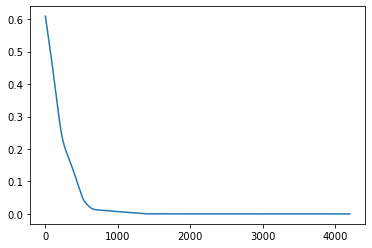

In [19]:
plt.plot(rbfnn.history['rmse'])
#plt.plot(history.history['mean_absolute_error'])
#plt.plot(history.history['mean_absolute_percentage_error'])
#plt.plot(history.history['cosine_proximity'])
plt.show()

dict_keys(['loss', 'rmse', 'val_loss', 'val_rmse'])


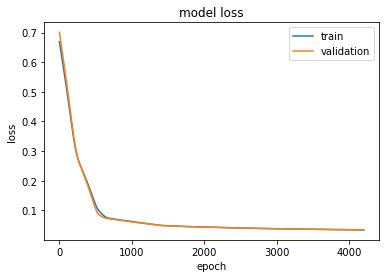

In [20]:
# plotting the loss curve for the train and validation
print(rbfnn.history.keys())
# "Loss"
plt.plot(rbfnn.history['loss'])
plt.plot(rbfnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [21]:
y_testB

,0,1
0,266845.2,9937058.4
1,265321.6,9939909.3
2,265569.1,9938719.0
3,263334.1,9935073.4
4,265147.5,9943952.5
5,263546.9,9938884.3
6,267214.9,9942304.2
7,262901.9,9941909.8
8,263165.3,9943777.6
9,266952.5,9936009.1


In [22]:
tstF0 = prd[0]
tstF1 = prd[1]
tstF2 = prd[2]
tstF2.shape

(16, 2)

In [23]:
fold0 = labels[0]
fold1 = labels[1]
fold2 = labels[2]
type (fold1)
fold2.shape

(16, 2)

In [24]:
predF0 = min_max_scaler_Target.inverse_transform(tstF0)
predF1 = min_max_scaler_Target.inverse_transform(tstF1)
predF2 = min_max_scaler_Target.inverse_transform(tstF2)

In [25]:
predT0 = min_max_scaler_Target.inverse_transform(fold0)
predT1 = min_max_scaler_Target.inverse_transform(fold1)
predT2 = min_max_scaler_Target.inverse_transform(fold2)

In [26]:
error0 = predT0-predF0
error1 = predT1-predF1
error2 = predT2-predF2

In [27]:
print ('error in fold 1**************')
print (error0)
print ('error in fold 2**************')
print (error1)
print ('error in fold 3**************')
print (error2)

error in fold 1**************
[[ 0.2       1.8     ]
 [ 0.99375   2.8     ]
 [ 0.6125    2.      ]
 [-0.575     2.4     ]
 [ 0.71875   1.6     ]
 [ 0.2625    0.5     ]
 [-0.175     1.1     ]
 [ 2.16875   5.8     ]
 [ 0.8375    1.7     ]
 [ 0.2875    1.6     ]
 [-0.8       0.4     ]
 [ 0.1625    0.7     ]
 [ 0.8       1.9     ]
 [-2.159375 -4.7     ]
 [-0.0125    0.2     ]
 [-0.1375    1.3     ]]
error in fold 2**************
[[-0.4125   -1.      ]
 [-0.25     -3.4     ]
 [-0.75625   0.      ]
 [ 0.33125  -1.2     ]
 [-0.625    -2.3     ]
 [-0.2375   -1.      ]
 [ 0.621875 -0.5     ]
 [ 0.10625  -0.4     ]
 [-0.24375  -1.3     ]
 [-0.25625  -1.7     ]
 [ 0.33125  -2.1     ]
 [-0.8375   -2.1     ]
 [-1.63125  -1.1     ]
 [-0.240625 -3.2     ]
 [ 0.58125   0.5     ]
 [-0.46875  -1.6     ]]
error in fold 3**************
[[ 0.65     -0.3     ]
 [ 1.10625   0.4     ]
 [ 0.534375  1.3     ]
 [-0.221875  1.1     ]
 [ 1.30625   1.      ]
 [ 0.56875   0.8     ]
 [ 1.33125  -0.5     ]
 [ 0.625   

In [28]:
preds = model.predict(X_train)
print ()

In [29]:
#error in training
preds_proj = min_max_scaler_Target.inverse_transform(preds)
t = y_trainB-preds_proj
print (t)


           0    1
0   0.918750 -0.2
1   0.806250  0.8
2   0.550000  1.0
3   1.425000  0.4
4   0.593750  0.6
5   0.575000  0.5
6   0.856250  1.1
7   1.075000 -0.2
8   0.681250 -0.3
9   1.131250 -0.4
10  0.731250 -0.6
11  0.631250  0.7
12  0.706250 -0.1
13 -0.346875  0.3
14  0.643750  0.2
15  0.956250  0.3
16  0.806250  0.0
17  1.218750 -0.4
18  0.493750  0.0
19  0.643750  0.8
20  1.031250  0.7
21  0.793750  0.0
22 -0.096875  1.5
23  1.012500  0.6
24  0.662500  0.7
25  0.775000  0.3
26  0.612500  0.9
27  1.193750  0.9
28  0.868750 -1.1
29  0.446875 -0.2
30  0.831250  0.5
31  0.812500  0.4
32  0.650000 -0.3
33  1.106250  0.4
34  0.534375  1.3
35 -0.221875  1.1
36  1.306250  1.0
37  0.568750  0.8
38  1.331250 -0.5
39  0.625000  0.0
40  0.768750  0.3
41  0.862500  0.9
42  0.937500  0.0
43  0.600000  0.0
44  0.793750  0.5
45  1.056250  0.0
46  0.612500  0.4
47  0.237500  0.7


In [30]:

import math
from sklearn.metrics import mean_squared_error
mse_true  = mean_squared_error(y_trainB, preds_proj)
math.sqrt(mse_true)

0.7377179702144131

In [31]:
mse_true

0.5442278035772736

In [32]:
import math
from sklearn.metrics import mean_squared_error
mse_true_1, mse_true_2, mse_true_3  = (mean_squared_error(predT0, predF0), mean_squared_error(predT1, predF1),
                                     mean_squared_error(predT2, predF2)) 
                                   
mse_true_1, mse_true_2, mse_true_3 

(3.3079800417153264, 1.697875366019448, 0.5551483155375309)

In [33]:
rmse1, rmse2, rmse3  = (math.sqrt(mse_true_1), math.sqrt(mse_true_2), math.sqrt(mse_true_3))
rmse1, rmse2, rmse3 

(1.8187853204035176, 1.3030254663741028, 0.7450827575092117)

In [34]:

#X_test = test_data
predst = model.predict(X_test)

In [35]:
#error in testing
preds_projT = min_max_scaler_Target.inverse_transform(predst)
error = y_testB-preds_projT
print (error)

          0    1
0   0.85625  0.4
1   0.69375  0.3
2   0.66250  1.0
3   0.63125 -0.6
4   0.84375  1.5
5   0.74375 -0.7
6   1.30625  0.2
7   0.93125 -0.2
8   1.17500 -0.4
9   0.78125  1.1
10  0.64375  0.2
11  0.68750  0.1
12  0.63125  0.2
13  1.19375  0.1
14  0.43750 -0.1
15  1.09375  0.2
16  0.65000 -0.3


In [36]:

import math
from sklearn.metrics import mean_squared_error
mse_true  = mean_squared_error(y_testB, preds_projT)
math.sqrt(mse_true)

0.7364898365465417

In [37]:
import math
from sklearn.metrics import mean_squared_error
mse_true  = mean_squared_error(y_testB, preds_projT)
mse_true

0.5424172793363516

In [47]:
df = pd.DataFrame(error)

In [48]:
df.to_csv('fold0.csv', index=False)

In [46]:
error

,0,1
0,0.85625,0.4
1,0.69375,0.3
2,0.66250,1.0
3,0.63125,-0.6
4,0.84375,1.5
5,0.74375,-0.7
6,1.30625,0.2
7,0.93125,-0.2
8,1.17500,-0.4
9,0.78125,1.1
